# TV spots effect on website visits

The goal of the project is to create the model which will answer the question whether there is an impact of TV spots on website visits. What is more the model should answer what kind of effect TV spots cause and when.

It is difficult to answer the above question due to inconsistent data where website visits are given in one hour window slots whereas TV spots are given in actual display time.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports-and-settings" data-toc-modified-id="Imports-and-settings-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports and settings</a></span></li><li><span><a href="#Read-data" data-toc-modified-id="Read-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Read data</a></span><ul class="toc-item"><li><span><a href="#Website-visits" data-toc-modified-id="Website-visits-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Website visits</a></span></li><li><span><a href="#Campaign-spots" data-toc-modified-id="Campaign-spots-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Campaign spots</a></span></li></ul></li><li><span><a href="#Extract-time-features-from-datasets" data-toc-modified-id="Extract-time-features-from-datasets-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Extract time features from datasets</a></span><ul class="toc-item"><li><span><a href="#Plot-website-visits-and-vertical-lines-representing-start-and-end-of-the-campaign" data-toc-modified-id="Plot-website-visits-and-vertical-lines-representing-start-and-end-of-the-campaign-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Plot website visits and vertical lines representing start and end of the campaign</a></span></li><li><span><a href="#Assign-periods-(Pre_Campaign,-Campaign,-Post_Campaign,-Christmas)" data-toc-modified-id="Assign-periods-(Pre_Campaign,-Campaign,-Post_Campaign,-Christmas)-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Assign periods (<code>Pre_Campaign</code>, <code>Campaign</code>, <code>Post_Campaign</code>, <code>Christmas</code>)</a></span></li></ul></li><li><span><a href="#Baseline" data-toc-modified-id="Baseline-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Baseline</a></span><ul class="toc-item"><li><span><a href="#All-visits-by-period" data-toc-modified-id="All-visits-by-period-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>All visits by period</a></span></li><li><span><a href="#Pre-Campaign-visits" data-toc-modified-id="Pre-Campaign-visits-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Pre-Campaign visits</a></span></li><li><span><a href="#Baseline-extraction" data-toc-modified-id="Baseline-extraction-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Baseline extraction</a></span></li><li><span><a href="#Compare-Pre-Campaign-period-with-baseline" data-toc-modified-id="Compare-Pre-Campaign-period-with-baseline-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Compare <code>Pre-Campaign</code> period with baseline</a></span></li><li><span><a href="#Compare-Campaign--and-Post-Campaign-periods-with-baseline" data-toc-modified-id="Compare-Campaign--and-Post-Campaign-periods-with-baseline-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Compare <code>Campaign</code>  and <code>Post-Campaign</code> periods with baseline</a></span></li></ul></li><li><span><a href="#Compute-difference-between-Visits-and-Baseline-Visits" data-toc-modified-id="Compute-difference-between-Visits-and-Baseline-Visits-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Compute difference between <code>Visits</code> and <code>Baseline Visits</code></a></span><ul class="toc-item"><li><span><a href="#Plot-difference-from-baseline" data-toc-modified-id="Plot-difference-from-baseline-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Plot difference from baseline</a></span></li><li><span><a href="#Plot-website-visits-in-Campaign-period-and-number-of-spots-in-the-same-window-time" data-toc-modified-id="Plot-website-visits-in-Campaign-period-and-number-of-spots-in-the-same-window-time-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Plot website visits in <code>Campaign</code> period and number of spots in the same window time</a></span></li></ul></li><li><span><a href="#Model" data-toc-modified-id="Model-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Model</a></span><ul class="toc-item"><li><span><a href="#Converting-GRP-into-bins" data-toc-modified-id="Converting-GRP-into-bins-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Converting GRP into bins</a></span></li><li><span><a href="#Extracting-a-category-from-the-title" data-toc-modified-id="Extracting-a-category-from-the-title-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Extracting a category from the title</a></span></li><li><span><a href="#Feature-engineering" data-toc-modified-id="Feature-engineering-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Feature engineering</a></span></li><li><span><a href="#Correlation-plot" data-toc-modified-id="Correlation-plot-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Correlation plot</a></span></li><li><span><a href="#Model" data-toc-modified-id="Model-6.5"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>Model</a></span></li><li><span><a href="#Model-results" data-toc-modified-id="Model-results-6.6"><span class="toc-item-num">6.6&nbsp;&nbsp;</span>Model results</a></span><ul class="toc-item"><li><span><a href="#Model-metrics" data-toc-modified-id="Model-metrics-6.6.1"><span class="toc-item-num">6.6.1&nbsp;&nbsp;</span>Model metrics</a></span></li><li><span><a href="#Coefficients" data-toc-modified-id="Coefficients-6.6.2"><span class="toc-item-num">6.6.2&nbsp;&nbsp;</span>Coefficients</a></span></li></ul></li></ul></li></ul></div>

## Imports and settings

In [1]:
import numpy as np
import pandas as pd

import re
import datetime

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
%matplotlib inline
import seaborn as sns

In [2]:
plt.rcParams.update({'figure.figsize': (20, 7), 'figure.dpi': 360})
plt.style.use('seaborn-paper')
tab10_colors = [i for i in get_cmap('tab10').colors]

## Read data

### Website visits

In [3]:
data_visits = pd.read_excel('exemplary_data.xlsx', sheet_name='visits')

In [4]:
data_visits.rename({'Data':'Date', 'godzina':'Hour', 'Wizyty_all':'Visits'}, axis=1, inplace=True)

In [5]:
data_visits.head()

Date  Hour  Visits
0 2014-10-01     0    1589
1 2014-10-01     1     658
2 2014-10-01     2     299
3 2014-10-01     3     211
4 2014-10-01     4     257

`Data_visits` file contains information about website views day by day within an hour window.

In [6]:
data_visits['Date'].min()

Timestamp('2014-10-01 00:00:00')

In [7]:
data_visits['Date'].max()

Timestamp('2014-12-31 00:00:00')

In [8]:
data_visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2208 entries, 0 to 2207
Data columns (total 3 columns):
Date      2208 non-null datetime64[ns]
Hour      2208 non-null int64
Visits    2208 non-null int64
dtypes: datetime64[ns](1), int64(2)
memory usage: 51.8 KB


### Campaign spots

In [9]:
data_spots = pd.read_excel('exemplary_data.xlsx', sheet_name='spots')

In [10]:
data_spots.rename({'Date':'Original Date', 'Time':'Original Time'}, axis=1, inplace=True)

In [11]:
data_spots.head()

Campaign Channel            AGB Channel Original Date Original Time  \
0  TVN Pakiet Tematyczny                FoxLife    2014-11-10      06:10:25   
1  TVP Pakiet Tematyczny            TVP Seriale    2014-11-10      06:11:50   
2  TVN Pakiet Tematyczny              Mjuzik.tv    2014-11-10      06:12:59   
3  TVN Pakiet Tematyczny             MTV Polska    2014-11-10      06:19:06   
4  TVN Pakiet Tematyczny  Comedy Central Family    2014-11-10      06:42:34   

  Timeband BreakType (Block type)                               Title  \
0      Day                Between  ZONA DLA MILIONERA /PROG.ROZR.USA/   
1      Day                  After            LOKATORZY /SER.KOM.POL./   
2      Day                Between                           TELEDYSKI   
3      Day                Between                        PIMP MY RIDE   
4      Day                Between       DALEKO JESZCZE? /SER.KOM.USA/   

  Position Type in the block of commercials  Commercial length  GRP  
0                                    Middle                 30  0.0  
1                                    Middle                 30  0.0  
2                                    Middle                 30  0.0  
3                                    Middle                 30  0.0  
4                                    Middle                 30  0.0

`Data_spots` file contains information about each spot displayed in TV during 2 weeks of the advert campaign.

In [12]:
data_spots['Original Date'].min()

Timestamp('2014-11-10 00:00:00')

In [13]:
data_spots['Original Date'].max()

Timestamp('2014-11-23 00:00:00')

In [14]:
data_spots.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2207 entries, 0 to 2206
Data columns (total 10 columns):
Campaign Channel                             2207 non-null object
AGB Channel                                  2207 non-null object
Original Date                                2207 non-null datetime64[ns]
Original Time                                2207 non-null object
Timeband                                     2207 non-null object
BreakType (Block type)                       2207 non-null object
Title                                        2207 non-null object
Position Type in the block of commercials    2207 non-null object
Commercial length                            2207 non-null int64
GRP                                          2207 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 172.5+ KB


## Extract time features from datasets

In [15]:
data_visits['Date Time'] = data_visits['Date'] + pd.to_timedelta(data_visits['Hour'], unit='h')
data_visits['Week of year'] = data_visits['Date'].dt.weekofyear
data_visits['Day of week'] = data_visits['Date'].dt.dayofweek
data_visits['Hours since Monday 00:00'] = data_visits.apply(lambda row: row['Day of week'] * 24 + row['Hour'], axis=1)

In [16]:
data_spots['Original Title'] = data_spots['Title']
data_spots['Date Time'] = data_spots['Original Date'] + pd.to_timedelta(data_spots['Original Time'])
data_spots['Date'] = pd.to_datetime(data_spots['Date Time'].dt.date)
data_spots['Time'] = data_spots['Date Time'].dt.time
data_spots['Week of year'] = data_spots['Date Time'].dt.weekofyear
data_spots['Day of week'] = data_spots['Date Time'].dt.dayofweek
data_spots['Hour'] = data_spots['Date Time'].dt.hour
data_spots['Date Time Hour'] = data_spots['Date'] + pd.to_timedelta(data_spots['Hour'], unit='h')

### Plot website visits and vertical lines representing start and end of the campaign

In [17]:
campaign_start = data_spots['Date Time'].min()
campaign_end = data_spots['Date Time'].max()
christmas = pd.to_datetime('2014-12-20')

`2014-12-20` is the last Saturday before Christmas

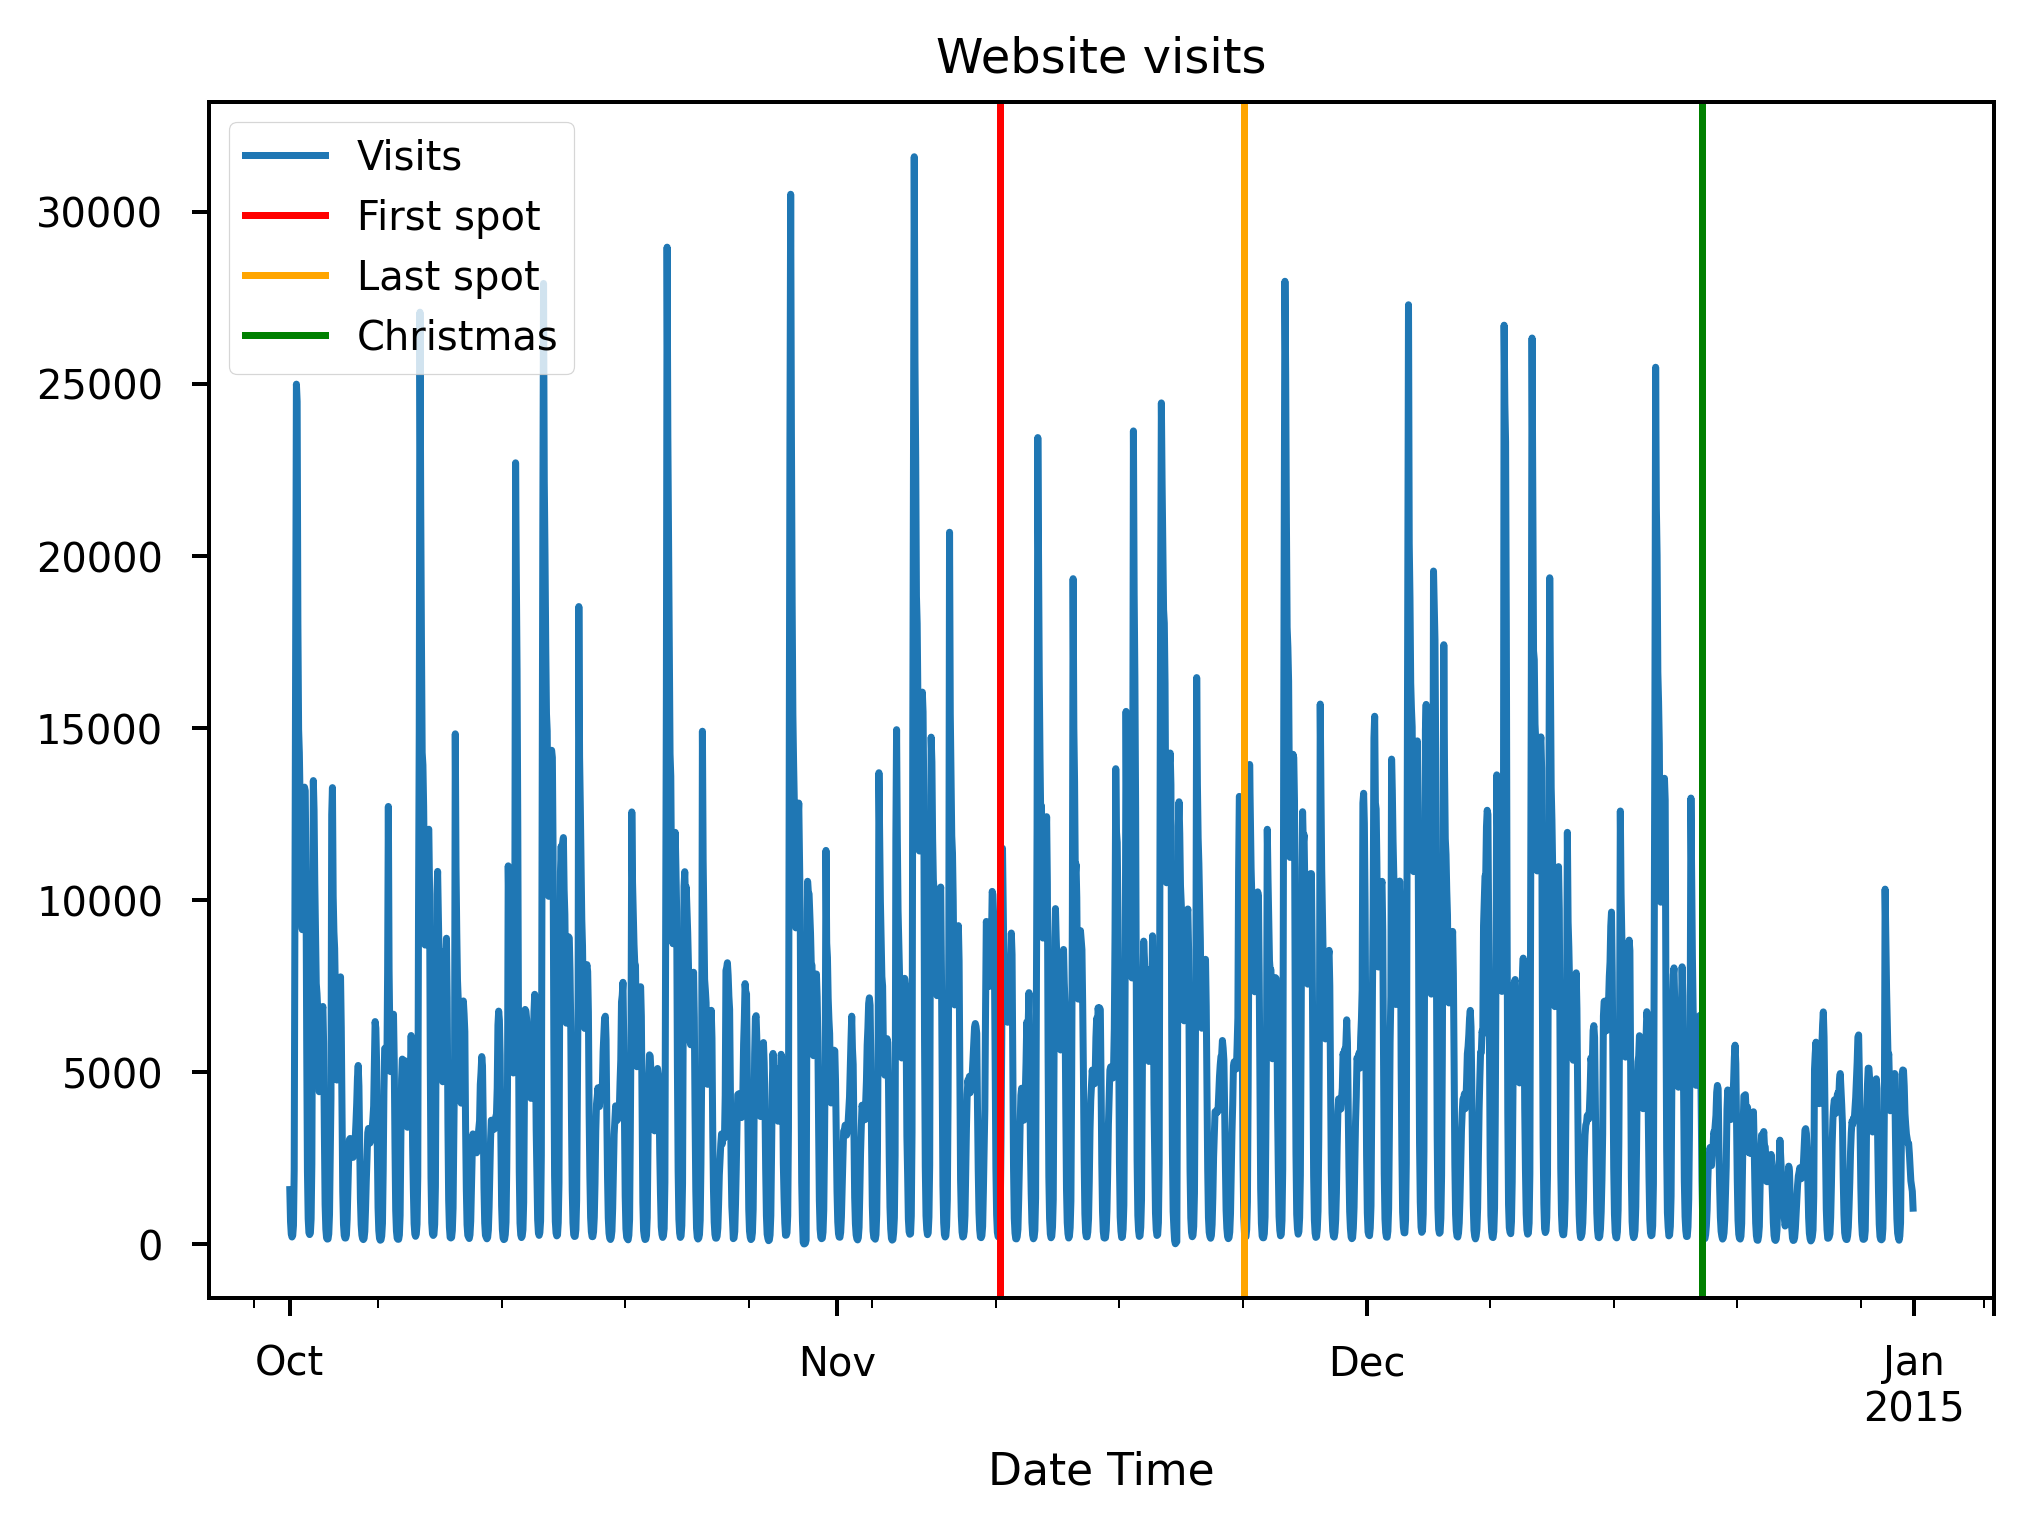

In [18]:
ax = data_visits.set_index('Date Time').plot(y='Visits')

ax.axvline(campaign_start, color='red', label='First spot')
ax.axvline(campaign_end, color='orange', label='Last spot')
ax.axvline(christmas, color='green', label='Christmas')
plt.title('Website visits')
plt.legend(loc='upper left')

plt.show();

### Assign periods (`Pre_Campaign`, `Campaign`, `Post_Campaign`, `Christmas`)

In [19]:
def assign_period(dateTime):
    if dateTime >= christmas:
        return "Christmas"
    if dateTime < campaign_start:
        return "Pre-Campaign"
    if dateTime < campaign_end:
        return "Post-Campaign"
    return "Campaign"
    
data_visits['Period'] = data_visits['Date Time'].apply(assign_period)

In [20]:
data_visits.head()

Date  Hour  Visits           Date Time  Week of year  Day of week  \
0 2014-10-01     0    1589 2014-10-01 00:00:00            40            2   
1 2014-10-01     1     658 2014-10-01 01:00:00            40            2   
2 2014-10-01     2     299 2014-10-01 02:00:00            40            2   
3 2014-10-01     3     211 2014-10-01 03:00:00            40            2   
4 2014-10-01     4     257 2014-10-01 04:00:00            40            2   

   Hours since Monday 00:00        Period  
0                        48  Pre-Campaign  
1                        49  Pre-Campaign  
2                        50  Pre-Campaign  
3                        51  Pre-Campaign  
4                        52  Pre-Campaign

In [21]:
period_colors={
    'Campaign': tab10_colors[0],
    'Pre-Campaign': tab10_colors[1],
    'Post-Campaign': tab10_colors[8],
    'Christmas': tab10_colors[2],
    'baseline': tab10_colors[3]
}

## Baseline

Website visits datais collected in hourly slots which does not give us enough information to build a baseline based on window before and after TV spot displayed.

Baseline is going to be calculated based on website visits in previous weeks before campaign (`Pre-Campaign` period).

The website visits after the campaign (`Post-Campaign`) can be affected by the campaign, so they are not used in the baseline.

The number of visits after `2014-12-20` is much lower than previous periods.

In [22]:
data_visits.head()

Date  Hour  Visits           Date Time  Week of year  Day of week  \
0 2014-10-01     0    1589 2014-10-01 00:00:00            40            2   
1 2014-10-01     1     658 2014-10-01 01:00:00            40            2   
2 2014-10-01     2     299 2014-10-01 02:00:00            40            2   
3 2014-10-01     3     211 2014-10-01 03:00:00            40            2   
4 2014-10-01     4     257 2014-10-01 04:00:00            40            2   

   Hours since Monday 00:00        Period  
0                        48  Pre-Campaign  
1                        49  Pre-Campaign  
2                        50  Pre-Campaign  
3                        51  Pre-Campaign  
4                        52  Pre-Campaign

In [23]:
data_visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2208 entries, 0 to 2207
Data columns (total 8 columns):
Date                        2208 non-null datetime64[ns]
Hour                        2208 non-null int64
Visits                      2208 non-null int64
Date Time                   2208 non-null datetime64[ns]
Week of year                2208 non-null int64
Day of week                 2208 non-null int64
Hours since Monday 00:00    2208 non-null int64
Period                      2208 non-null object
dtypes: datetime64[ns](2), int64(5), object(1)
memory usage: 138.1+ KB


### All visits by period

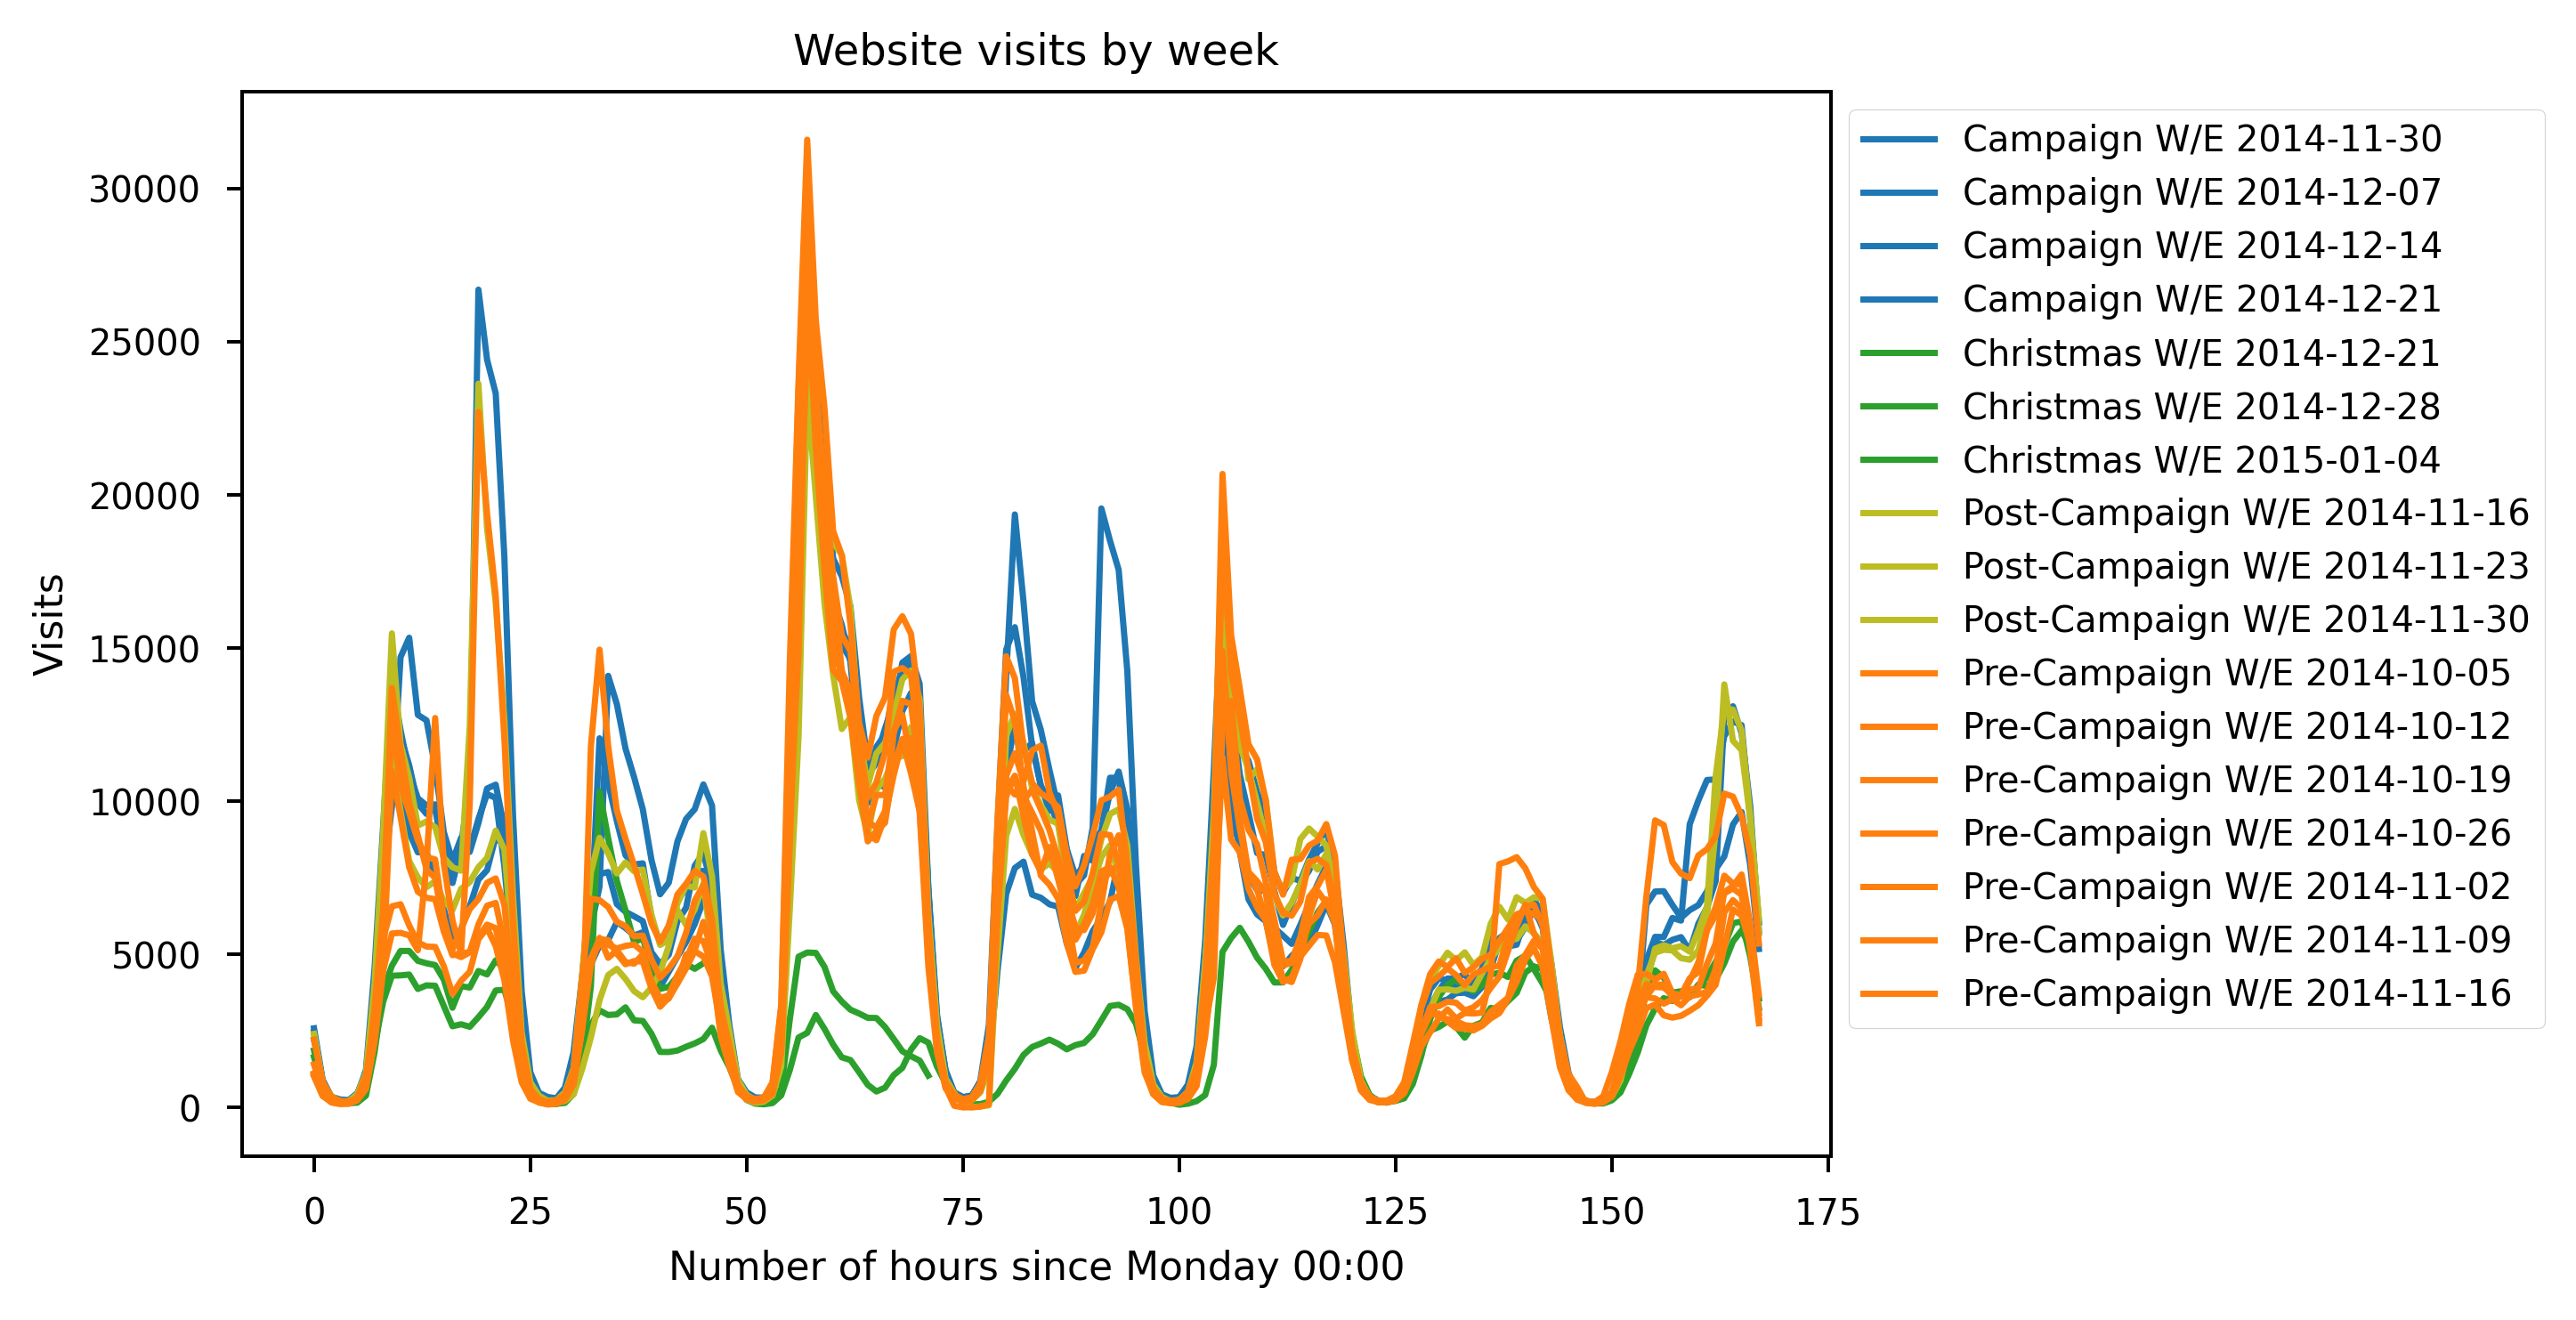

In [24]:
for period_name, period_df in data_visits.groupby(['Period']):
    for week_end, week_df in period_df.groupby(pd.Grouper(key='Date',freq='W')):
        plt.plot(week_df['Hours since Monday 00:00'], week_df['Visits'], label=period_name + ' W/E ' + str(week_end.date()), 
                 color=period_colors[period_name])

plt.xlabel('Number of hours since Monday 00:00')
plt.ylabel('Visits')
plt.title('Website visits by week')
plt.legend(bbox_to_anchor=[1, 1])

plt.show();

### Pre-Campaign visits

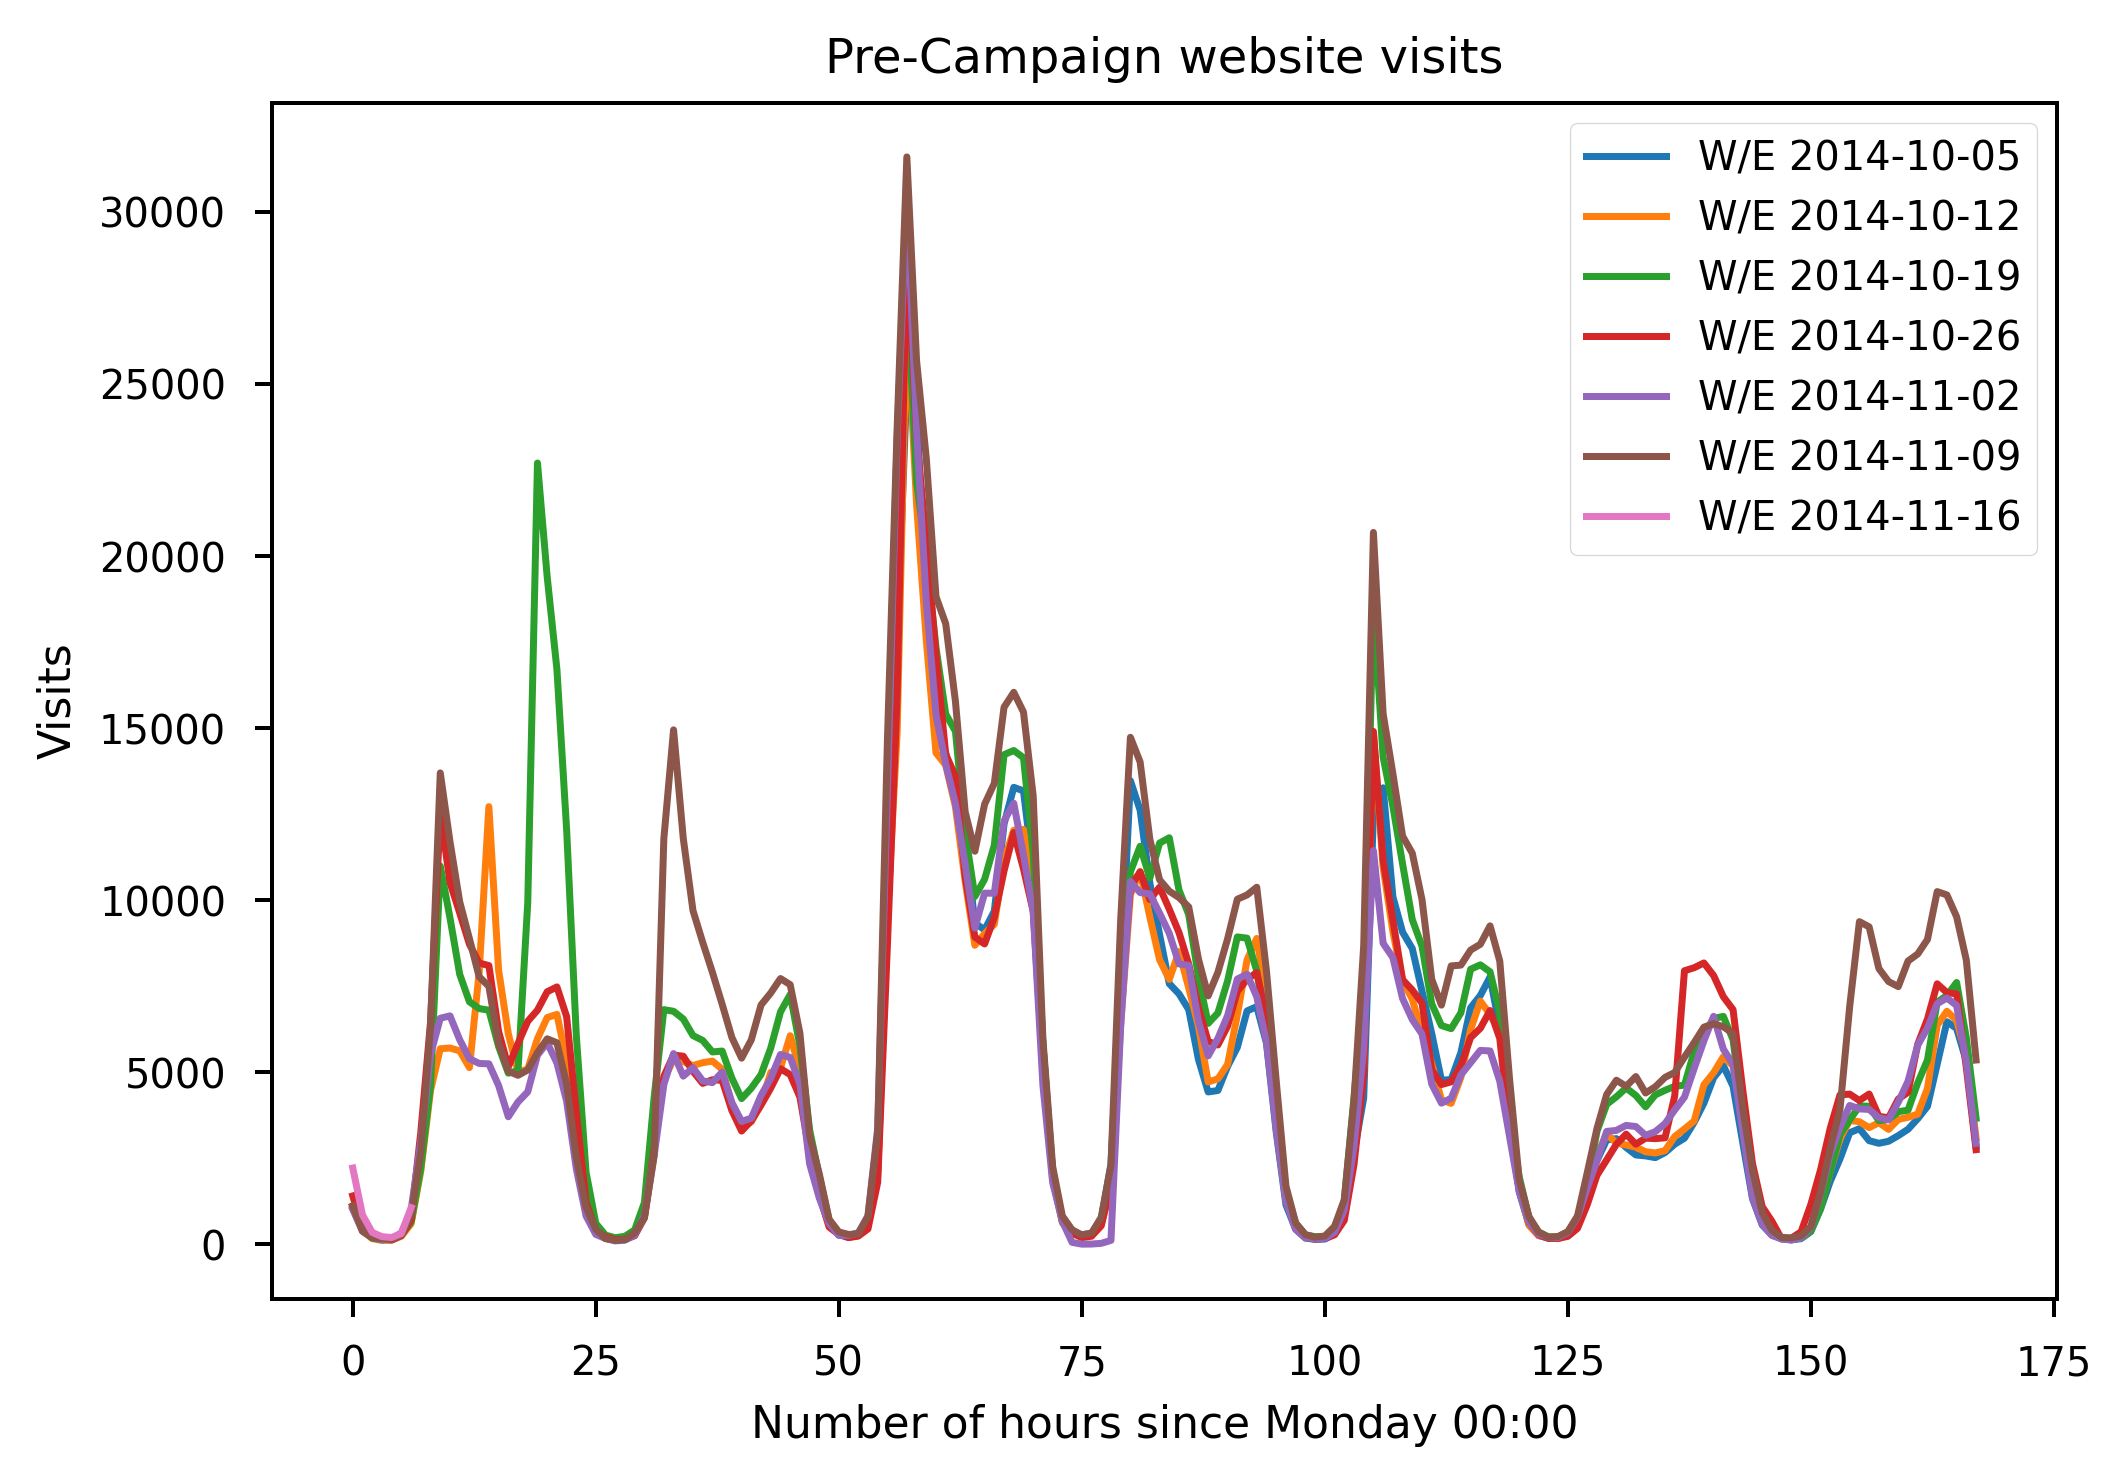

In [25]:
color_index = 0
for week_end, week_df in data_visits[data_visits['Period'] == 'Pre-Campaign'].groupby(pd.Grouper(key='Date Time',freq='W')):
    plt.plot(week_df['Hours since Monday 00:00'], week_df['Visits'], label='W/E ' + str(week_end.date()), 
             color=tab10_colors[color_index])
    color_index += 1
    
plt.xlabel('Number of hours since Monday 00:00')
plt.ylabel('Visits')   
plt.title('Pre-Campaign website visits')
plt.legend(bbox_to_anchor=[1, 1])

plt.show();

### Baseline extraction

I calculate `median` for each day and hour of the `Pre-Campaign` visits minimise influence of outliers on the baseline.

In [26]:
baseline = data_visits[data_visits['Period'] == 'Pre-Campaign'].groupby('Hours since Monday 00:00')['Visits'].median().reset_index().rename(columns={'Visits': 'Baseline visits'})

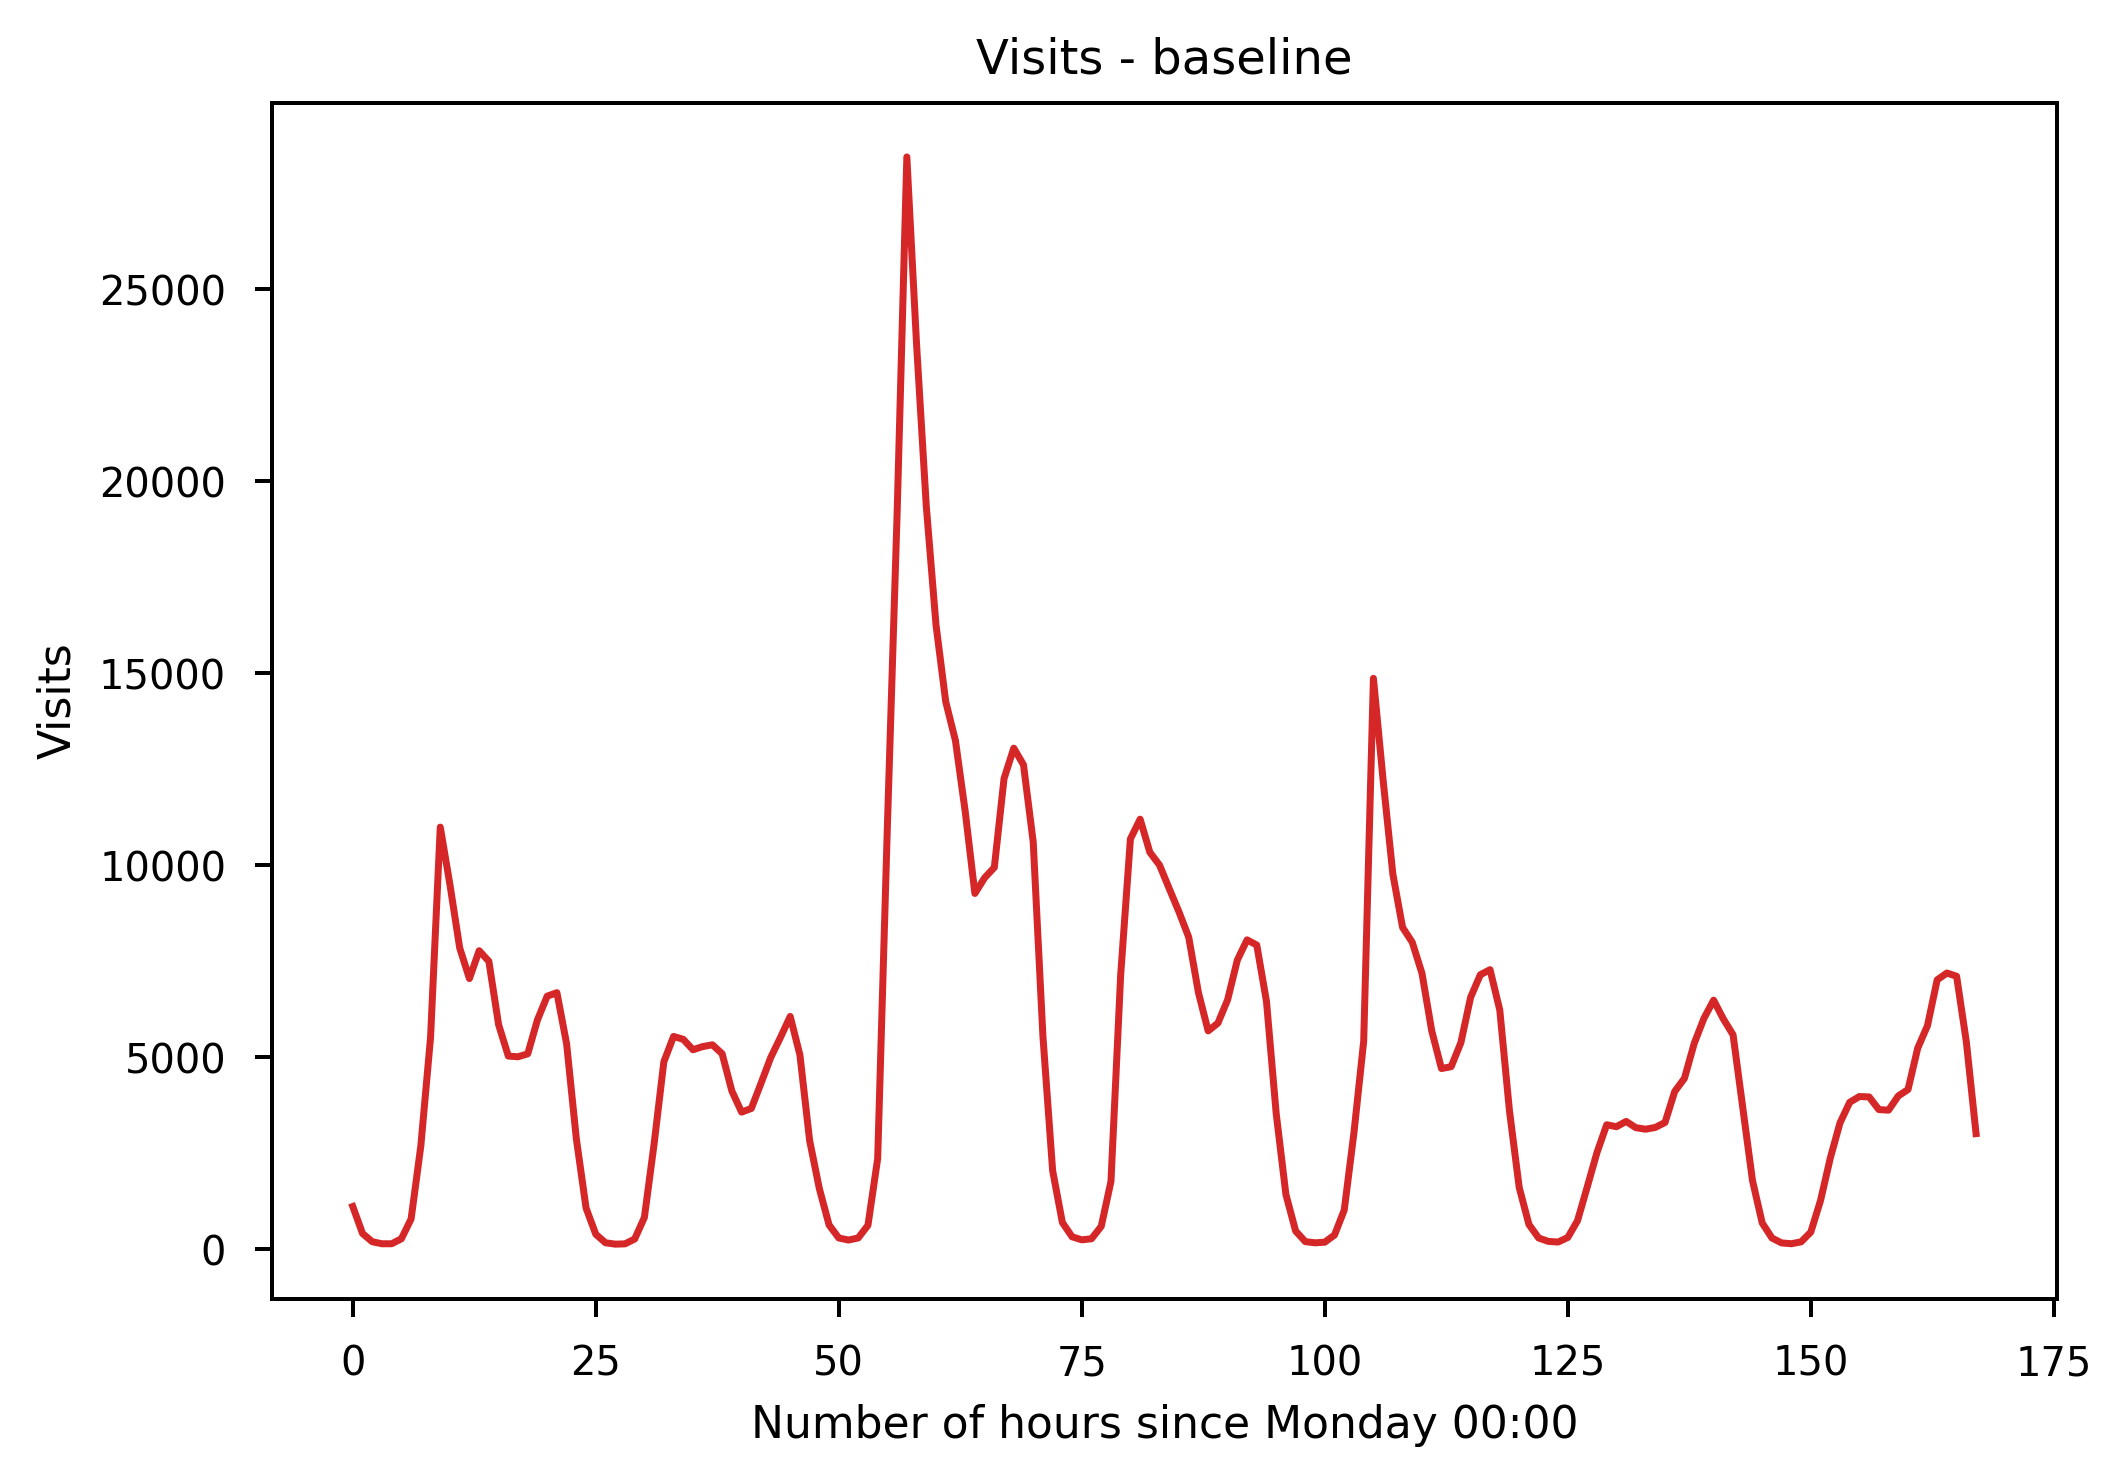

In [27]:
baseline['Baseline visits'].plot(color=period_colors['baseline'])
plt.xlabel('Number of hours since Monday 00:00')
plt.ylabel('Visits')   
plt.title('Visits - baseline')

plt.show()

### Compare `Pre-Campaign` period with baseline

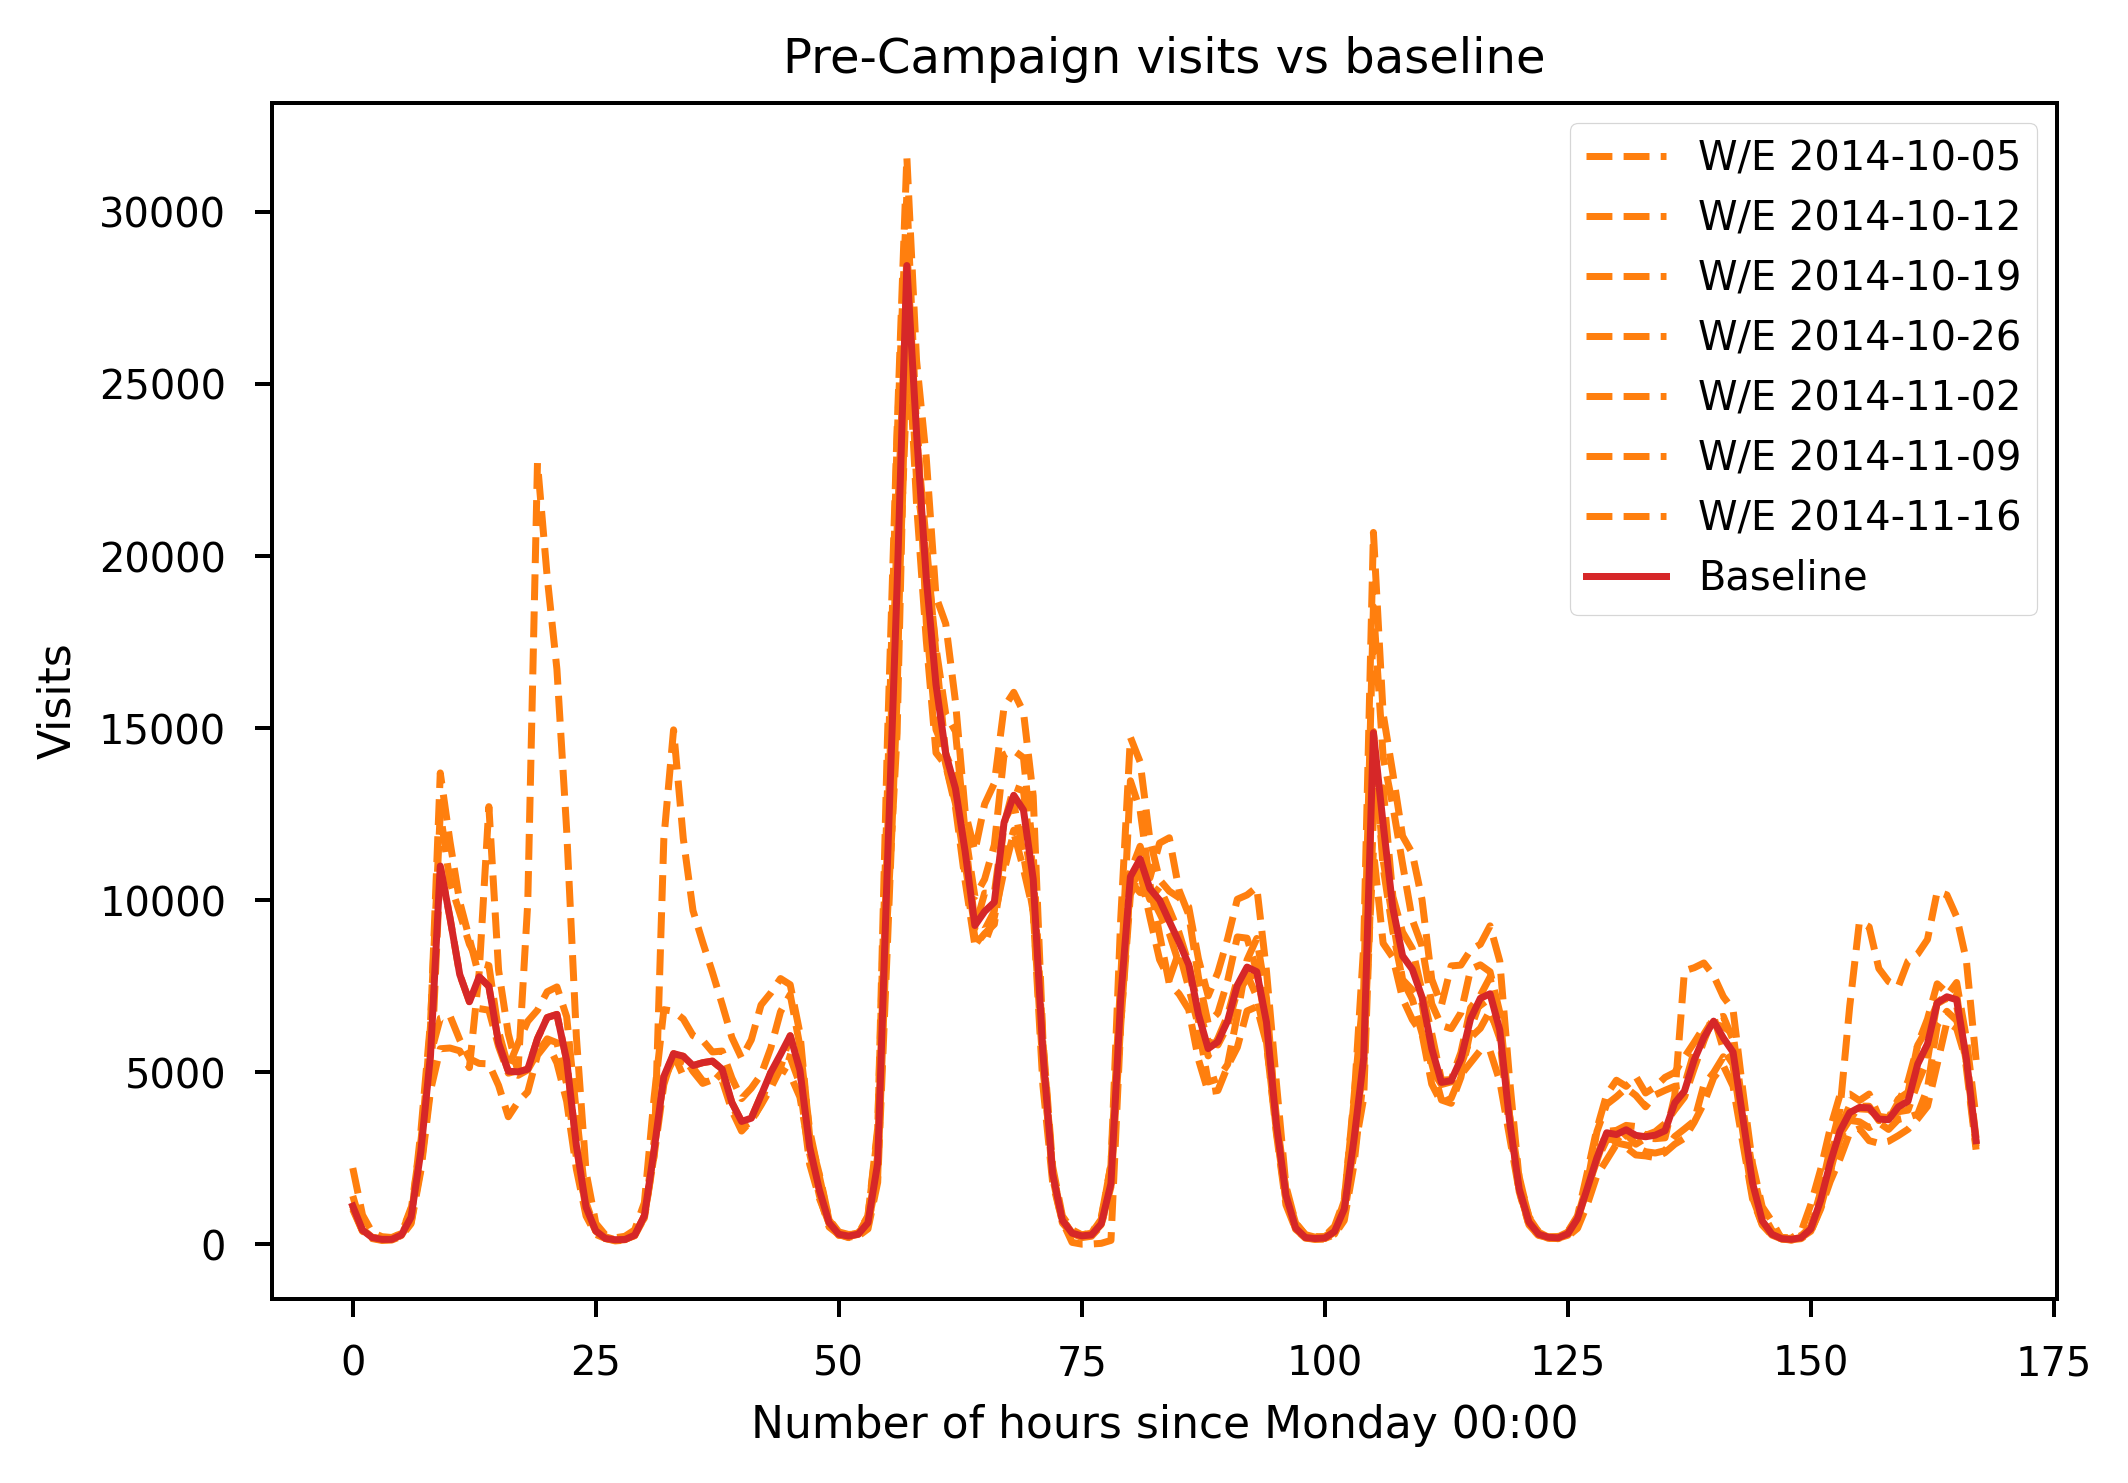

In [28]:
for week_end, week_df in data_visits[(data_visits['Period'] == 'Pre-Campaign')].groupby(pd.Grouper(key='Date Time',freq='W')):
    plt.plot(week_df['Hours since Monday 00:00'], week_df['Visits'], label='W/E ' + str(week_end.date()), 
             color=period_colors['Pre-Campaign'], linestyle='dashed')

plt.plot(baseline['Hours since Monday 00:00'], baseline['Baseline visits'], label='Baseline', color=period_colors['baseline'])

plt.xlabel('Number of hours since Monday 00:00')
plt.ylabel('Visits')   
plt.title('Pre-Campaign visits vs baseline')
plt.legend(bbox_to_anchor=[1, 1])

plt.show();

### Compare `Campaign`  and `Post-Campaign` periods with baseline

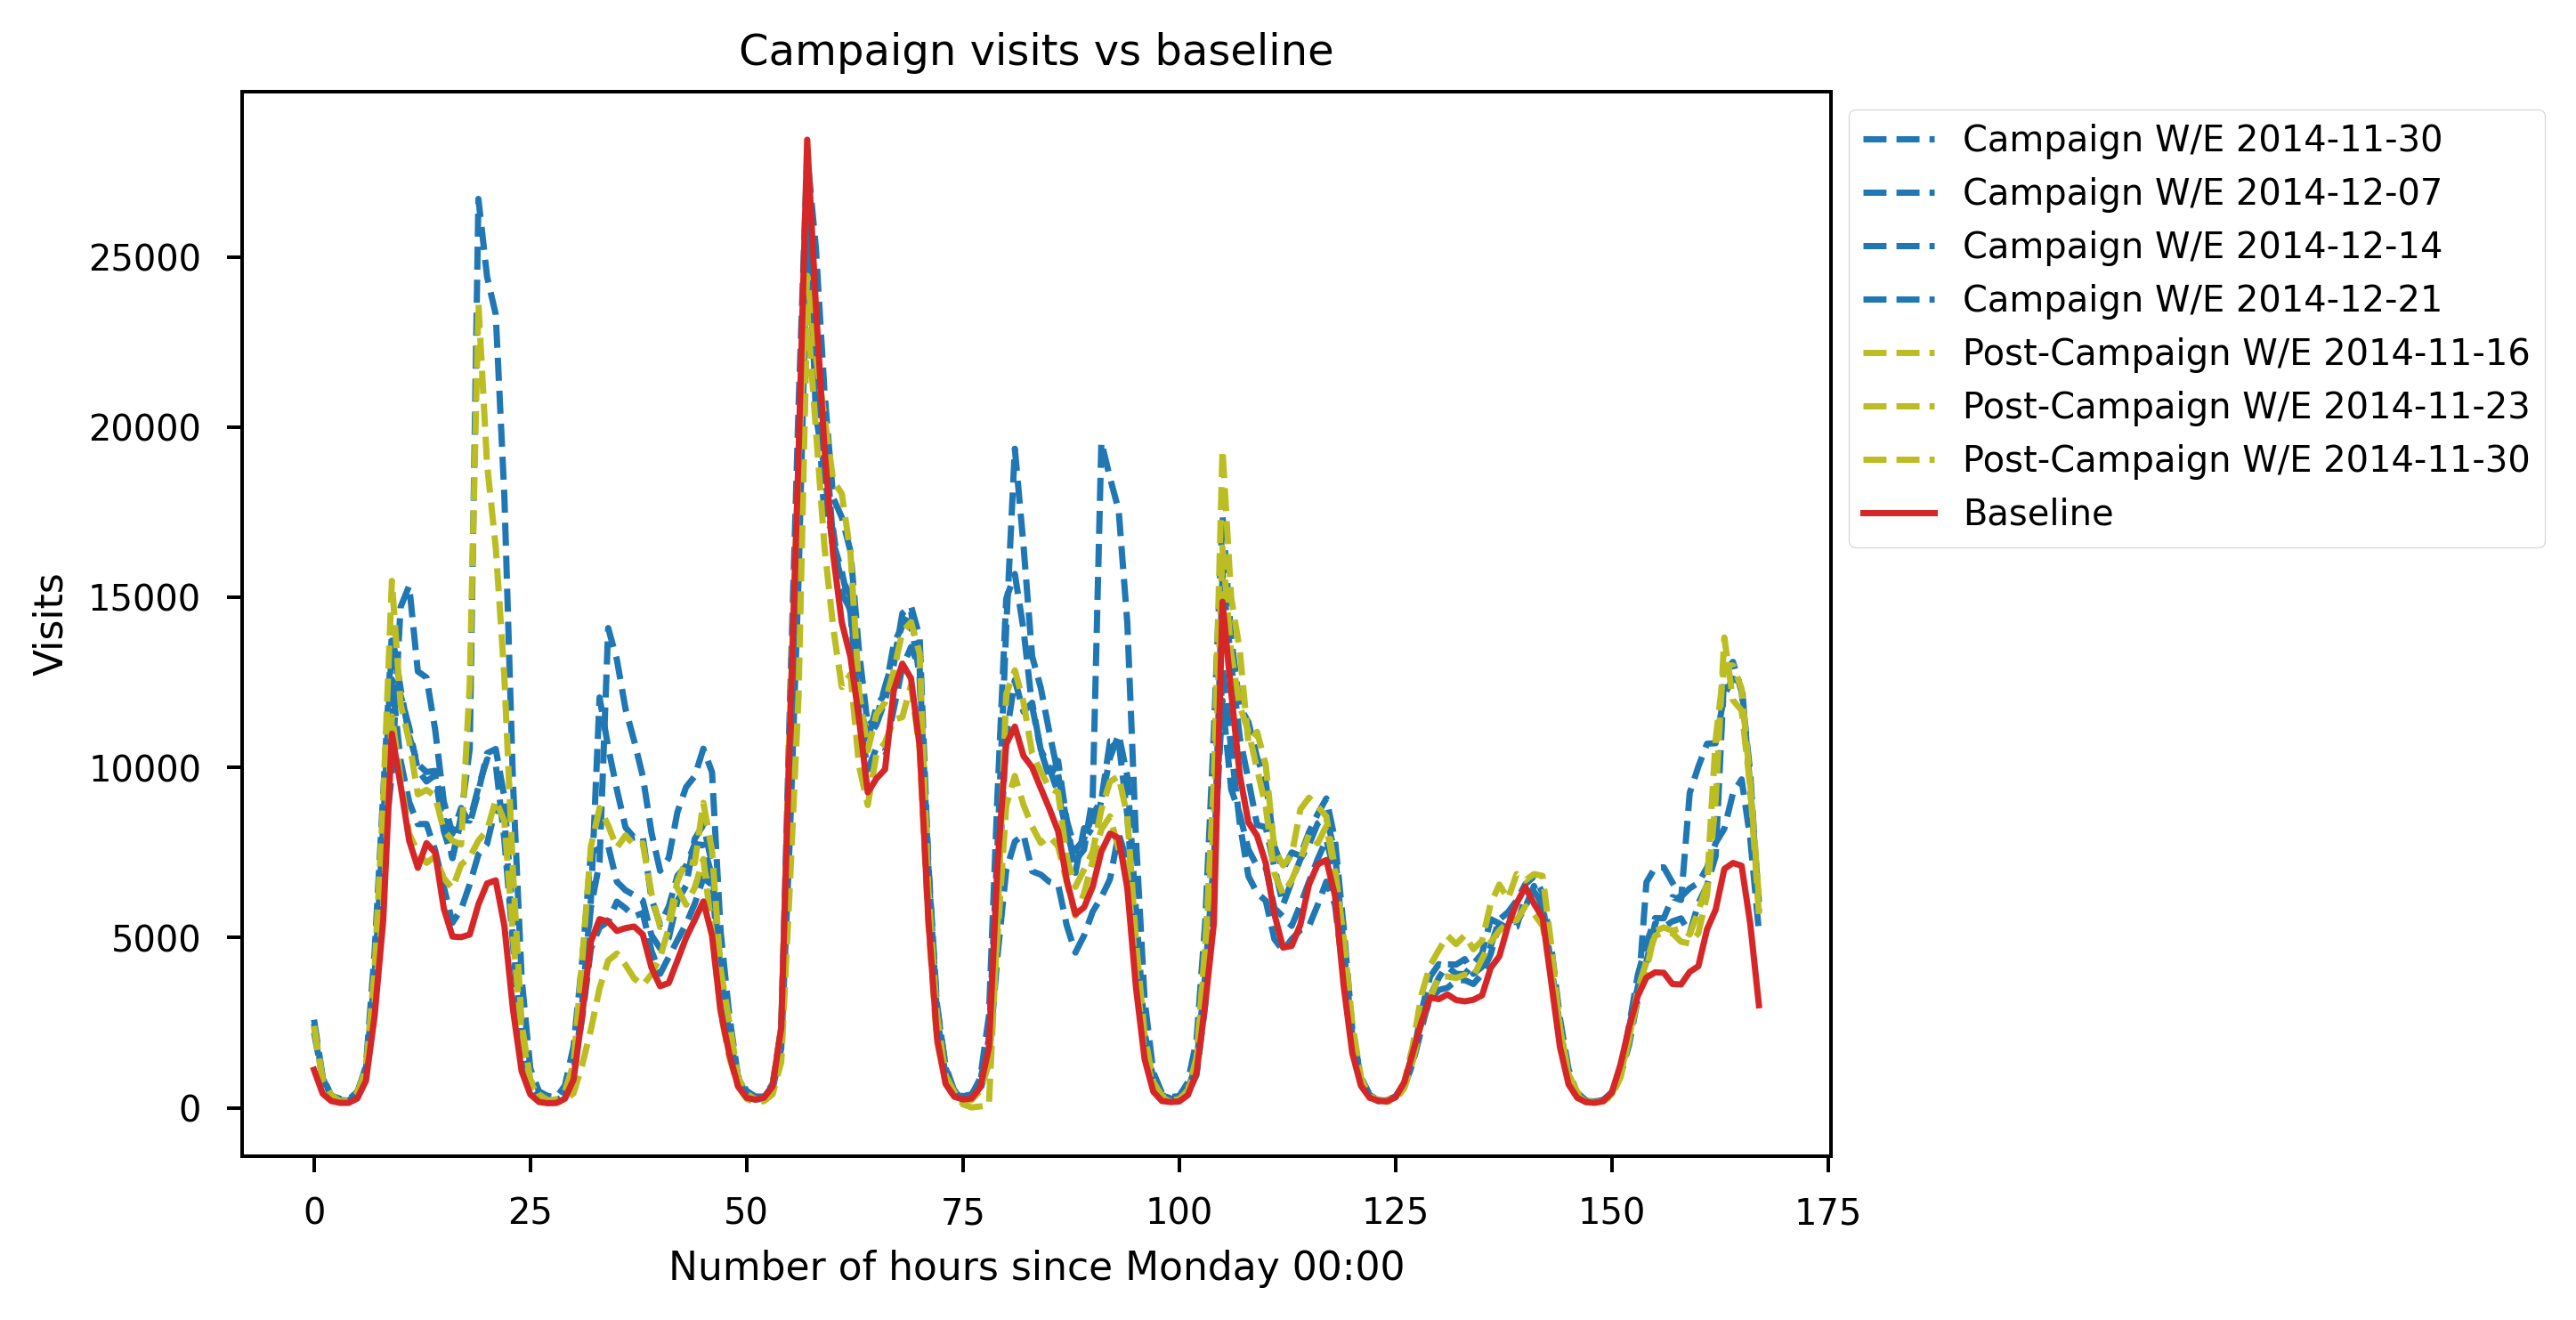

In [29]:
for period_name, period_df in data_visits[(data_visits['Period'] == 'Campaign') | (data_visits['Period'] == 'Post-Campaign')].groupby(['Period']):
    for week_end, week_df in period_df.groupby(pd.Grouper(key='Date Time',freq='W')):
        plt.plot(week_df['Hours since Monday 00:00'], week_df['Visits'], label=period_name + ' W/E ' + str(week_end.date()), 
                 color=period_colors[period_name], linestyle='dashed')

plt.plot(baseline['Hours since Monday 00:00'], baseline['Baseline visits'], label='Baseline', color=period_colors['baseline'])

plt.xlabel('Number of hours since Monday 00:00')
plt.ylabel('Visits')   
plt.title('Campaign visits vs baseline')
plt.legend(bbox_to_anchor=[1, 1])

plt.show();

## Compute difference between `Visits` and `Baseline Visits`

In [30]:
data_visits_baseline = data_visits.merge(baseline, on='Hours since Monday 00:00')

In [31]:
data_visits_baseline['Diff from baseline'] = data_visits_baseline['Visits'] - data_visits_baseline['Baseline visits']

In [32]:
data_visits_baseline.head()

Date  Hour  Visits  Date Time  Week of year  Day of week  \
0 2014-10-01     0    1589 2014-10-01            40            2   
1 2014-10-08     0    1576 2014-10-08            41            2   
2 2014-10-15     0    1979 2014-10-15            42            2   
3 2014-10-22     0    1426 2014-10-22            43            2   
4 2014-10-29     0    1343 2014-10-29            44            2   

   Hours since Monday 00:00        Period  Baseline visits  Diff from baseline  
0                        48  Pre-Campaign           1582.5                 6.5  
1                        48  Pre-Campaign           1582.5                -6.5  
2                        48  Pre-Campaign           1582.5               396.5  
3                        48  Pre-Campaign           1582.5              -156.5  
4                        48  Pre-Campaign           1582.5              -239.5

In [33]:
data_visits_baseline[data_visits_baseline['Period'] == 'Pre-Campaign'].sort_values('Diff from baseline', ascending=False).head()

Date  Hour  Visits           Date Time  Week of year  Day of week  \
1832 2014-10-13    19   22705 2014-10-13 19:00:00            42            0   
1845 2014-10-13    20   19397 2014-10-13 20:00:00            42            0   
1858 2014-10-13    21   16714 2014-10-13 21:00:00            42            0   
2017 2014-11-04     9   14952 2014-11-04 09:00:00            45            1   
2004 2014-11-04     8   11788 2014-11-04 08:00:00            45            1   

      Hours since Monday 00:00        Period  Baseline visits  \
1832                        19  Pre-Campaign           5978.0   
1845                        20  Pre-Campaign           6594.0   
1858                        21  Pre-Campaign           6685.0   
2017                        33  Pre-Campaign           5546.0   
2004                        32  Pre-Campaign           4883.0   

      Diff from baseline  
1832             16727.0  
1845             12803.0  
1858             10029.0  
2017              9406.0  
2004              6905.0

### Plot difference from baseline

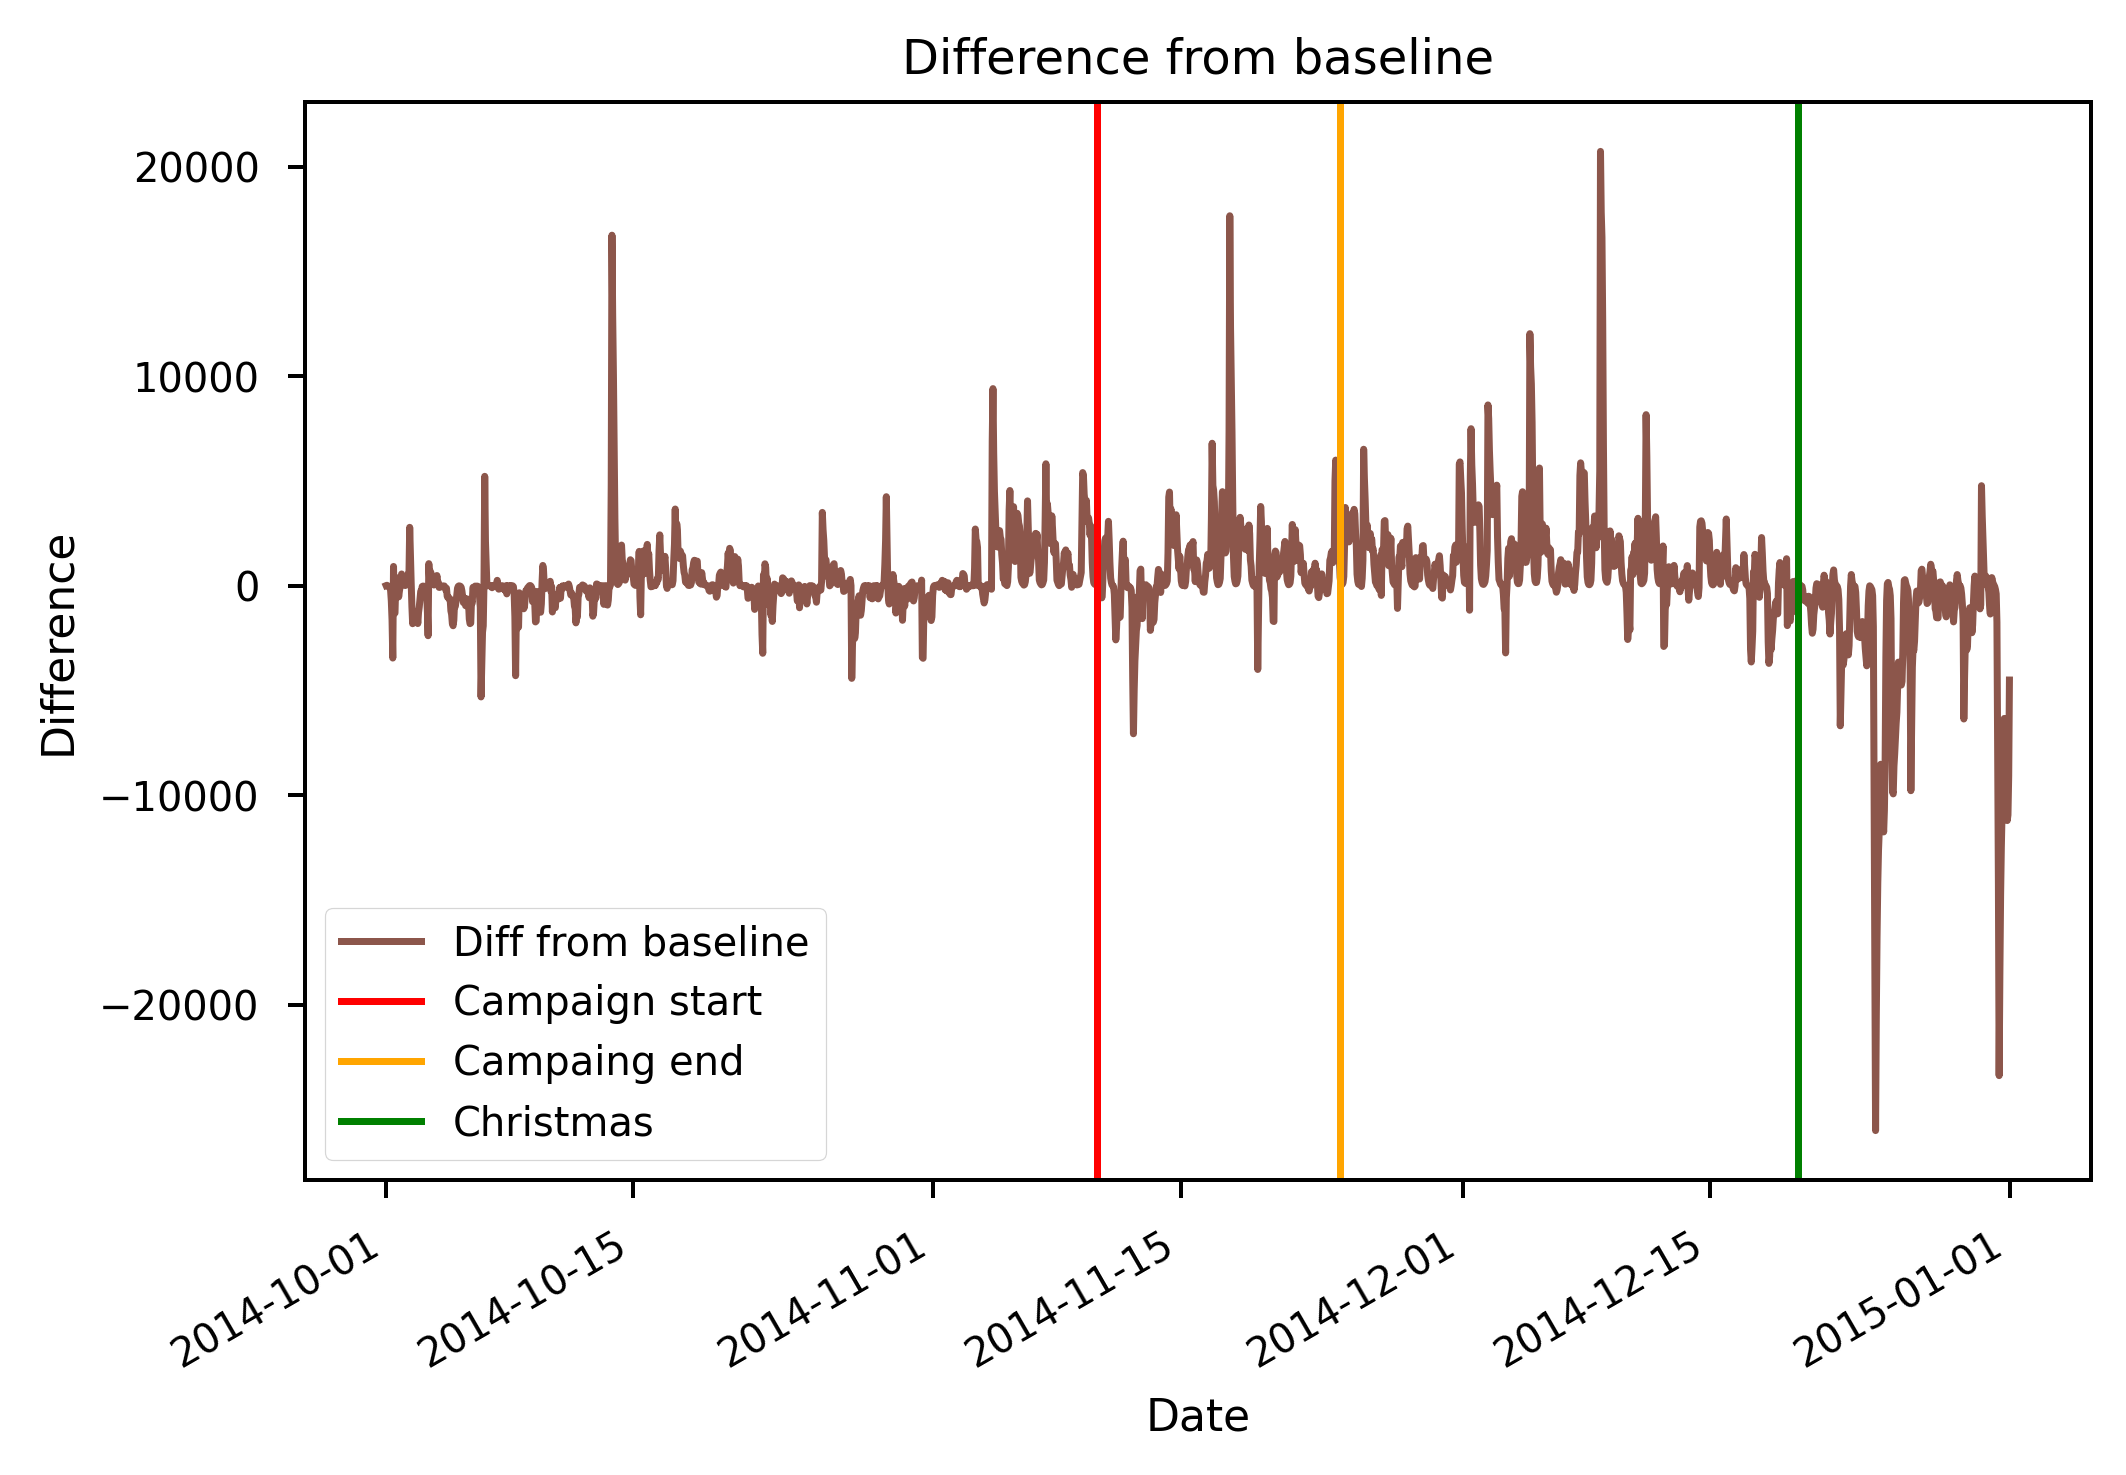

In [34]:
ax = data_visits_baseline.set_index('Date Time').plot(y='Diff from baseline', color=tab10_colors[5])
ax.axvline(campaign_start, color='red', label='Campaign start')
ax.axvline(campaign_end, color='orange', label='Campaing end')
ax.axvline(christmas, color='green', label='Christmas')
plt.xlabel('Date')
plt.ylabel('Difference')   
plt.title('Difference from baseline')
plt.legend()
plt.show()

### Plot website visits in `Campaign` period and number of spots in the same window time

In [35]:
data_visits_baseline.head()

Date  Hour  Visits  Date Time  Week of year  Day of week  \
0 2014-10-01     0    1589 2014-10-01            40            2   
1 2014-10-08     0    1576 2014-10-08            41            2   
2 2014-10-15     0    1979 2014-10-15            42            2   
3 2014-10-22     0    1426 2014-10-22            43            2   
4 2014-10-29     0    1343 2014-10-29            44            2   

   Hours since Monday 00:00        Period  Baseline visits  Diff from baseline  
0                        48  Pre-Campaign           1582.5                 6.5  
1                        48  Pre-Campaign           1582.5                -6.5  
2                        48  Pre-Campaign           1582.5               396.5  
3                        48  Pre-Campaign           1582.5              -156.5  
4                        48  Pre-Campaign           1582.5              -239.5

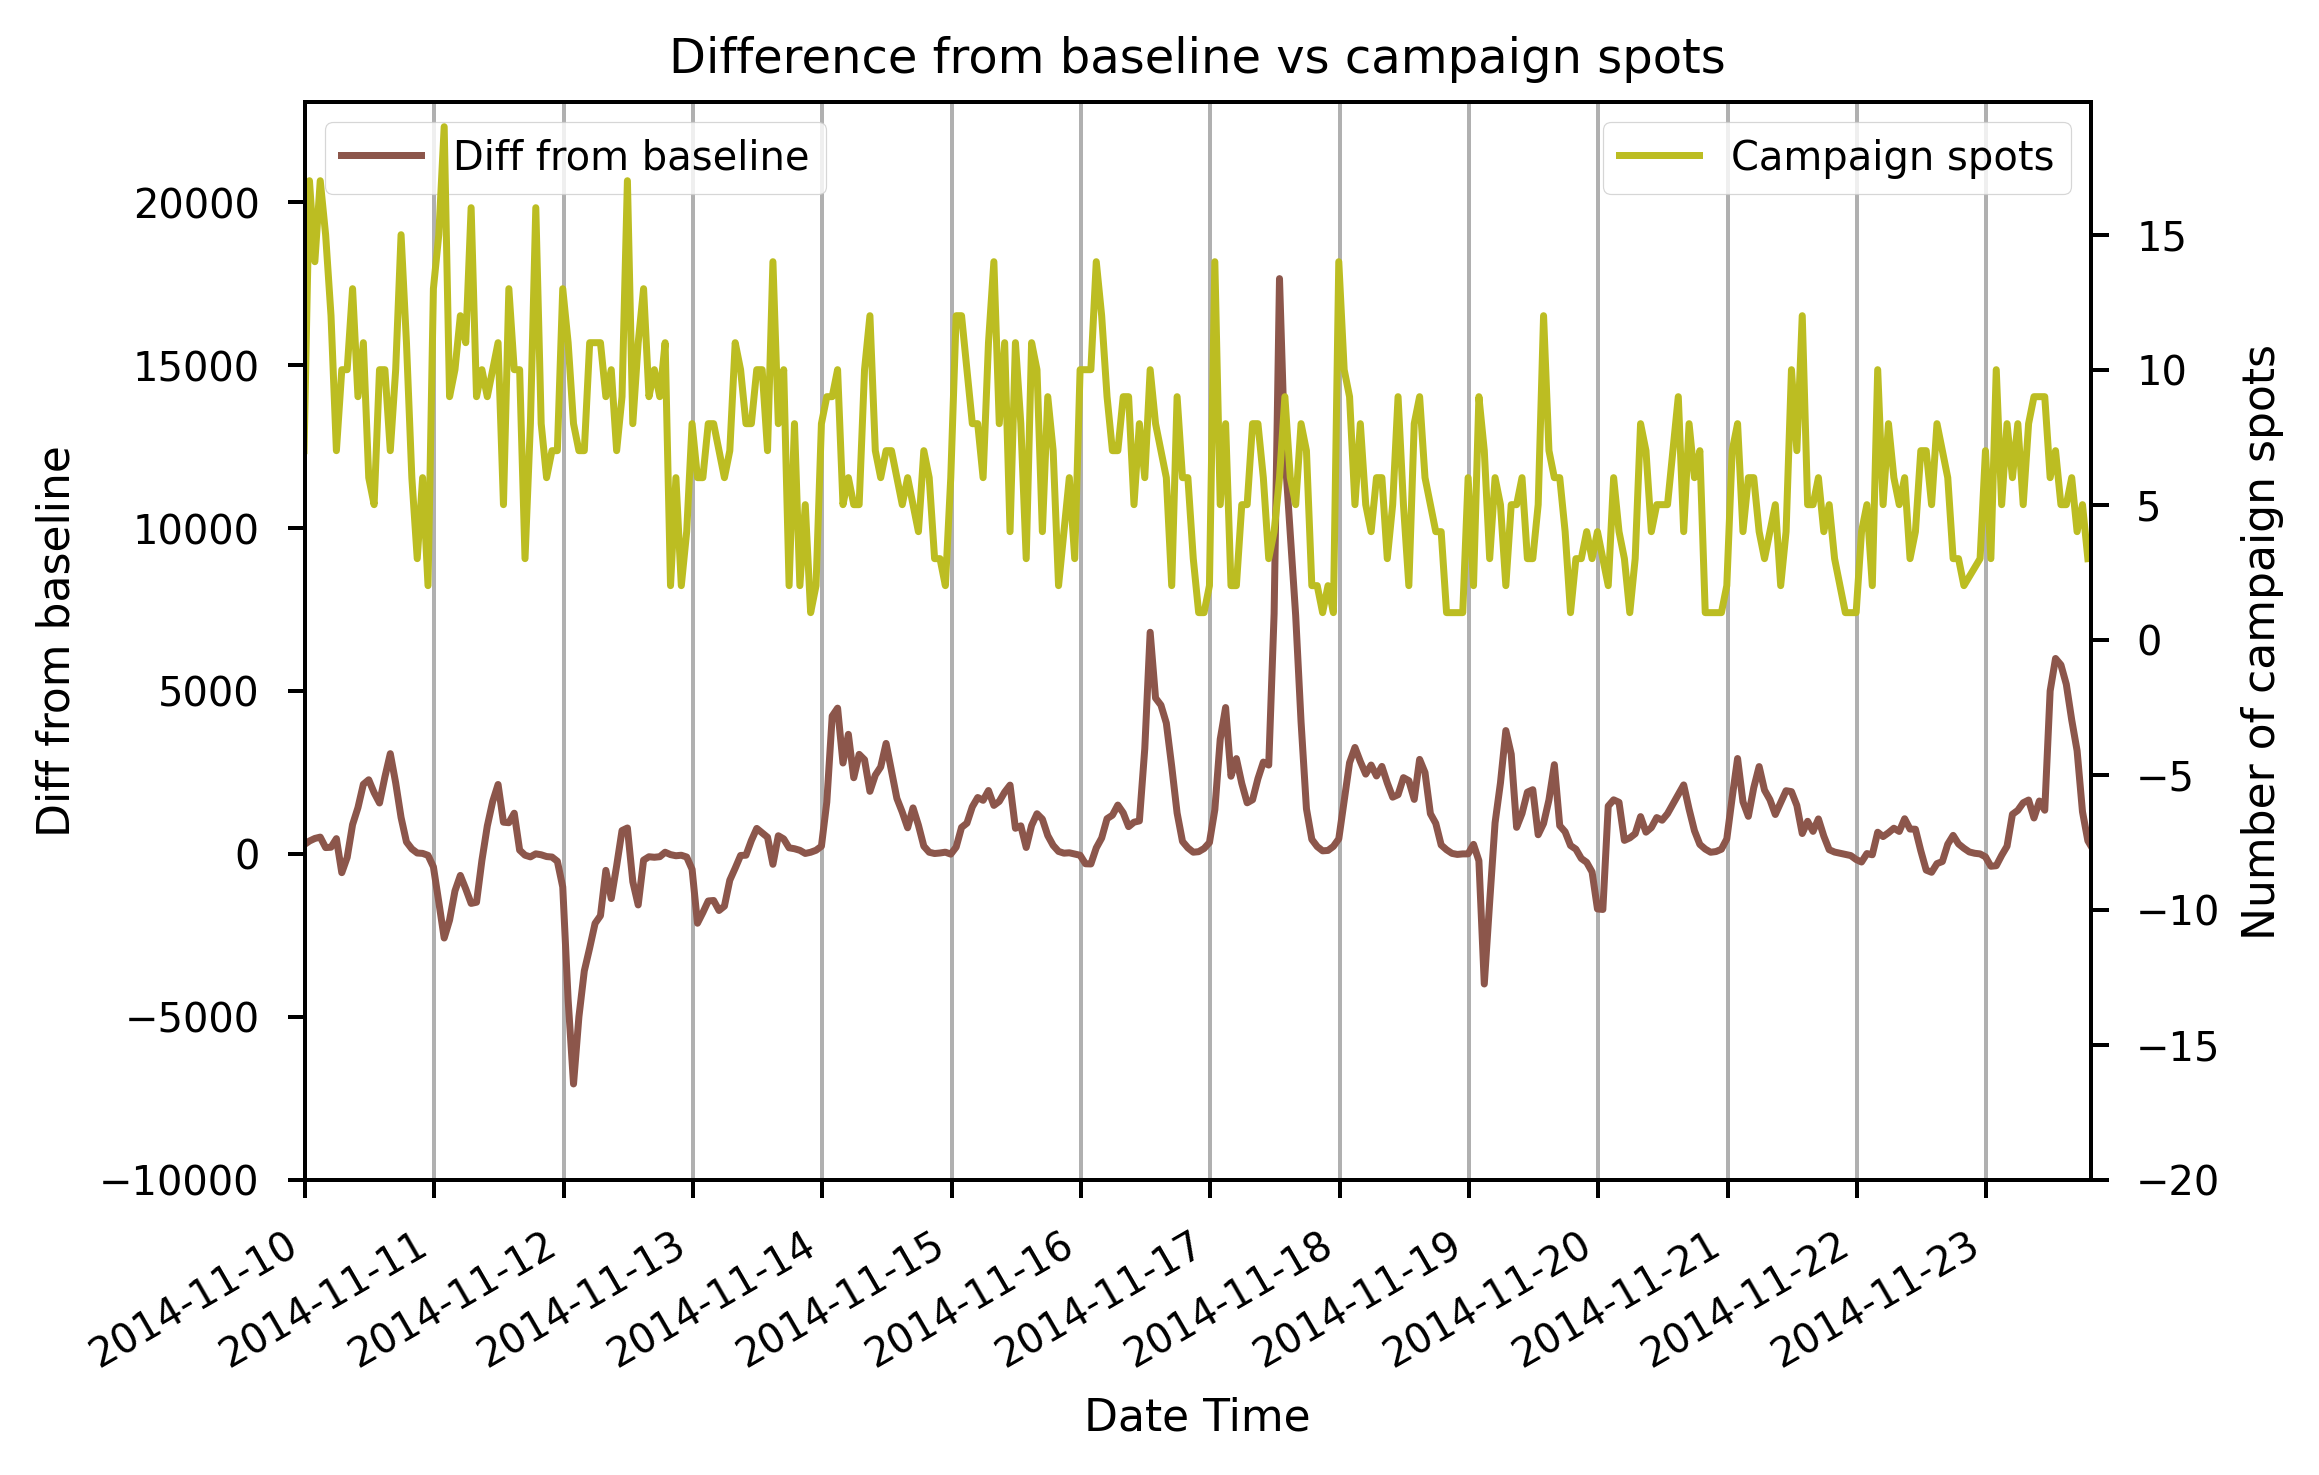

In [36]:
ax1 = data_visits_baseline.set_index('Date Time').plot(y='Diff from baseline', color=tab10_colors[5])
ax2 = ax1.twinx()
data_spots.groupby('Date Time Hour')['Campaign Channel'].count().plot(ax=ax2, color=tab10_colors[8], label='Campaign spots')

ax1.set_xlim(campaign_start, campaign_end)
ax1.set_ylim(-10000)
ax2.set_ylim(-20)
#ax.xaxis.set_major_locator('Date Time')
ax1.set_ylabel('Diff from baseline')
ax2.set_ylabel('Number of campaign spots')
plt.title('Difference from baseline vs campaign spots')
ax1.legend(loc=2)
ax2.legend(loc=0)
ax1.grid(True, axis='x', which='both')
plt.xticks(np.arange(campaign_start, campaign_end, pd.to_timedelta('1 day')))

plt.show();

## Model

### Converting GRP into bins

In [37]:
def GRP_binnes(GRP):
    if GRP == 0:
        return '0'
    elif GRP >0 and GRP <=1:
        return '0-1'
    elif GRP >1 and GRP <=2:
        return '1-2'
    elif GRP >2 and GRP <=5:
        return '2-5'
    else:
        return '>5'

In [38]:
data_spots['GRP_binned'] = data_spots['GRP'].apply(GRP_binnes)

### Extracting a category from the title

I extract TV program type from the original title which contains: title, type and country.

The data needs cleanup.

In [39]:
countries_map = {
    'ANG': 'ANGLIA',
    'ARG': 'ARGENTYNA',
    'AUSTRALIA': 'AUSTRALIA',
    'AUSTRAL': 'AUSTRALIA',
    'AUSTRIA': 'AUSTRIA',
    'AUSTR': 'AUSTRIA',
    'AUS': 'AUSTRIA',
    'BULG': 'BULGARIA',
    'DAN': 'DANIA',
    'FRANC': 'FRANCJA',
    'FRAN': 'FRANCJA',
    'FRA': 'FRANCJA',
    'FR': 'FRANCJA',
    'GR': 'GRECJA',
    'HISZP': 'HISZPANIA',
    'HOL': 'HOLANDIA',
    'IRL': 'IRLANDIA',
    'IZRA': 'IZRAEL',
    'JAP': 'JAPONIA',
    'KANADA': 'KANADA',
    'KAN': 'KANADA',
    'NIEM': 'NIEMCY',
    'MEKS': 'MEKSYK',
    'NOR': 'NORWEGIA',
    'N.ZEL': 'NOWA ZELANDIA',
    'POLSKA': 'POLSKA',
    'POL': 'POLSKA',
    'ROS': 'ROSJA',
    'RPA': 'RPA',
    'RUM': 'RUMUNIA',
    'SZWE': 'SZWECJA',
    'TURCJA': 'TURCJA',
    'UKR': 'UKRAINA',
    'USA': 'USA',
    'WIELK.BRYT': 'WIELKA BRYTANIA',
    'WIEL.BRYT': 'WIELKA BRYTANIA',
    'WLK.BRYT': 'WIELKA BRYTANIA',
    'WKL.BRYT': 'WIELKA BRYTANIA',
    'W.BRYT': 'WIELKA BRYTANIA',
    'W. BRYT': 'WIELKA BRYTANIA',
    'WLOCHY': 'WLOCHY',
    'WLOCH': 'WLOCHY',
    'WLO': 'WLOCHY',
    'WL': 'WLOCHY'
}

replacement_map = {
    'PROGR ': 'PROGRAM ',
    'PROG ': 'PROGRAM ',
    'MAG ': 'MAGAZYN ',
    'SER ': 'SERIAL ',
    'TRANS ': 'TRANSMISJA ',
    'TRANSM ': 'TRANSMISJA '
}

def cleanup_type(type):
    if type is None:
        return [None, []]
    countries = []
    for short, name in countries_map.items():
        if "." + short in type or " " + short in type or "-" + short in type:
            type = type.replace(short, '')
            countries.append(name)
    
    type = re.sub('[. -]+', ' ', type)
    
    for short, name in replacement_map.items():
        type = type.replace(short, name)
    return [None if len(type.strip()) == 0 else type.strip(), countries]

In [40]:
data_spots[['Title', 'Type']] = data_spots['Original Title'].str.split('/', expand=True)[[0, 1]]

In [41]:
data_spots['Type'], data_spots['Countries'] = zip(*data_spots['Type'].apply(cleanup_type))

In [42]:
data_spots.head()

Campaign Channel            AGB Channel Original Date Original Time  \
0  TVN Pakiet Tematyczny                FoxLife    2014-11-10      06:10:25   
1  TVP Pakiet Tematyczny            TVP Seriale    2014-11-10      06:11:50   
2  TVN Pakiet Tematyczny              Mjuzik.tv    2014-11-10      06:12:59   
3  TVN Pakiet Tematyczny             MTV Polska    2014-11-10      06:19:06   
4  TVN Pakiet Tematyczny  Comedy Central Family    2014-11-10      06:42:34   

  Timeband BreakType (Block type)                Title  \
0      Day                Between  ZONA DLA MILIONERA    
1      Day                  After           LOKATORZY    
2      Day                Between            TELEDYSKI   
3      Day                Between         PIMP MY RIDE   
4      Day                Between     DALEKO JESZCZE?    

  Position Type in the block of commercials  Commercial length  GRP    ...     \
0                                    Middle                 30  0.0    ...      
1                                    Middle                 30  0.0    ...      
2                                    Middle                 30  0.0    ...      
3                                    Middle                 30  0.0    ...      
4                                    Middle                 30  0.0    ...      

            Date Time       Date      Time Week of year  Day of week  Hour  \
0 2014-11-10 06:10:25 2014-11-10  06:10:25           46            0     6   
1 2014-11-10 06:11:50 2014-11-10  06:11:50           46            0     6   
2 2014-11-10 06:12:59 2014-11-10  06:12:59           46            0     6   
3 2014-11-10 06:19:06 2014-11-10  06:19:06           46            0     6   
4 2014-11-10 06:42:34 2014-11-10  06:42:34           46            0     6   

       Date Time Hour GRP_binned          Type Countries  
0 2014-11-10 06:00:00          0  PROGRAM ROZR     [USA]  
1 2014-11-10 06:00:00          0    SERIAL KOM  [POLSKA]  
2 2014-11-10 06:00:00          0          None        []  
3 2014-11-10 06:00:00          0          None        []  
4 2014-11-10 06:00:00          0    SERIAL KOM     [USA]  

[5 rows x 21 columns]

After extracting types I assign a category to each type.

In [43]:
categories_for_type_map = {
    '90': 'MUZYKA',
    'ARCH SERWIS INFORMACYJNY': 'INFORMACJE',
    'BOKS': 'SPORT',
    'CYKL REP': 'REPORTAZ',
    'CYKL REPORTAZY': 'REPORTAZ',
    'DOK': 'REPORTAZ',
    'DRAM': 'FILM',
    'FILM': 'FILM',
    'FILM ANIM': 'DZIECI',
    'FILM ARCH': 'FILM',
    'FILM DOK': 'FILM',
    'FILM DRA': 'FILM',
    'FILM DRA KRYM': 'FILM',
    'FILM DRA OBYCZ': 'FILM',
    'FILM DRA WOJ': 'FILM',
    'FILM DRAM': 'FILM',
    'FILM DRAM BIOGR': 'FILM',
    'FILM DRAM OBYCZ': 'FILM',
    'FILM FAB': 'FILM',
    'FILM FAB DOK': 'FILM',
    'FILM FAM': 'FILM',
    'FILM FANT': 'FILM',
    'FILM HOR': 'FILM',
    'FILM HORR': 'FILM',
    'FILM KATAS': 'FILM',
    'FILM KATASTR': 'FILM',
    'FILM KOM': 'FILM',
    'FILM KOM KRYM': 'FILM',
    'FILM KOM SF': 'FILM',
    'FILM KROTKOM': 'FILM',
    'FILM MELOD': 'FILM',
    'FILM MELODRA': 'FILM',
    'FILM MLODZ': 'FILM',
    'FILM OBYCZ': 'FILM',
    'FILM PRZYG': 'FILM',
    'FILM S F': 'FILM',
    'FILM SENS': 'FILM',
    'FILM SF': 'FILM',
    'FILM THR': 'FILM',
    'FILM THRIL': 'FILM',
    'FILM THRILL': 'FILM',
    'GOLF': 'SPORT',
    'HORR': 'FILM',
    'INTERAKT PROGRAM ROZR': 'ROZRYWKA',
    'KABARET': 'ROZRYWKA',
    'KOM': 'FILM',
    'KONCERT': 'MUZYKA',
    'KULISY': 'PROGRAM',
    'LYZWIARSTWO': 'SPORT',
    'MAGAZYN': 'PROGRAM',
    'MAGAZYN FILMOWY': 'PROGRAM',
    'MAGAZYN HIST': 'PROGRAM',
    'MAGAZYN KUL': 'PROGRAM',
    'MAGAZYN KULI': 'PROGRAM',
    'MAGAZYN KULIN': 'PROGRAM',
    'MAGAZYN KULT': 'PROGRAM',
    'MAGAZYN MORSKI': 'PROGRAM',
    'MAGAZYN MUZ': 'MUZYKA',
    'MAGAZYN NAUK': 'PROGRAM',
    'MAGAZYN OGRODNICZY': 'PROGRAM',
    'MAGAZYN PILKARSKI': 'SPORT',
    'MAGAZYN PODR': 'PROGRAM',
    'MAGAZYN POR': 'PROGRAM',
    'MAGAZYN PORAD': 'PROGRAM',
    'MAGAZYN PUBL HIST': 'PROGRAM',
    'MAGAZYN PUBLICYST': 'PROGRAM',
    'MAGAZYN REP': 'PROGRAM',
    'MAGAZYN ROLNICZY': 'PROGRAM',
    'MAGAZYN SENS': 'PROGRAM',
    'MAGAZYN SPORT': 'SPORT',
    'MAGAZYN SPORTOW WALKI': 'SPORT',
    'MAGAZYN SPORTOWY': 'SPORT',
    'MAGAZYN WEDK': 'PROGRAM',
    'MECZ PILKI NOZNEJ': 'SPORT',
    'MINISERIAL DOK': 'SERIAL',
    'MUSICAL': 'FILM',
    'MUZ': 'MUZYKA',
    'MUZYKA DYSKOT': 'MUZYKA',
    'POWTORKA': 'INNE',
    'PROGRAM': 'PROGRAM',
    'PROGRAM DLA DZIECI': 'DZIECI',
    'PROGRAM DOK': 'PROGRAM',
    'PROGRAM INF': 'INFORMACJE',
    'PROGRAM INFO': 'INFORMACJE',
    'PROGRAM INFO PUBLIC': 'INFORMACJE',
    'PROGRAM INFOR': 'INFORMACJE',
    'PROGRAM KABAR': 'PROGRAM',
    'PROGRAM KUL': 'PROGRAM',
    'PROGRAM KULIN': 'PROGRAM',
    'PROGRAM KULINARNY': 'PROGRAM',
    'PROGRAM KULT': 'PROGRAM',
    'PROGRAM KULT ROZR': 'PROGRAM',
    'PROGRAM LITER': 'PROGRAM',
    'PROGRAM MUZ': 'MUZYKA',
    'PROGRAM POP NAUK': 'PROGRAM',
    'PROGRAM PORAD': 'PROGRAM',
    'PROGRAM PRZYR': 'PROGRAM',
    'PROGRAM PUBL': 'PROGRAM',
    'PROGRAM PUBL INFO': 'INFORMACJE',
    'PROGRAM PUBLIC': 'PROGRAM',
    'PROGRAM PUBLICYS': 'PROGRAM',
    'PROGRAM RELIG': 'PROGRAM',
    'PROGRAM RELIG DLA DZIECI': 'DZIECI',
    'PROGRAM ROZR': 'PROGRAM',
    'PROGRAM SPORT': 'SPORT',
    'PROGRAM TURYS': 'PROGRAM',
    'REALITY SHOW': 'REALITY SHOW',
    'RELACJA': 'SPORT',
    'RELACJA SPORT': 'SPORT',
    'REP': 'REPORTAZ',
    'ROLNICZY PROGRAM INFO': 'PROGRAM',
    'SENS': 'FILM',
    'SERIAL': 'SERIAL',
    'SERIAL ANIM': 'DZIECI',
    'SERIAL DOK': 'SERIAL',
    'SERIAL DOK PRZYR': 'SERIAL',
    'SERIAL DRA': 'SERIAL',
    'SERIAL DRAM': 'SERIAL',
    'SERIAL FAB': 'SERIAL',
    'SERIAL FAM': 'SERIAL',
    'SERIAL FANT': 'SERIAL',
    'SERIAL HIST': 'SERIAL',
    'SERIAL KOM': 'SERIAL',
    'SERIAL KOM KRYM': 'SERIAL',
    'SERIAL KOM OBYCZ': 'SERIAL',
    'SERIAL KOM ROM': 'SERIAL',
    'SERIAL KRYM': 'SERIAL',
    'SERIAL KRYM OBYCZ': 'SERIAL',
    'SERIAL OBYCZ': 'SERIAL',
    'SERIAL PARADOK': 'SERIAL',
    'SERIAL PORAD': 'SERIAL',
    'SERIAL PROD': 'SERIAL',
    'SERIAL PRZYG': 'SERIAL',
    'SERIAL PRZYR': 'SERIAL',
    'SERIAL SENS': 'SERIAL',
    'SERIAL SF': 'SERIAL',
    'SERIAL WOJ': 'SERIAL',
    'SERWIS SPORT': 'SPORT',
    'SIATKOWKA': 'SPORT',
    'SIATKOWKA TRANSMISJA MECZU': 'SPORT',
    'SONDA ULICZNA': 'PROGRAM',
    'STUDIO KULTURA': 'PROGRAM',
    'TALK SHOW': 'ROZRYWKA',
    'TEATR TV': 'FILM',
    'TELEDYSKI': 'MUZYKA',
    'TELENOW': 'TELENOWELA',
    'TELENOW DOK': 'TELENOWELA',
    'TELETURNIEJ': 'TELETURNIEJ',
    'TRANSMISJA': 'SPORT',
    'TRANSMISJA MECZU': 'SPORT',
    'TRANSMISJA MECZU KOSZYK': 'SPORT',
    'TRANSMISJA SPORT': 'SPORT',
    'WIADO SPORT': 'SPORT',
    'ZAPOWIEDZI': 'INNE',
}

def get_category_for_type(type):
    return categories_for_type_map.get(type, None)

In [44]:
data_spots['Category'] = data_spots['Type'].apply(get_category_for_type)

In [45]:
data_spots.head()

Campaign Channel            AGB Channel Original Date Original Time  \
0  TVN Pakiet Tematyczny                FoxLife    2014-11-10      06:10:25   
1  TVP Pakiet Tematyczny            TVP Seriale    2014-11-10      06:11:50   
2  TVN Pakiet Tematyczny              Mjuzik.tv    2014-11-10      06:12:59   
3  TVN Pakiet Tematyczny             MTV Polska    2014-11-10      06:19:06   
4  TVN Pakiet Tematyczny  Comedy Central Family    2014-11-10      06:42:34   

  Timeband BreakType (Block type)                Title  \
0      Day                Between  ZONA DLA MILIONERA    
1      Day                  After           LOKATORZY    
2      Day                Between            TELEDYSKI   
3      Day                Between         PIMP MY RIDE   
4      Day                Between     DALEKO JESZCZE?    

  Position Type in the block of commercials  Commercial length  GRP   ...     \
0                                    Middle                 30  0.0   ...      
1                                    Middle                 30  0.0   ...      
2                                    Middle                 30  0.0   ...      
3                                    Middle                 30  0.0   ...      
4                                    Middle                 30  0.0   ...      

        Date      Time Week of year Day of week  Hour      Date Time Hour  \
0 2014-11-10  06:10:25           46           0     6 2014-11-10 06:00:00   
1 2014-11-10  06:11:50           46           0     6 2014-11-10 06:00:00   
2 2014-11-10  06:12:59           46           0     6 2014-11-10 06:00:00   
3 2014-11-10  06:19:06           46           0     6 2014-11-10 06:00:00   
4 2014-11-10  06:42:34           46           0     6 2014-11-10 06:00:00   

   GRP_binned          Type Countries Category  
0           0  PROGRAM ROZR     [USA]  PROGRAM  
1           0    SERIAL KOM  [POLSKA]   SERIAL  
2           0          None        []     None  
3           0          None        []     None  
4           0    SERIAL KOM     [USA]   SERIAL  

[5 rows x 22 columns]

In [46]:
data_spots[data_spots['Category'].isnull()]['Original Title'].unique()

array(['TELEDYSKI', 'PIMP MY RIDE', 'TOP GEAR',
       'PIMP MY RIDE BY COCA COLA ZERO', 'OPERACJA STYLOWA',
       'SNOG MARRY AVOID?', 'PYTANIE NA SNIADANIE', 'DZIEN DOBRY TVN',
       'MTV EMA 2014 REPEAT', 'AWKWARD.', 'MTV EMA 2014 RED CARPET',
       'E! SPECIAL', 'WOKOL NAS', 'TEEN MOM 2', 'INFORMACJE KULTURALNE',
       'MTV EMA 2014 PRE PARTY WARSAW', 'TELESPRZEDAZ', 'GIULIANA I BILL',
       'IMPERIUM DVF', 'Z KAMERA U KARDASHIANOW',
       'MAZOWSZE KONCERT JUBILEUSZOWY', 'SENSACJE XX WIEKU',
       'MISTRZOSTWA SWIATA W PODNOSZENIU CIEZAROW ALMATY 2014', 'E! NEWS',
       'INFORMACJE', 'TAURON BASKET LIGA', 'BOTCHED', 'ARE YOU THE ONE?',
       'TELEKURIER', 'MTV NIGHT VIDEO', 'EX ON THE BEACH',
       'AUDYCJE KOMITETOW WYBORCZYCH', 'LIVE FROM E!', 'FORMULA DRIFT',
       'JERSEY SHORE', 'PANORAMA KRAJ', 'PROGNOZA POGODY',
       'THE GENIUS OF INVENTIONS', 'GEORDIE SHORE', 'DR.90210',
       'UNDERCOVER BOSS', 'CATFISH', 'THE SECRET WORLD OF MATERIALS',
       'ERIC I JESS

In [47]:
categories_for_title_map = {
    'TELEDYSKI': 'MUZYKA', 
    'PIMP MY RIDE': 'PROGRAM',
    'TOP GEAR': 'PROGRAM',
    'PIMP MY RIDE BY COCA COLA ZERO': 'PROGRAM', 
    'OPERACJA STYLOWA': 'ROZRYWKA',
    'SNOG MARRY AVOID?': 'REALITY SHOW',
    'PYTANIE NA SNIADANIE': 'MAGAZYN',
    'DZIEN DOBRY TVN': 'MAGAZYN',
    'MTV EMA 2014 REPEAT': 'PROGRAM', 
    'AWKWARD.': 'SERIAL',
    'MTV EMA 2014 RED CARPET': 'PROGRAM',
    'E! SPECIAL': 'PROGRAM',
    'WOKOL NAS': 'PROGRAM',
    'TEEN MOM 2': 'REALITY SHOW',
    'INFORMACJE KULTURALNE': 'INFORMACJE',
    'MTV EMA 2014 PRE PARTY WARSAW': 'PROGRAM', 
    'TELESPRZEDAZ': 'INNE',
    'GIULIANA I BILL': 'ROZRYWKA',
    'IMPERIUM DVF': 'ROZRYWKA',
    'Z KAMERA U KARDASHIANOW': 'REALITY SHOW',
    'MAZOWSZE KONCERT JUBILEUSZOWY': 'MUZYKA',
    'SENSACJE XX WIEKU': 'PROGRAM',
    'MISTRZOSTWA SWIATA W PODNOSZENIU CIEZAROW ALMATY 2014': 'SPORT',
    'E! NEWS': 'PROGRAM',
    'INFORMACJE': 'INFORMACJE',
    'TAURON BASKET LIGA': 'SPORT', 
    'BOTCHED': 'REALITY SHOW',
    'ARE YOU THE ONE?': 'REALITY SHOW',
    'TELEKURIER': 'INFORMACJE',
    'MTV NIGHT VIDEO': 'MUZYKA', 
    'EX ON THE BEACH': 'REALITY SHOW',
    'AUDYCJE KOMITETOW WYBORCZYCH': 'INFORMACJE', 
    'LIVE FROM E!': 'PROGRAM',
    'FORMULA DRIFT': 'PROGRAM',
    'JERSEY SHORE': 'REALITY SHOW',
    'PANORAMA KRAJ': 'INFORMACJE',
    'PROGNOZA POGODY': 'INFORMACJE',
    'THE GENIUS OF INVENTIONS': 'PROGRAM', 
    'GEORDIE SHORE': 'REALITY SHOW',
    'DR.90210': 'REALITY SHOW',
    'UNDERCOVER BOSS': 'REALITY SHOW', 
    'CATFISH': 'REALITY SHOW',
    'THE SECRET WORLD OF MATERIALS': 'FILM',
    'ERIC I JESSIE': 'REALITY SHOW',
    'BEHIND THE SCENES': 'SERIAL',
    'MTV EMA 2014 MAIN SHOW LIVE': 'ROZRYWKA', 
    'BOGATE DZIECIAKI Z BEVERLY HILLS': 'ROZRYWKA',
    'WARSAW SHORE': 'REALITY SHOW',
    'DZIEWCZYNY PLAYBOYA': 'ROZRYWKA',
    'ENCYKLOPEDIA II WOJNY SWIATOWEJ': 'PROGRAM', 
    'VIRGIN TERRITORY': 'FILM',
    'MTV EMA 2014': 'ROZRYWKA',
    'SATURDAY NIGHT FEVER': 'FILM', 
    'TELEEXPRESS': 'INFORMACJE',
    'FAKING IT': 'SERIAL',
    'THE SOMME: SECRET TUNNEL WARS': 'PROGRAM', 
    'TELEKURIER EXTRA': 'INFORMACJE',
    'KULISY SERIALU M JAK MILOSC': 'PROGRAM', 
    'THE RIDE': 'FILM',
    'ADAM W SIECI PATENTY I TRIKI / /PROG.KULIN.POL./': 'PROGRAM', 
    'WIADOMOSCI': 'INFORMACJE',
    'POLSKA LIGA HOKEJOWA': 'SPORT', 
    'RIDICULOUSNESS': 'ROZRYWKA',
    'FRIEND ZONE': 'SERIAL',
    'PUCHAR SWIATA W SKOKACH NARCIARSKICH': 'SPORT', 
    "PUNK'D": 'REALITY SHOW',
    'MTV UNPLUGGED': 'MUZYKA'
}

def get_category_for_title(type):
    return categories_for_title_map.get(type, None)

In [48]:
data_spots['Category'] = data_spots.apply(lambda row: get_category_for_title(row['Original Title']) if row['Category'] == None or row['Category'] == '' else row['Category'], axis=1)

In [49]:
data_spots[data_spots['Category'] == '']['Original Title'].unique()

array([], dtype=object)

In [50]:
data_spots.head()

Campaign Channel            AGB Channel Original Date Original Time  \
0  TVN Pakiet Tematyczny                FoxLife    2014-11-10      06:10:25   
1  TVP Pakiet Tematyczny            TVP Seriale    2014-11-10      06:11:50   
2  TVN Pakiet Tematyczny              Mjuzik.tv    2014-11-10      06:12:59   
3  TVN Pakiet Tematyczny             MTV Polska    2014-11-10      06:19:06   
4  TVN Pakiet Tematyczny  Comedy Central Family    2014-11-10      06:42:34   

  Timeband BreakType (Block type)                Title  \
0      Day                Between  ZONA DLA MILIONERA    
1      Day                  After           LOKATORZY    
2      Day                Between            TELEDYSKI   
3      Day                Between         PIMP MY RIDE   
4      Day                Between     DALEKO JESZCZE?    

  Position Type in the block of commercials  Commercial length  GRP   ...     \
0                                    Middle                 30  0.0   ...      
1                                    Middle                 30  0.0   ...      
2                                    Middle                 30  0.0   ...      
3                                    Middle                 30  0.0   ...      
4                                    Middle                 30  0.0   ...      

        Date      Time Week of year Day of week  Hour      Date Time Hour  \
0 2014-11-10  06:10:25           46           0     6 2014-11-10 06:00:00   
1 2014-11-10  06:11:50           46           0     6 2014-11-10 06:00:00   
2 2014-11-10  06:12:59           46           0     6 2014-11-10 06:00:00   
3 2014-11-10  06:19:06           46           0     6 2014-11-10 06:00:00   
4 2014-11-10  06:42:34           46           0     6 2014-11-10 06:00:00   

   GRP_binned          Type Countries Category  
0           0  PROGRAM ROZR     [USA]  PROGRAM  
1           0    SERIAL KOM  [POLSKA]   SERIAL  
2           0          None        []   MUZYKA  
3           0          None        []  PROGRAM  
4           0    SERIAL KOM     [USA]   SERIAL  

[5 rows x 22 columns]

### Feature engineering

In [51]:
data_spots_pre = pd.get_dummies(data_spots, columns=['Timeband', 'BreakType (Block type)', 'Position Type in the block of commercials', 'Campaign Channel', 'AGB Channel', 'GRP_binned', 'Category'])

In [52]:
if 'Original Date' in data_spots_pre.columns: data_spots_pre.drop('Original Date', axis=1, inplace=True)
if 'Original Time' in data_spots_pre.columns: data_spots_pre.drop('Original Time', axis=1, inplace=True)
if 'Original Title' in data_spots_pre.columns: data_spots_pre.drop('Original Title', axis=1, inplace=True)

In [53]:
if 'Commercial length' in data_spots_pre.columns: data_spots_pre.drop('Commercial length', axis=1, inplace=True)
if 'GRP' in data_spots_pre.columns: data_spots_pre.drop('GRP', axis=1, inplace=True)
if 'Date Time' in data_spots_pre.columns: data_spots_pre.drop('Date Time', axis=1, inplace=True)
if 'Time' in data_spots_pre.columns: data_spots_pre.drop('Time', axis=1, inplace=True)
if 'Week of year' in data_spots_pre.columns: data_spots_pre.drop('Week of year', axis=1, inplace=True)
if 'Date Time Hour' in data_spots_pre.columns: data_spots_pre.drop('Date Time Hour', axis=1, inplace=True)
if 'Type' in data_spots_pre.columns: data_spots_pre.drop('Type', axis=1, inplace=True)
if 'Countries' in data_spots_pre.columns: data_spots_pre.drop('Countries', axis=1, inplace=True)

In [54]:
if 'Title' in data_spots_pre.columns: data_spots_pre.drop('Title', axis=1, inplace=True)

In [55]:
data_spots_pre.head()

Date  Day of week  Hour  Timeband_Day  Timeband_Night  Timeband_Prime  \
0 2014-11-10            0     6             1               0               0   
1 2014-11-10            0     6             1               0               0   
2 2014-11-10            0     6             1               0               0   
3 2014-11-10            0     6             1               0               0   
4 2014-11-10            0     6             1               0               0   

   BreakType (Block type)_After  BreakType (Block type)_Before  \
0                             0                              0   
1                             1                              0   
2                             0                              0   
3                             0                              0   
4                             0                              0   

   BreakType (Block type)_Between  \
0                               1   
1                               0   
2                               1   
3                               1   
4                               1   

   Position Type in the block of commercials_First / Last  \
0                                                  0        
1                                                  0        
2                                                  0        
3                                                  0        
4                                                  0        

           ...           Category_MAGAZYN  Category_MUZYKA  Category_PROGRAM  \
0          ...                          0                0                 1   
1          ...                          0                0                 0   
2          ...                          0                1                 0   
3          ...                          0                0                 1   
4          ...                          0                0                 0   

   Category_REALITY SHOW  Category_REPORTAZ  Category_ROZRYWKA  \
0                      0                  0                  0   
1                      0                  0                  0   
2                      0                  0                  0   
3                      0                  0                  0   
4                      0                  0                  0   

   Category_SERIAL  Category_SPORT  Category_TELENOWELA  Category_TELETURNIEJ  
0                0               0                    0                     0  
1                1               0                    0                     0  
2                0               0                    0                     0  
3                0               0                    0                     0  
4                1               0                    0                     0  

[5 rows x 97 columns]

In [56]:
data = data_visits_baseline.merge(data_spots_pre, how='inner', on=['Date', 'Day of week', 'Hour'])

In [57]:
data.head()

Date  Hour  Visits  Date Time  Week of year  Day of week  \
0 2014-11-12     0    1487 2014-11-12            46            2   
1 2014-11-12     0    1487 2014-11-12            46            2   
2 2014-11-12     0    1487 2014-11-12            46            2   
3 2014-11-12     0    1487 2014-11-12            46            2   
4 2014-11-12     0    1487 2014-11-12            46            2   

   Hours since Monday 00:00         Period  Baseline visits  \
0                        48  Post-Campaign           1582.5   
1                        48  Post-Campaign           1582.5   
2                        48  Post-Campaign           1582.5   
3                        48  Post-Campaign           1582.5   
4                        48  Post-Campaign           1582.5   

   Diff from baseline          ...           Category_MAGAZYN  \
0               -95.5          ...                          0   
1               -95.5          ...                          0   
2               -95.5          ...                          0   
3               -95.5          ...                          0   
4               -95.5          ...                          0   

   Category_MUZYKA  Category_PROGRAM  Category_REALITY SHOW  \
0                0                 0                      0   
1                0                 0                      0   
2                1                 0                      0   
3                0                 0                      1   
4                0                 0                      0   

   Category_REPORTAZ  Category_ROZRYWKA  Category_SERIAL  Category_SPORT  \
0                  0                  0                0               0   
1                  0                  0                1               0   
2                  0                  0                0               0   
3                  0                  0                0               0   
4                  0                  0                1               0   

   Category_TELENOWELA  Category_TELETURNIEJ  
0                    0                     0  
1                    0                     0  
2                    0                     0  
3                    0                     0  
4                    0                     0  

[5 rows x 104 columns]

In [58]:
data = pd.get_dummies(data, columns=['Hour', 'Day of week'])

In [59]:
if 'Period' in data.columns: data.drop('Period', axis=1, inplace=True)
if 'Date Time' in data.columns: data.drop('Date Time', axis=1, inplace=True)
if 'Week of year' in data.columns: data.drop('Week of year', axis=1, inplace=True)
if 'Hours since Monday 00:00' in data.columns: data.drop('Hours since Monday 00:00', axis=1, inplace=True)
if 'Baseline visits' in data.columns: data.drop('Baseline visits', axis=1, inplace=True)

In [60]:
data.head()

Date  Visits  Diff from baseline  Timeband_Day  Timeband_Night  \
0 2014-11-12    1487               -95.5             0               1   
1 2014-11-12    1487               -95.5             0               1   
2 2014-11-12    1487               -95.5             0               1   
3 2014-11-12    1487               -95.5             0               1   
4 2014-11-12    1487               -95.5             0               1   

   Timeband_Prime  BreakType (Block type)_After  \
0               0                             1   
1               0                             0   
2               0                             0   
3               0                             0   
4               0                             0   

   BreakType (Block type)_Before  BreakType (Block type)_Between  \
0                              0                               0   
1                              0                               1   
2                              0                               1   
3                              0                               1   
4                              0                               1   

   Position Type in the block of commercials_First / Last      ...        \
0                                                  0           ...         
1                                                  0           ...         
2                                                  1           ...         
3                                                  0           ...         
4                                                  0           ...         

   Hour_21  Hour_22  Hour_23  Day of week_0  Day of week_1  Day of week_2  \
0        0        0        0              0              0              1   
1        0        0        0              0              0              1   
2        0        0        0              0              0              1   
3        0        0        0              0              0              1   
4        0        0        0              0              0              1   

   Day of week_3  Day of week_4  Day of week_5  Day of week_6  
0              0              0              0              0  
1              0              0              0              0  
2              0              0              0              0  
3              0              0              0              0  
4              0              0              0              0  

[5 rows x 128 columns]

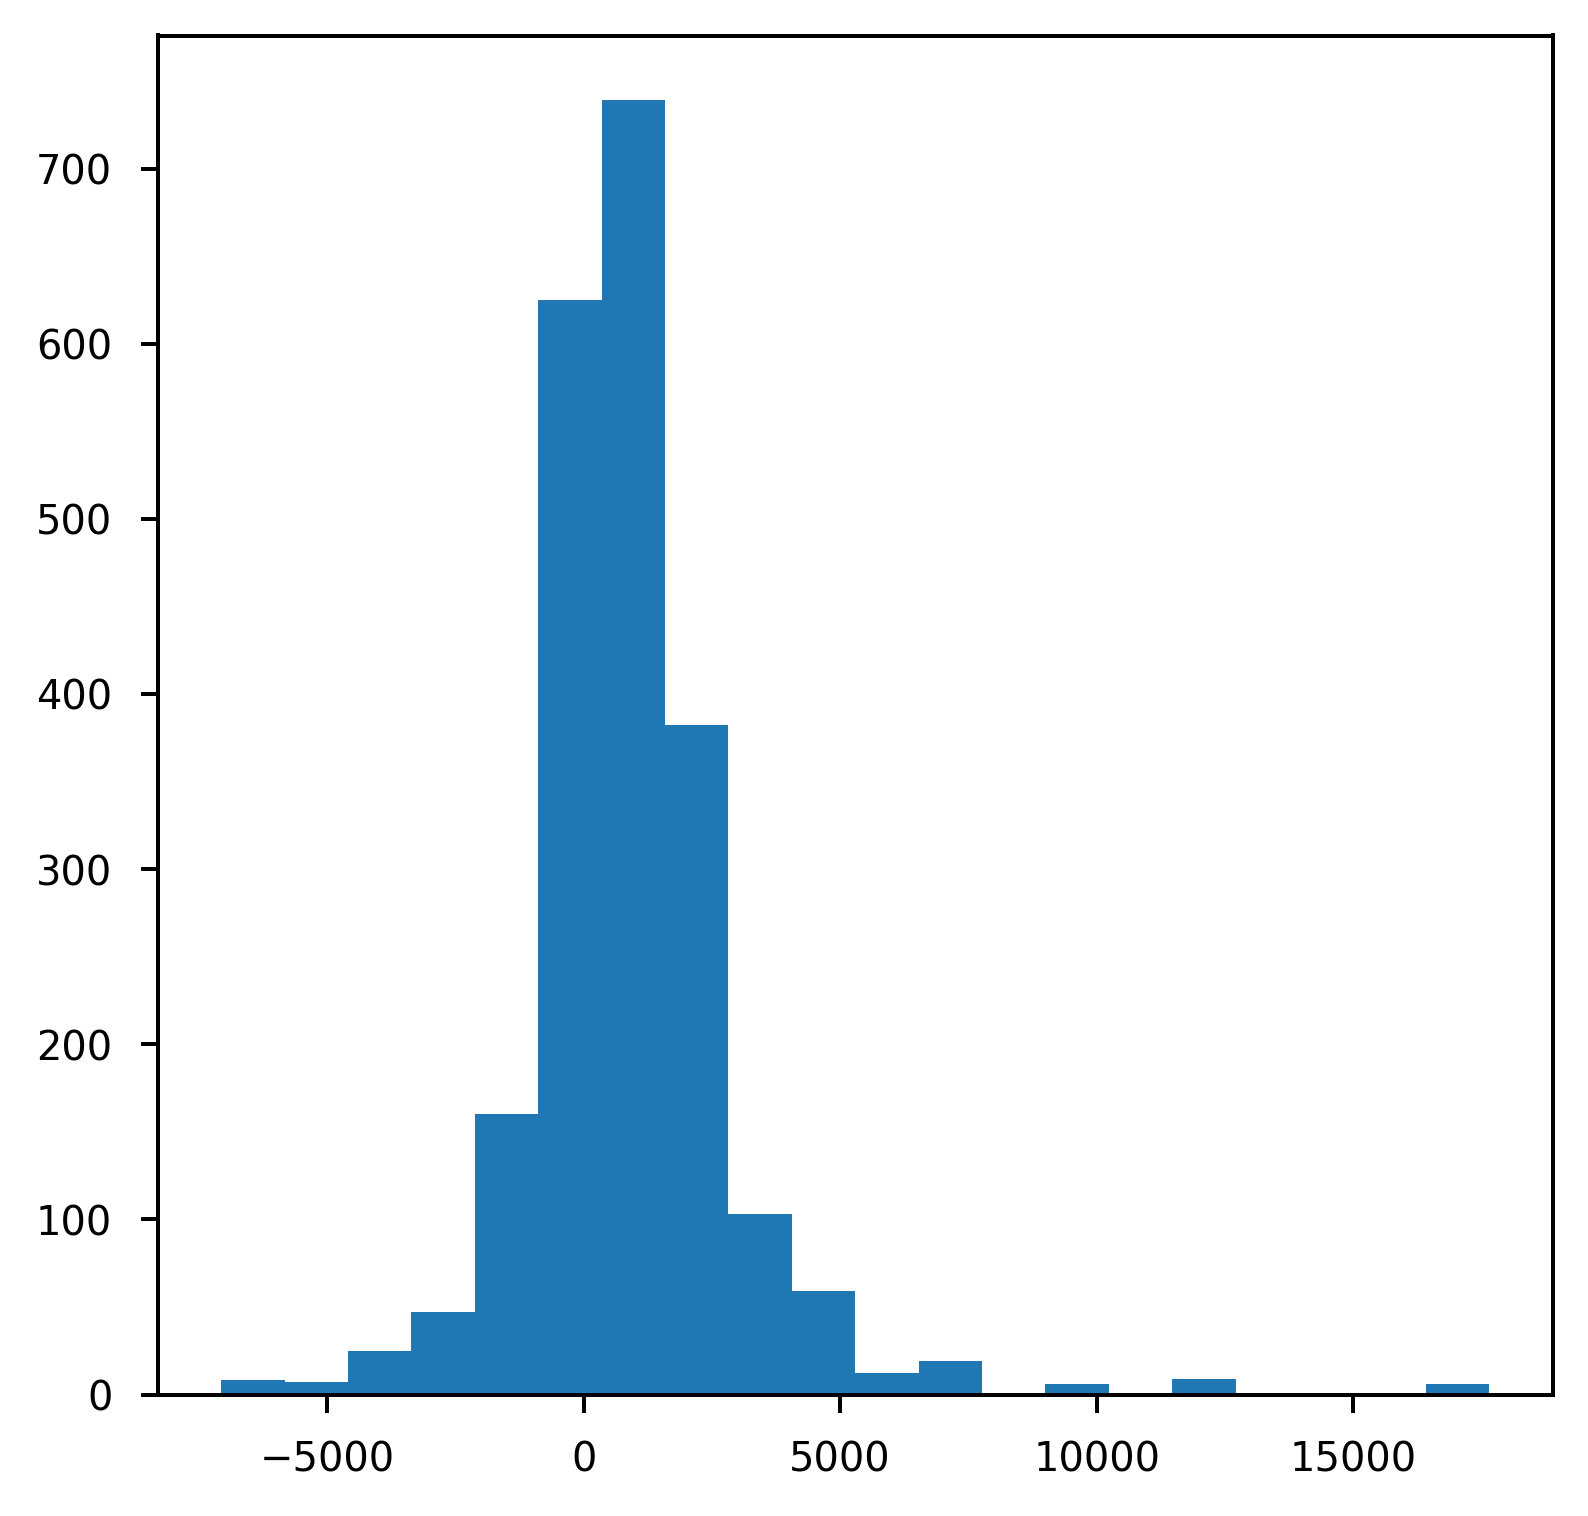

In [61]:
plt.rcParams['figure.figsize'] =  (5, 5)
data['Diff from baseline'].hist(bins=20)
plt.grid(False)
plt.show()

### Correlation plot

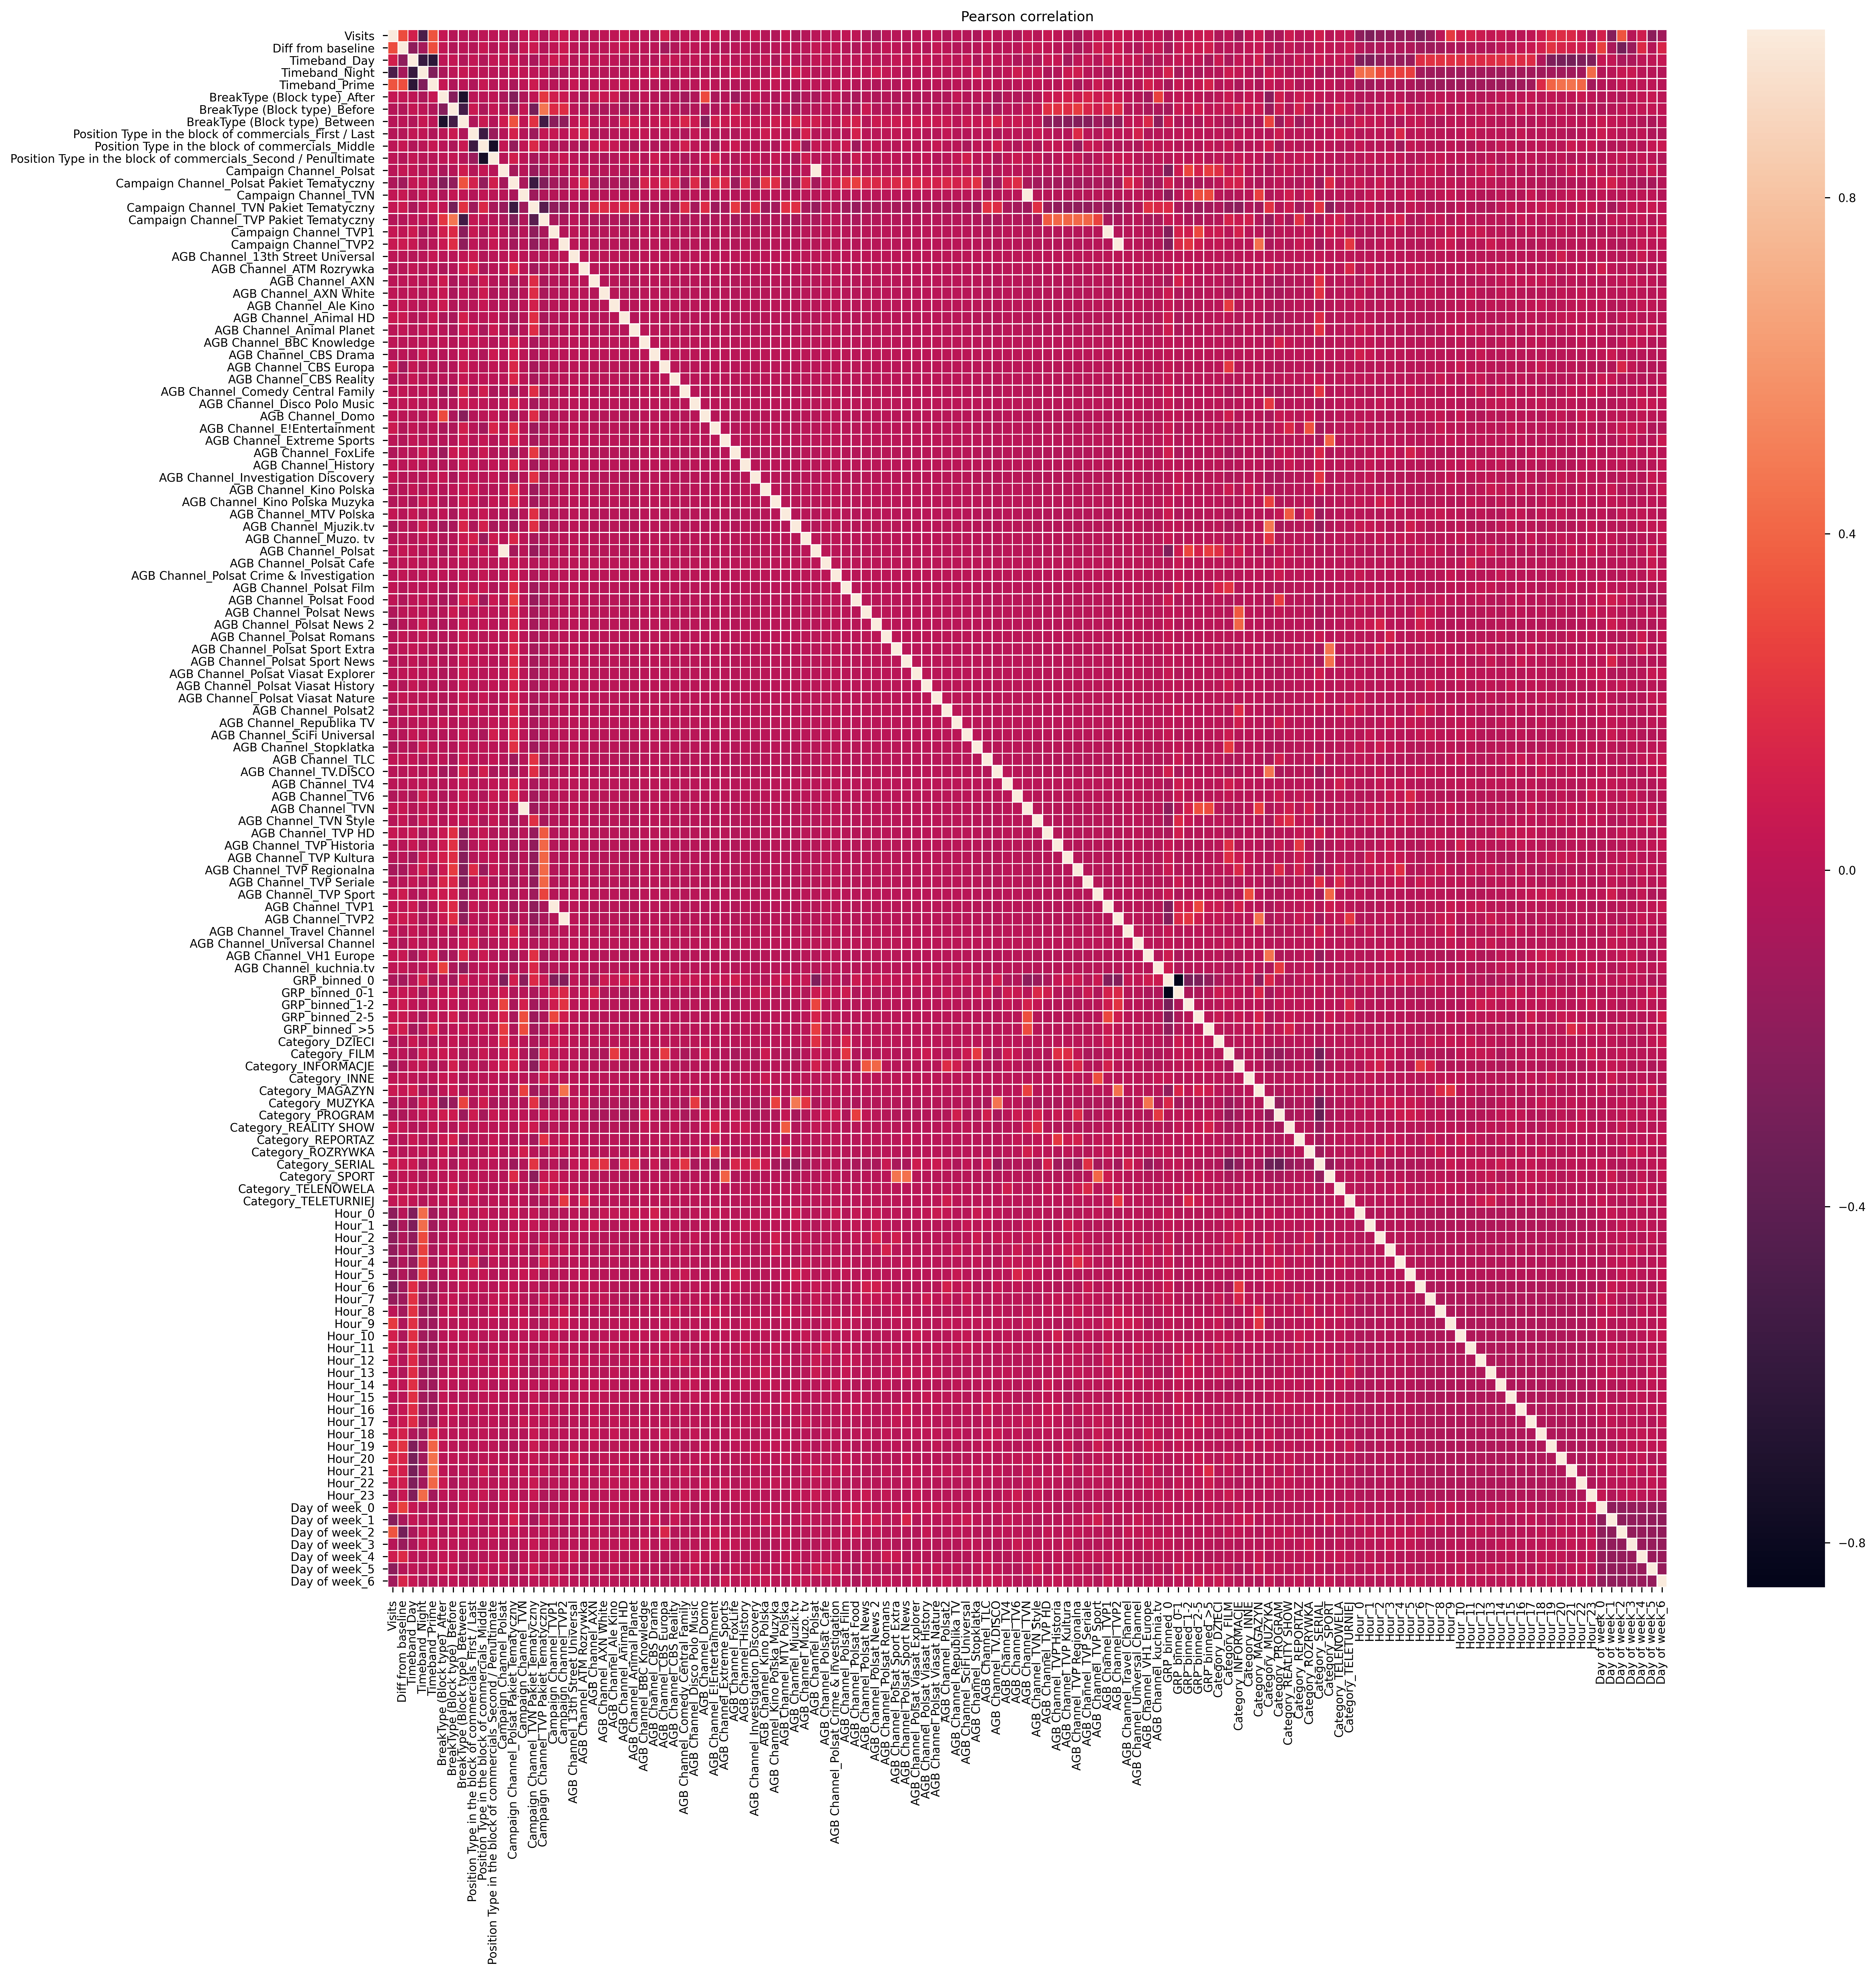

In [62]:
plt.rcParams['figure.figsize'] =  (20, 20)
corr = data.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=.5)
plt.title('Pearson correlation')

plt.show()

### Model

In [63]:
train = data[(data.Date>='2014-11-10') & (data.Date<='2014-11-17')].copy()
test = data[(data.Date>'2014-11-17')].copy()

In [64]:
if 'Date' in train.columns: train.drop('Date', axis=1, inplace=True)
if 'Date' in test.columns: test.drop('Date', axis=1, inplace=True)

In [66]:
X_train = train.drop(['Diff from baseline', 'Visits'], axis=1)
y_train = train['Diff from baseline']
X_test = test.drop(['Diff from baseline', 'Visits'], axis=1)
y_test = test['Diff from baseline']

In [67]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
lasso = Lasso()
lasso.fit(X_train, y_train)

Lasso()

### Model results

In [68]:
y_pred = lasso.predict(X_test)

#### Model metrics

In [69]:
import sklearn.metrics as metrics
def regression_results(y_true, y_pred):

    # Regression metrics
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    r2=metrics.r2_score(y_true, y_pred)

    print('R2 (explained variance): ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [70]:
regression_results(y_train, lasso.predict(X_train))

R2 (explained variance):  0.5381
MAE:  1064.1551
MSE:  2614403.2099
RMSE:  1616.9116


In [71]:
regression_results(y_test, y_pred)

R2 (explained variance):  -0.9621
MAE:  1527.2111
MSE:  3708261.6939
RMSE:  1925.6847


#### Coefficients

In [72]:
lasso_coefficient = pd.DataFrame() 
lasso_coefficient['Columns'] = X_train.columns
lasso_coefficient['Coefficient Estimate'] = pd.Series(lasso.coef_) 
lasso_coefficient = lasso_coefficient.sort_values(by='Coefficient Estimate', ascending=False)
print(lasso_coefficient)

                                       Columns  Coefficient Estimate
113                                    Hour_19           2482.686063
114                                    Hour_20           1591.583684
112                                    Hour_18           1530.571522
118                              Day of week_0           1288.538831
122                              Day of week_4           1079.415113
111                                    Hour_17           1039.503311
79                               GRP_binned_>5           1022.642652
92                         Category_TELENOWELA            986.757779
115                                    Hour_21            931.596825
93                        Category_TELETURNIEJ            827.710067
42    AGB Channel_Polsat Crime & Investigation            820.789813
110                                    Hour_16            790.907172
68                       AGB Channel_TVP Sport            769.587121
84                            Cate

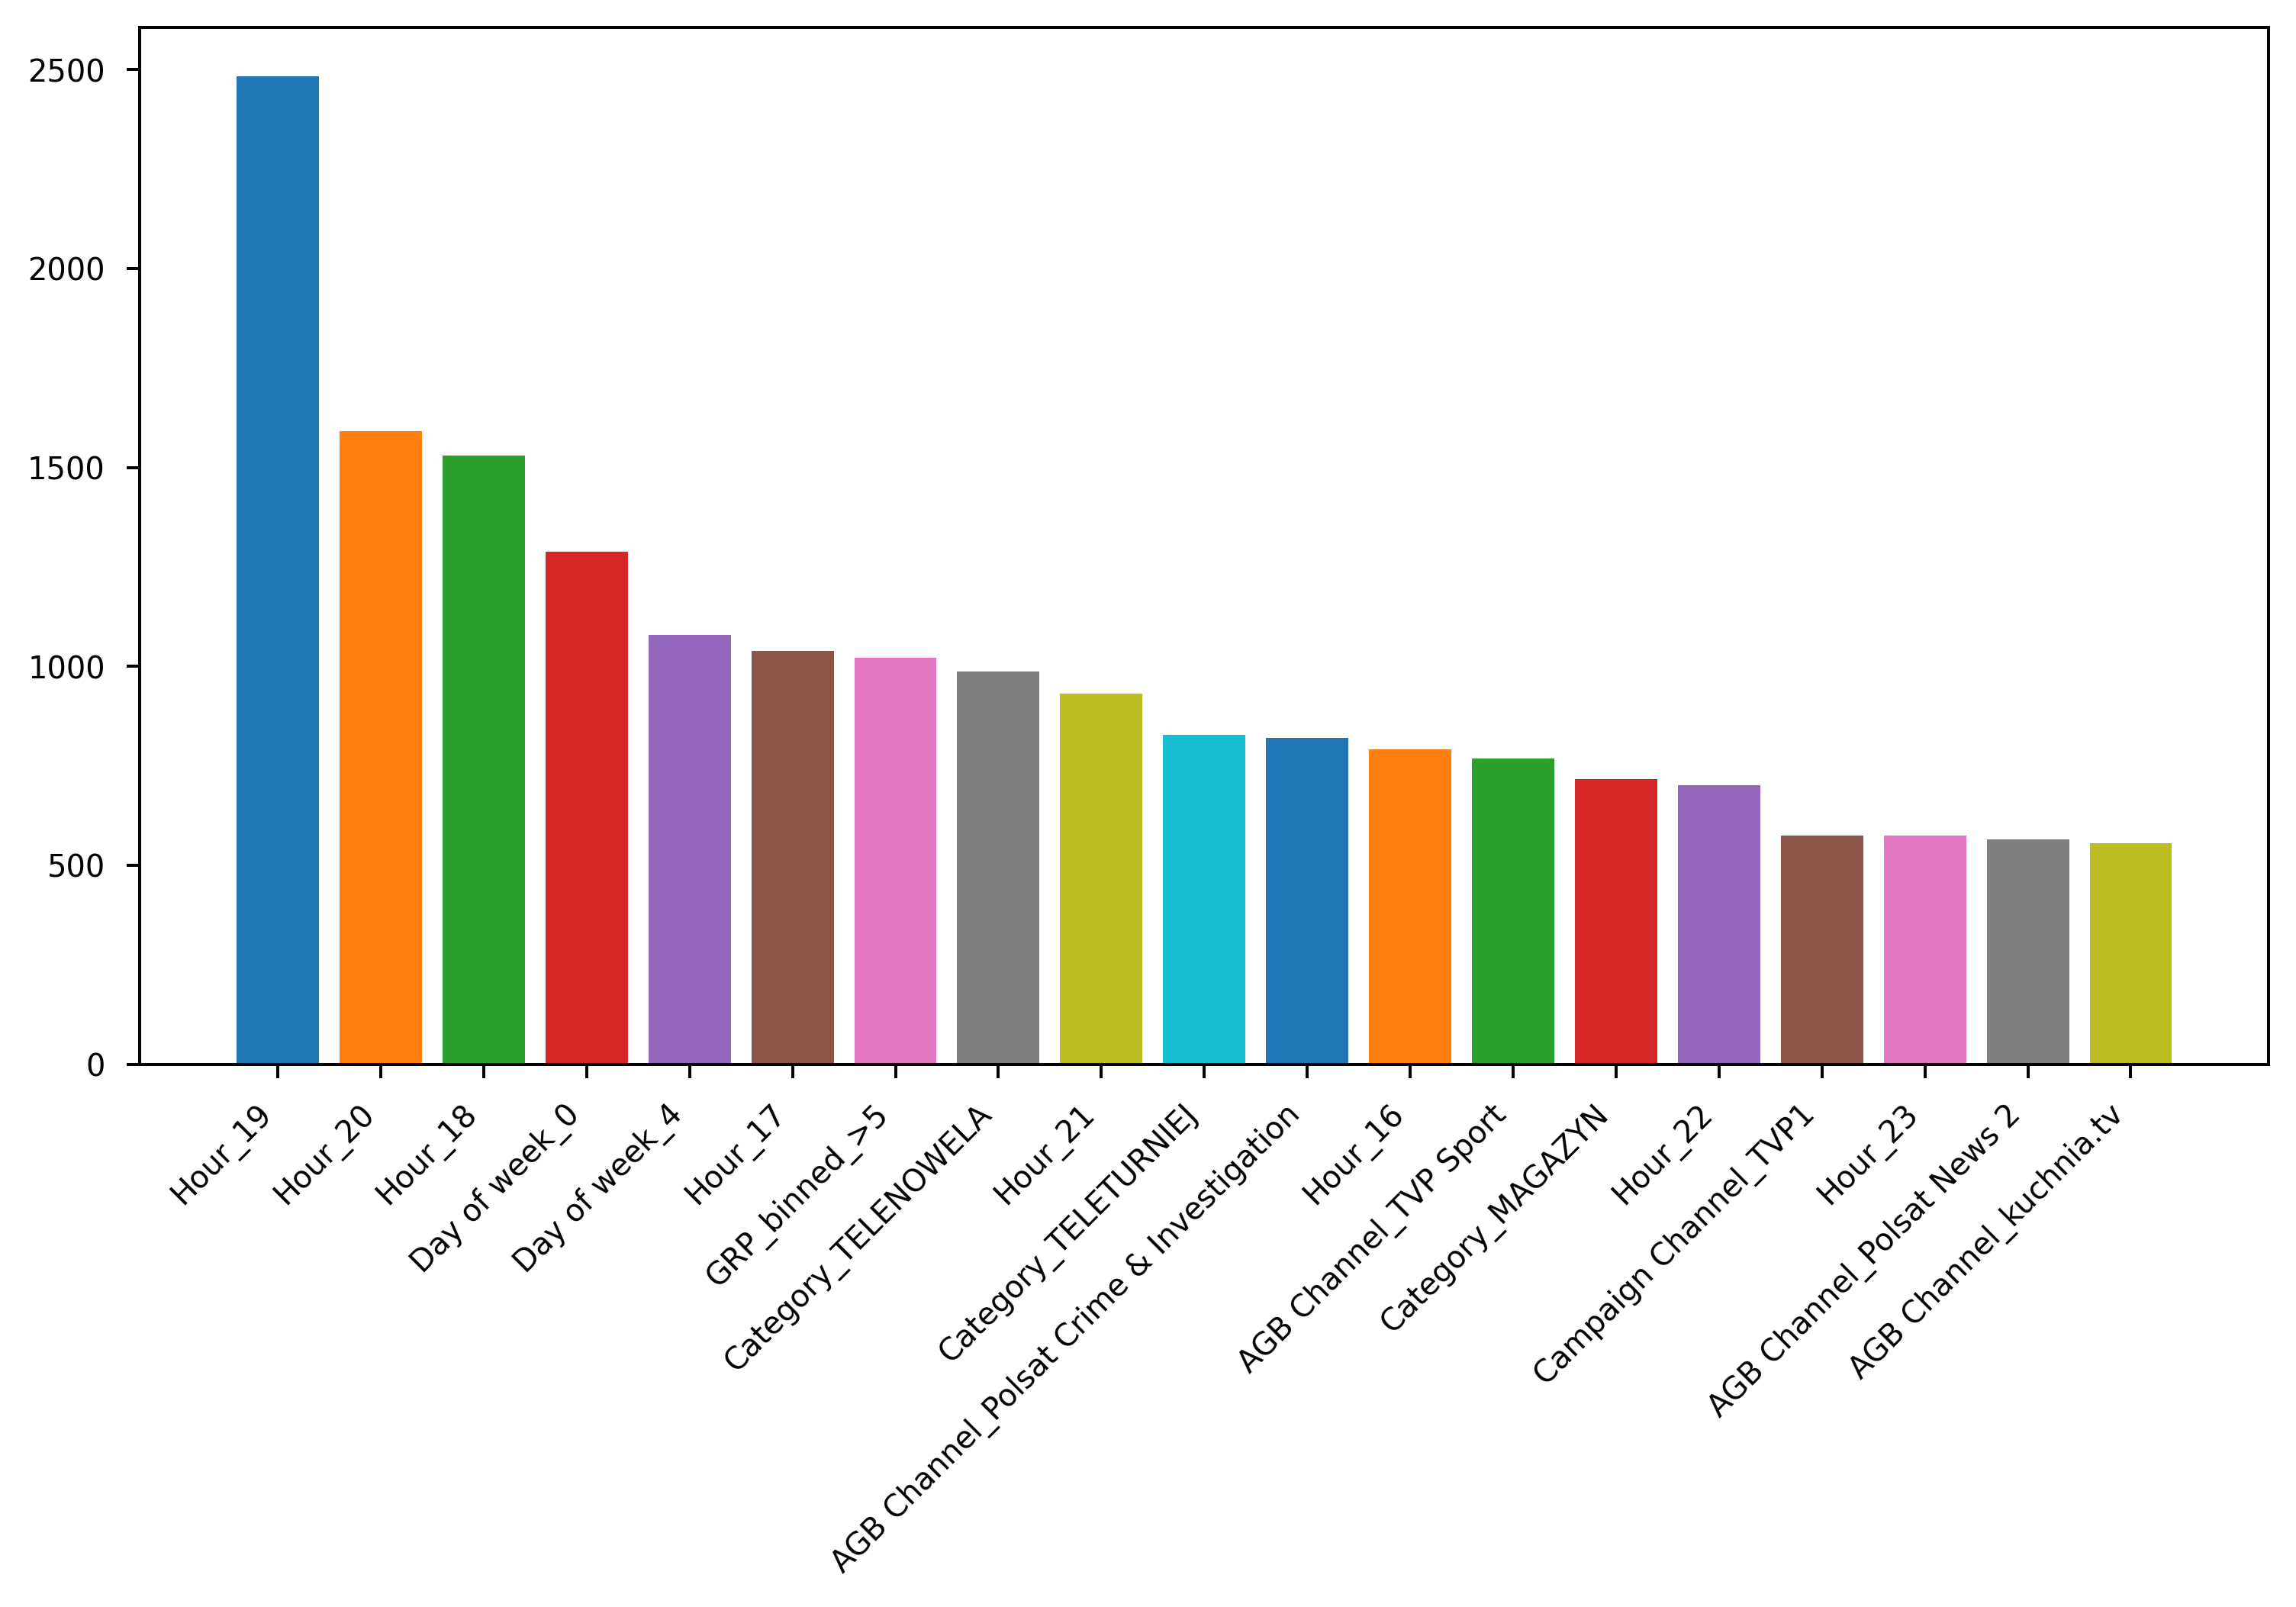

In [91]:
plt.rcParams['figure.figsize'] =  (10, 5)
plt.bar(lasso_coefficient['Columns'][lasso_coefficient['Coefficient Estimate'] > 500],
        lasso_coefficient['Coefficient Estimate'][lasso_coefficient['Coefficient Estimate'] > 500],  
        color = tab10_colors) 
plt.xticks(rotation=45, ha='right')

plt.show() 

In [74]:
import statsmodels.api as sm
ols = sm.OLS(y_train, X_train).fit()

In [75]:
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Diff from baseline   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.504
Method:                 Least Squares   F-statistic:                     15.03
Date:                Tue, 13 Oct 2020   Prob (F-statistic):          2.97e-166
Time:                        21:08:07   Log-Likelihood:                -13119.
No. Observations:                1490   AIC:                         2.646e+04
Df Residuals:                    1381   BIC:                         2.703e+04
Df Model:                         108                                         
Covariance Type:            nonrobust                                         
==================================================================================================================================
                                                                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------
Timeband_Day                                                     205.6715    169.103      1.216      0.224    -126.054     537.397
Timeband_Night                                                   116.4090    102.902      1.131      0.258     -85.452     318.270
Timeband_Prime                                                   411.1101    250.755      1.639      0.101     -80.791     903.011
BreakType (Block type)_After                                     287.9186     99.527      2.893      0.004      92.678     483.159
BreakType (Block type)_Before                                      5.1743    119.608      0.043      0.965    -229.459     239.808
BreakType (Block type)_Between                                   440.0976    108.796      4.045      0.000     226.674     653.521
Position Type in the block of commercials_First / Last           167.9603    118.645      1.416      0.157     -64.783     400.704
Position Type in the block of commercials_Middle                 222.5465     81.407      2.734      0.006      62.852     382.241
Position Type in the block of commercials_Second / Penultimate   342.6837    103.868      3.299      0.001     138.927     546.440
Campaign Channel_Polsat                                           72.3403    179.197      0.404      0.687    -279.187     423.868
Campaign Channel_Polsat Pakiet Tematyczny                       -228.8294    168.883     -1.355      0.176    -560.124     102.465
Campaign Channel_TVN                                             208.3811    217.109      0.960      0.337    -217.519     634.281
Campaign Channel_TVN Pakiet Tematyczny                          -191.3261    148.604     -1.287      0.198    -482.841     100.189
Campaign Channel_TVP Pakiet Tematyczny                           210.6649    163.159      1.291      0.197    -109.401     530.731
Campaign Channel_TVP1                                            406.5040    125.597      3.237      0.001     160.123     652.885
Campaign Channel_TVP2                                            255.4558    146.849      1.740      0.082     -32.616     543.527
AGB Channel_13th Street Universal                              -1.035e-13   8.23e-13     -0.126      0.900   -1.72e-12    1.51e-12
AGB Channel_ATM Rozrywka                                        -620.2395    413.855     -1.499      0.134   -1432.092     191.613
AGB Channel_AXN                                                  216.3965    303.562      0.713      0.476    -379.096     811.889
AGB Channel_AXN White                                            -41.3449    283.456     -0.146      0.884    -597.396     514.706
AGB Channel_Ale Kino                                            -511.8

/Users/nataliakusek/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


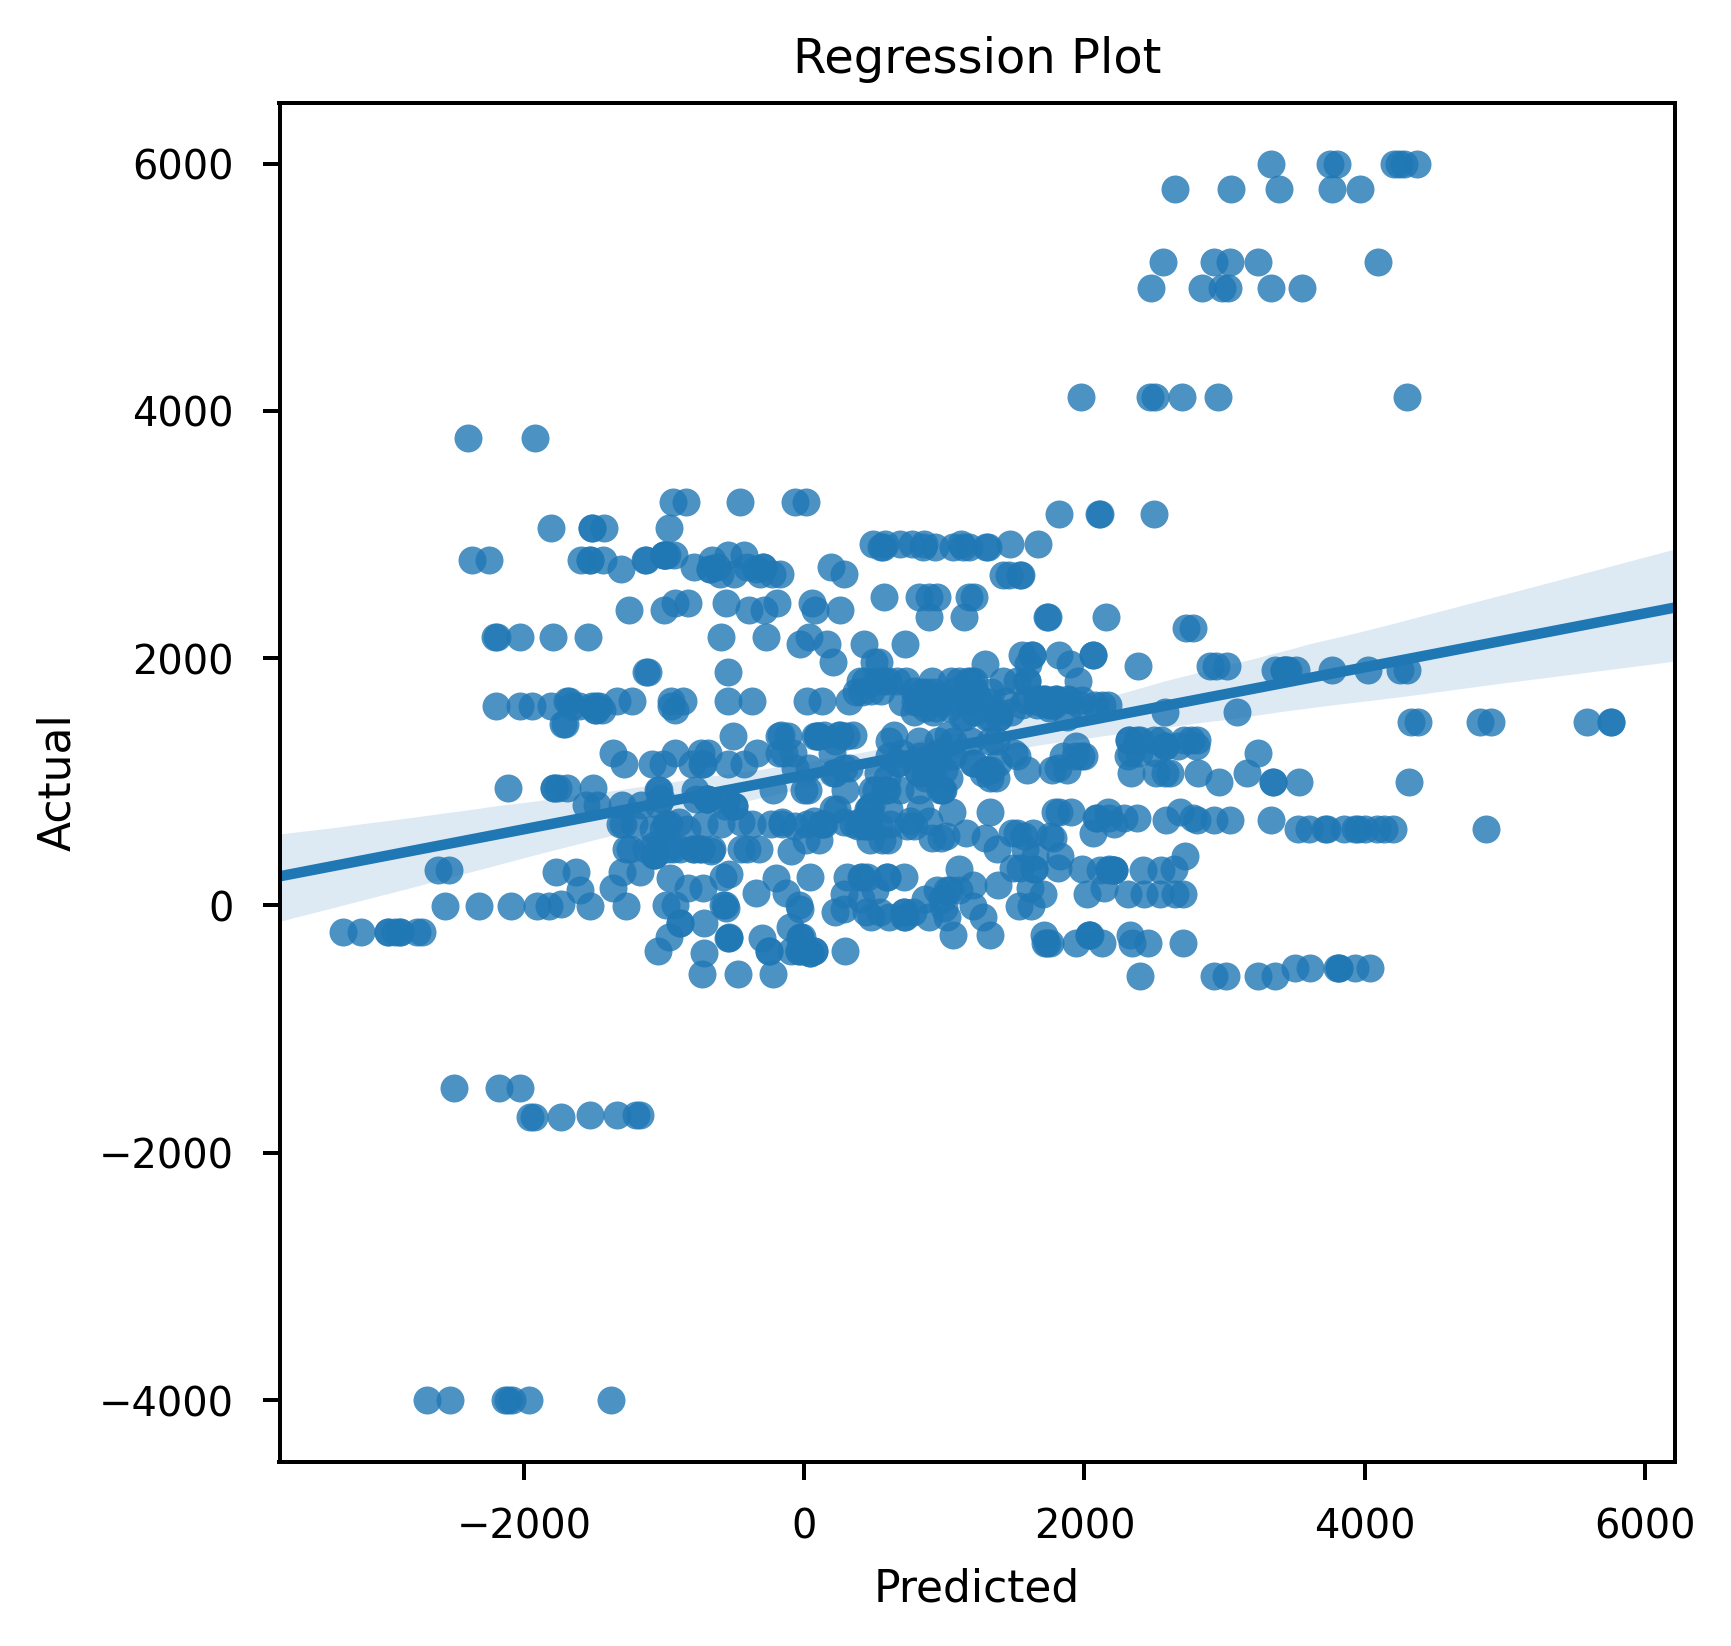

In [92]:
plt.rcParams['figure.figsize'] =  (5, 5)
g = sns.regplot(x=lasso.predict(X_test), y=y_test.values.ravel(), fit_reg=True) 
g.set(xlabel='Predicted', ylabel='Actual') 
plt.title('Regression Plot') 
plt.show()

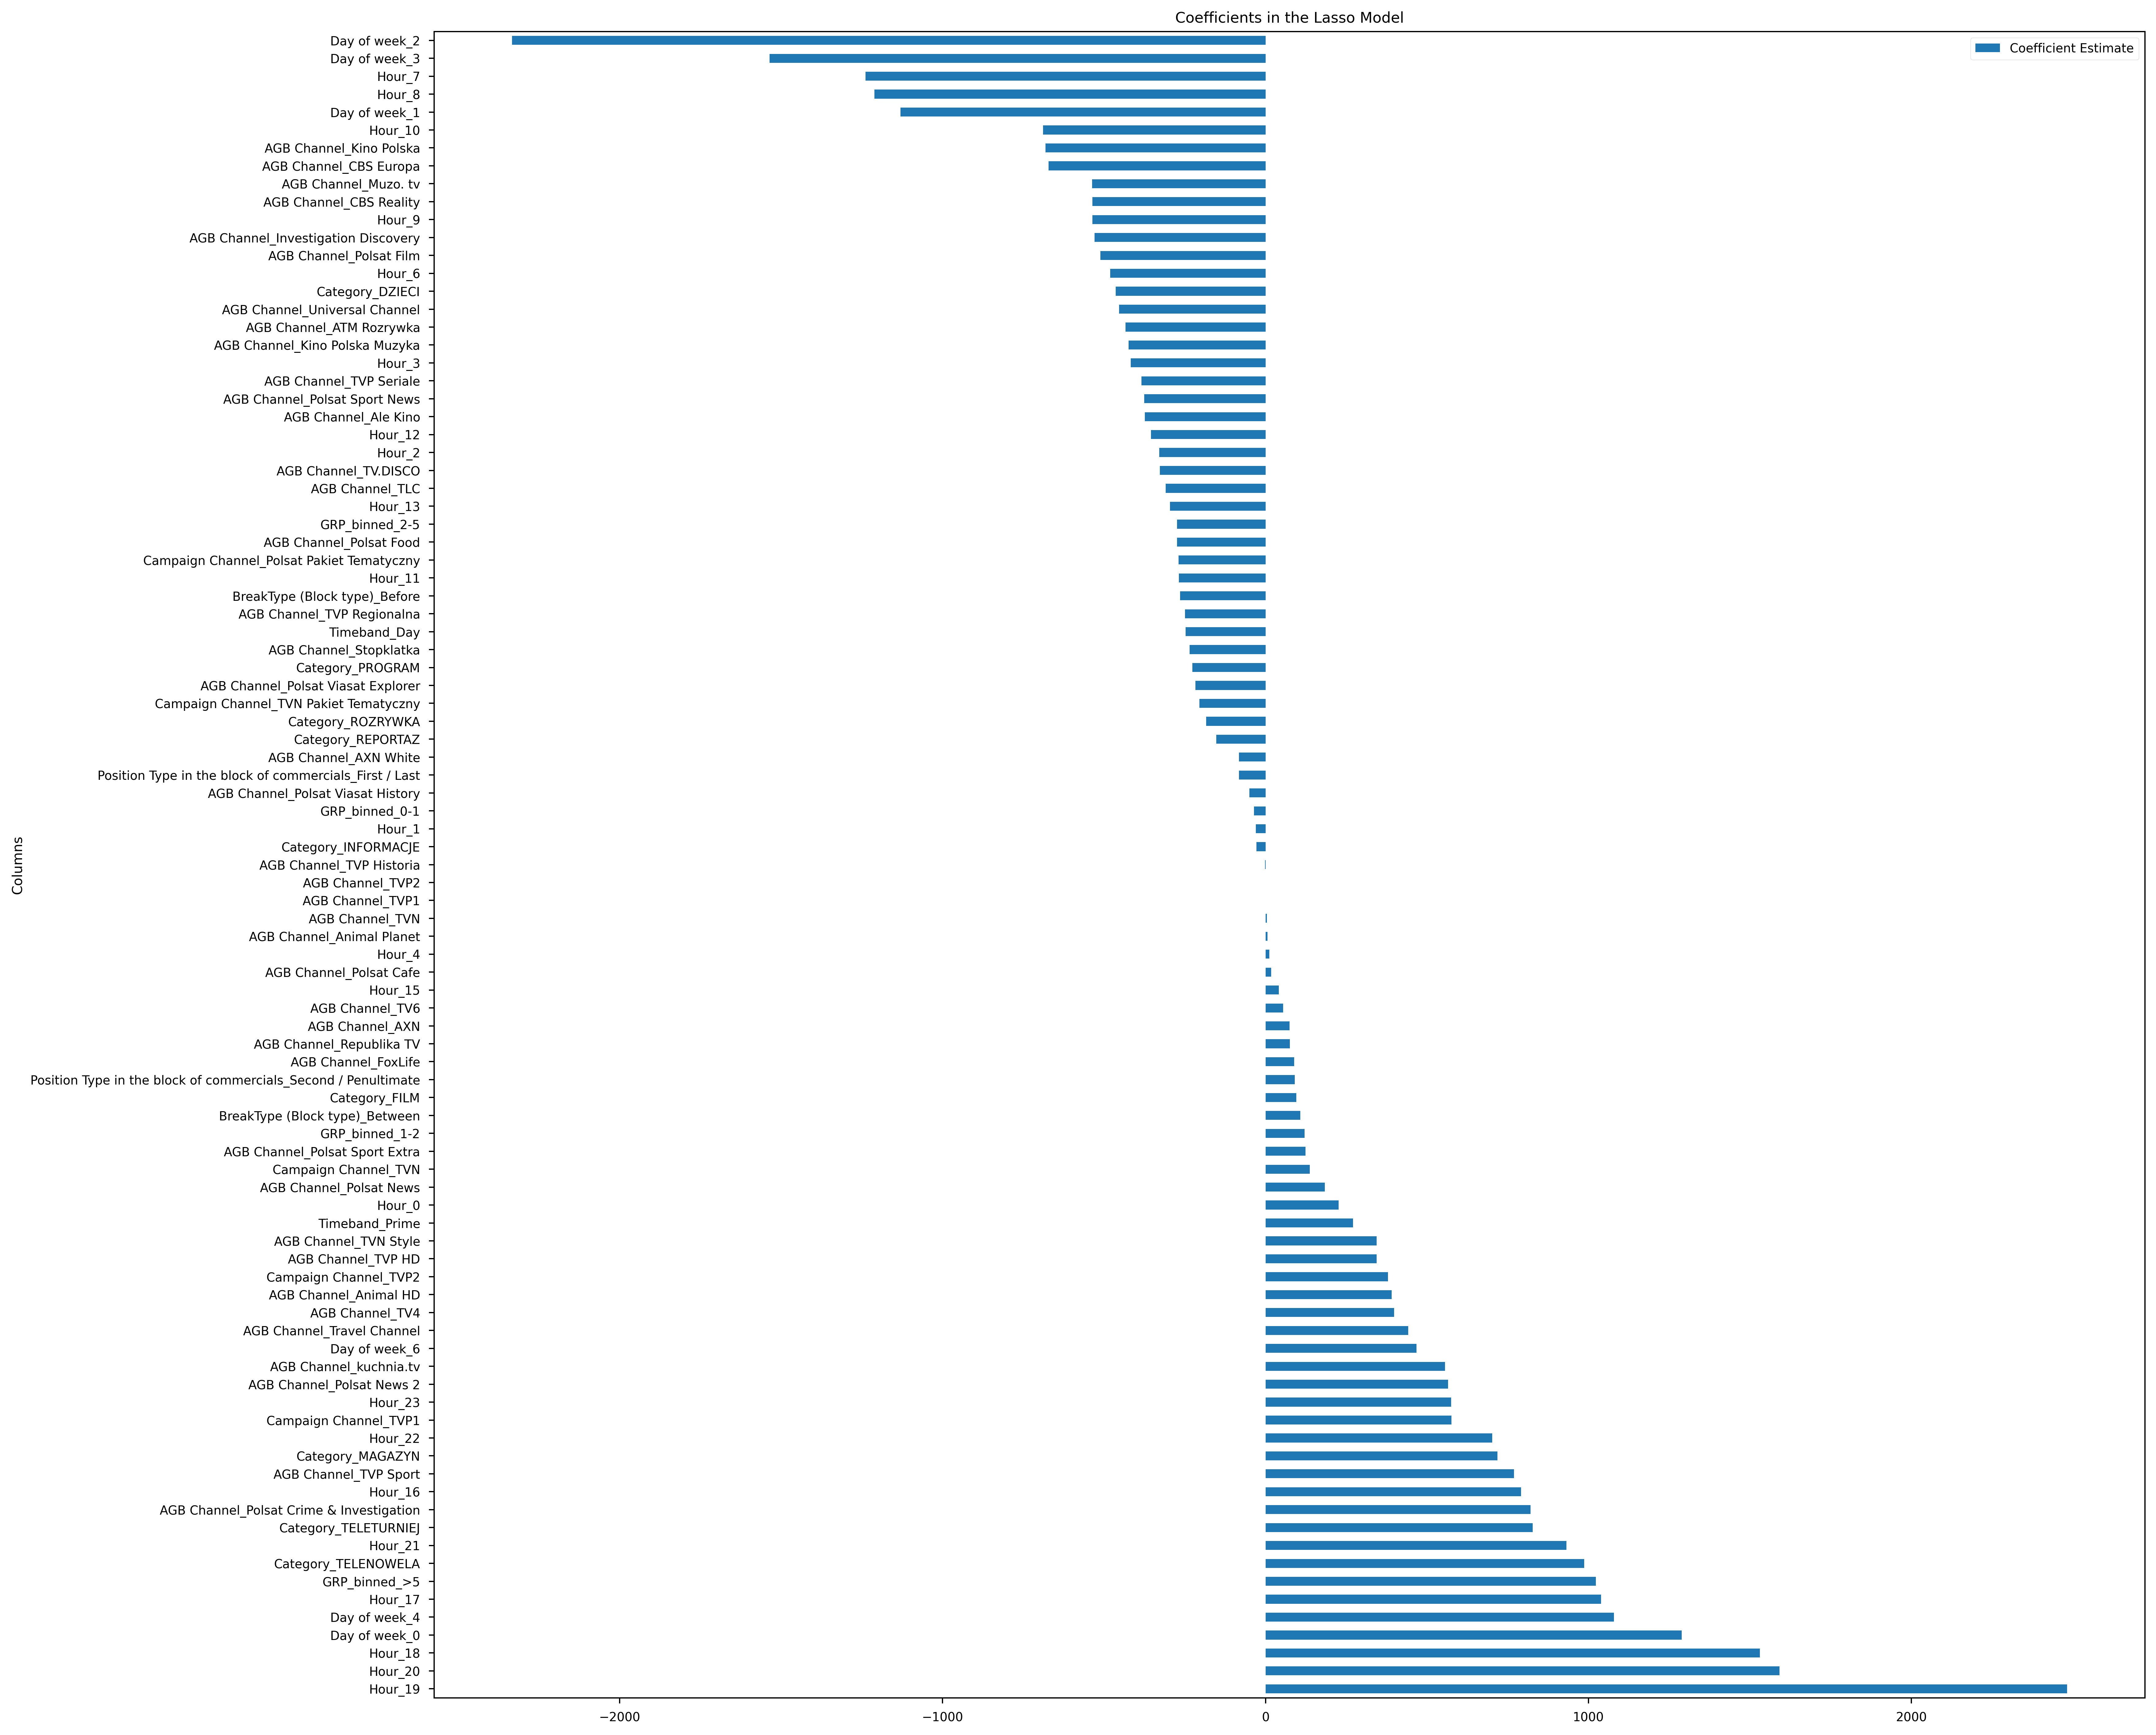

In [77]:
plt.rcParams['figure.figsize'] = (20, 20) 
lasso_coefficient[lasso_coefficient['Coefficient Estimate'] != 0].plot(kind = 'barh', x='Columns') 
plt.title('Coefficients in the Lasso Model') 

plt.show()

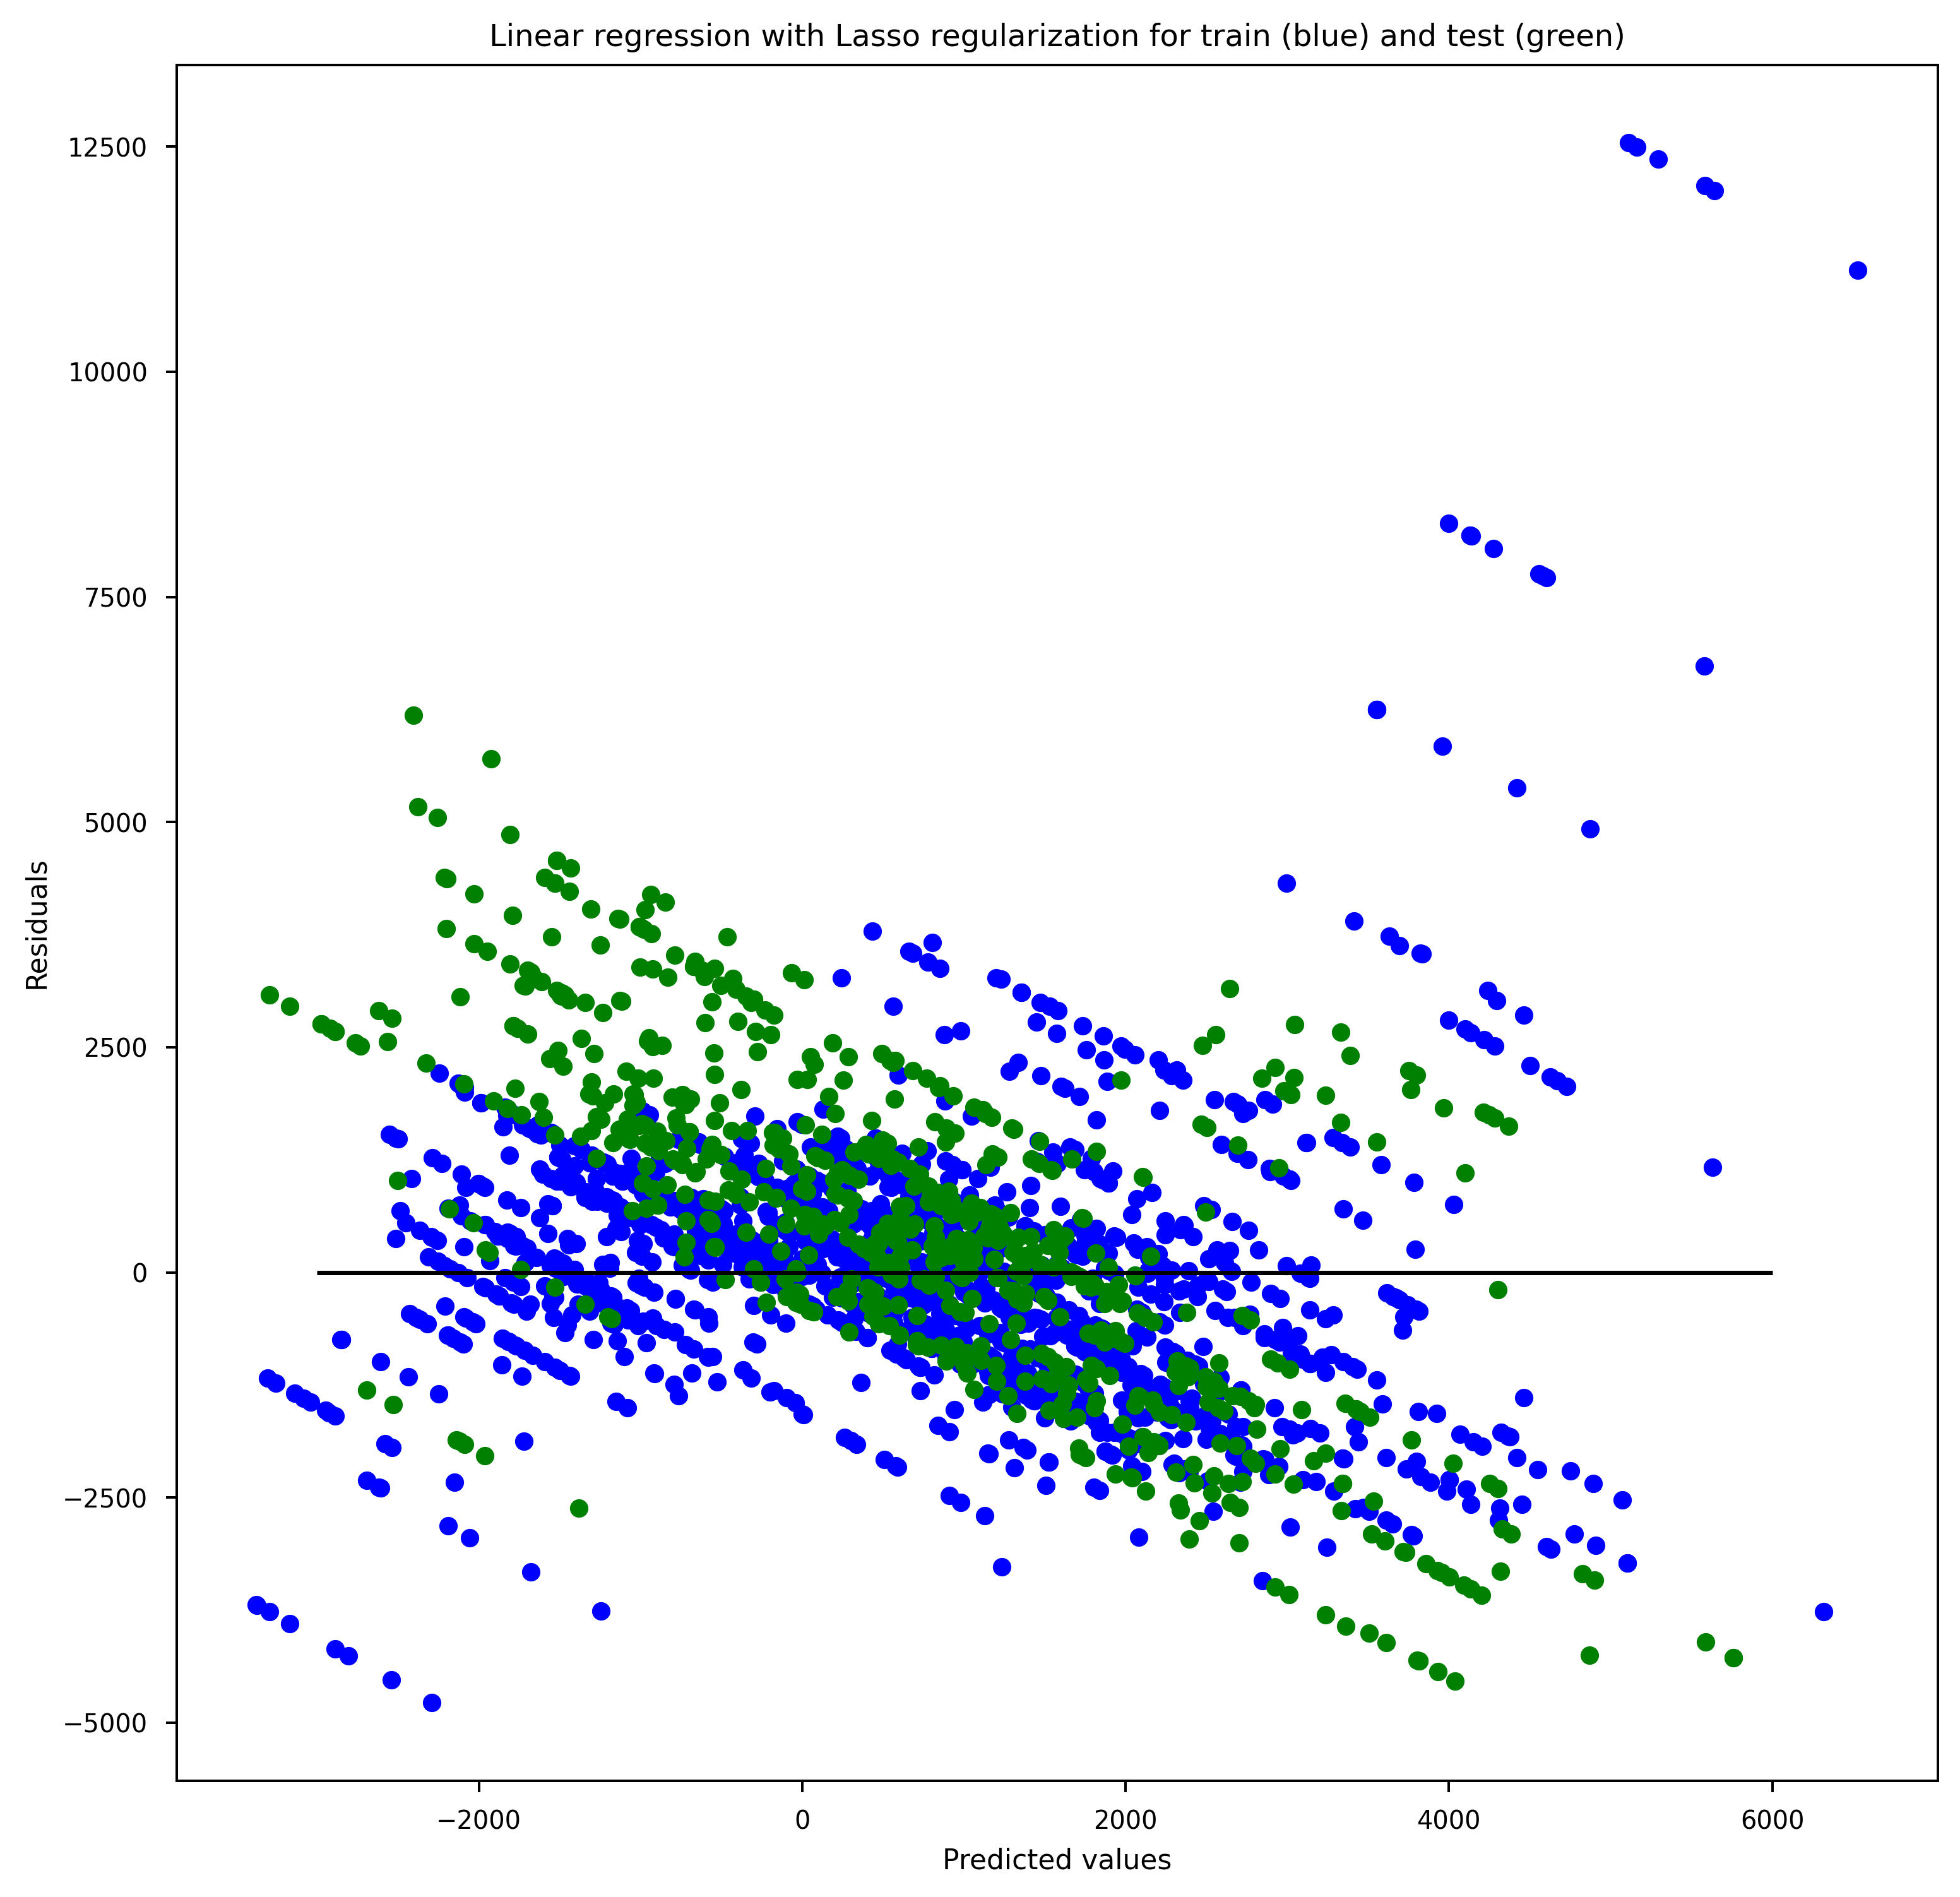

In [89]:
plt.rcParams['figure.figsize'] =  (10, 10)
plt.scatter(lasso.predict(X_train), y_train - lasso.predict(X_train), color='blue')
plt.scatter(lasso.predict(X_test), y_test - lasso.predict(X_test), color='green')
plt.hlines(y = 0, xmin=-3000, xmax = 6000) 
            
plt.title('Linear regression with Lasso regularization for train (blue) and test (green)')
plt.xlabel('Predicted values') 
plt.ylabel('Residuals') 
          
plt.show()

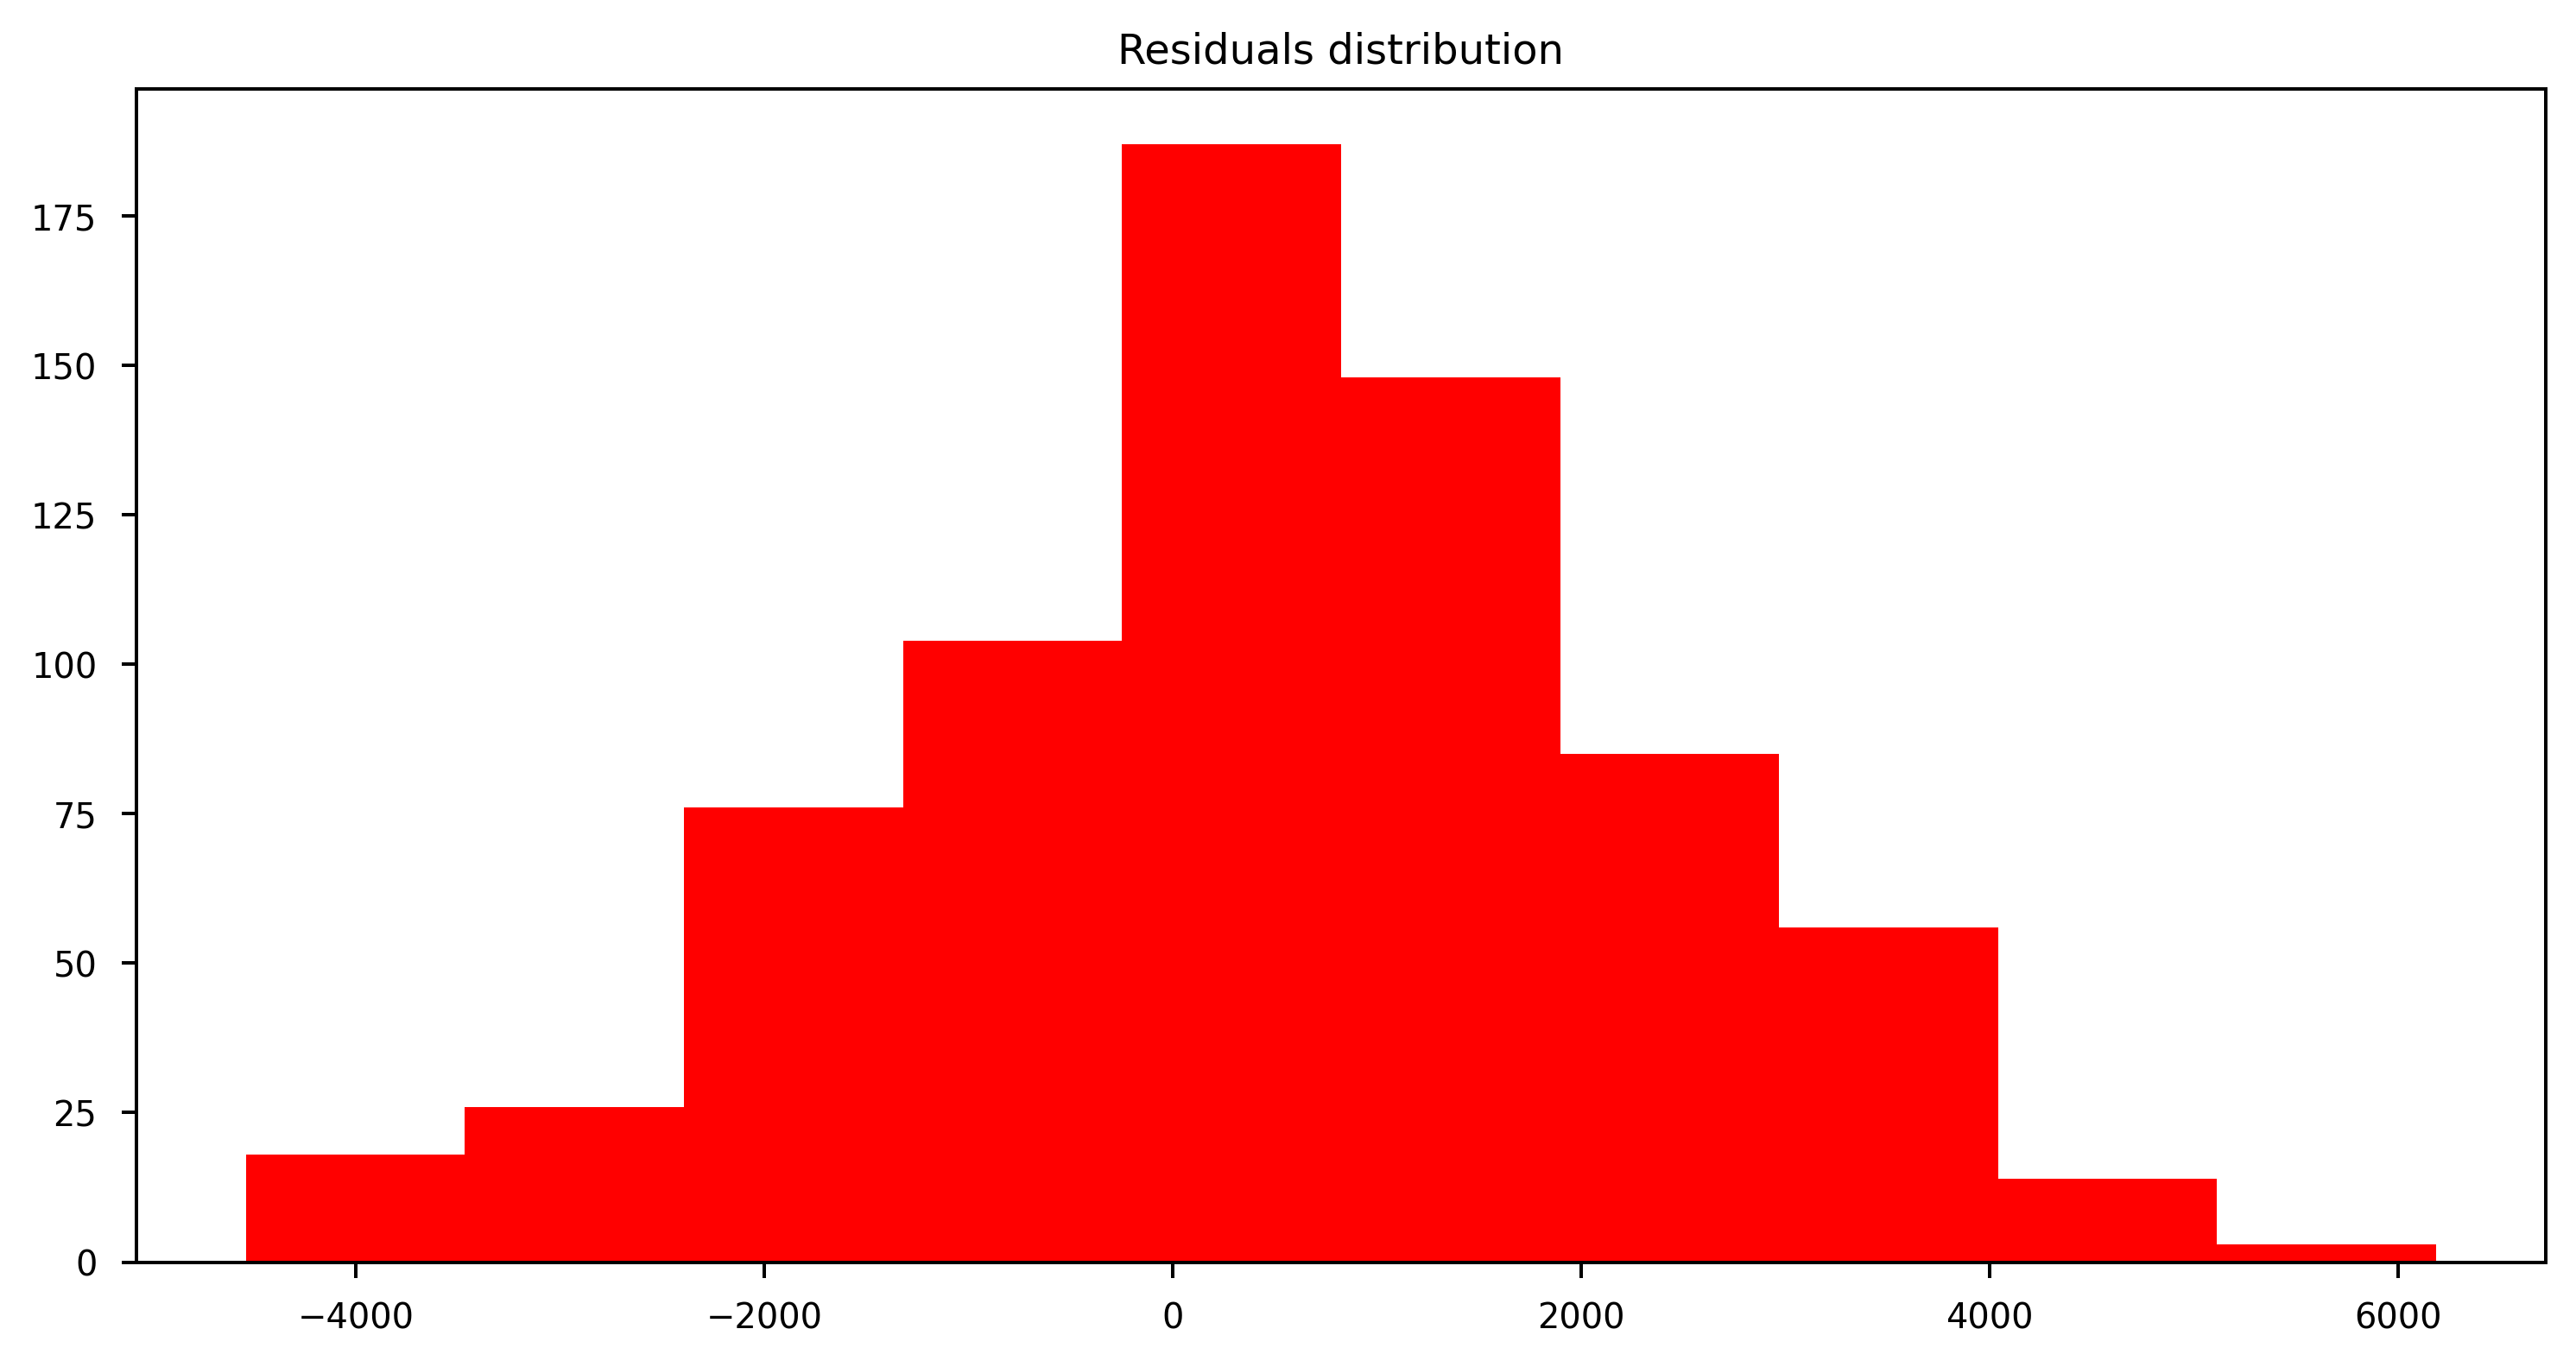

In [86]:
plt.rcParams['figure.figsize'] =  (10, 5)
plt.hist(y_test - lasso.predict(X_test), color='red')
plt.grid(False)
plt.title('Residuals distribution')
plt.show()

In [80]:
print('True:', "{:,.0f}".format(y_test.values[1]), "--> Pred:", "{:,.0f}".format(y_pred[1]))

True: 932 --> Pred: -225


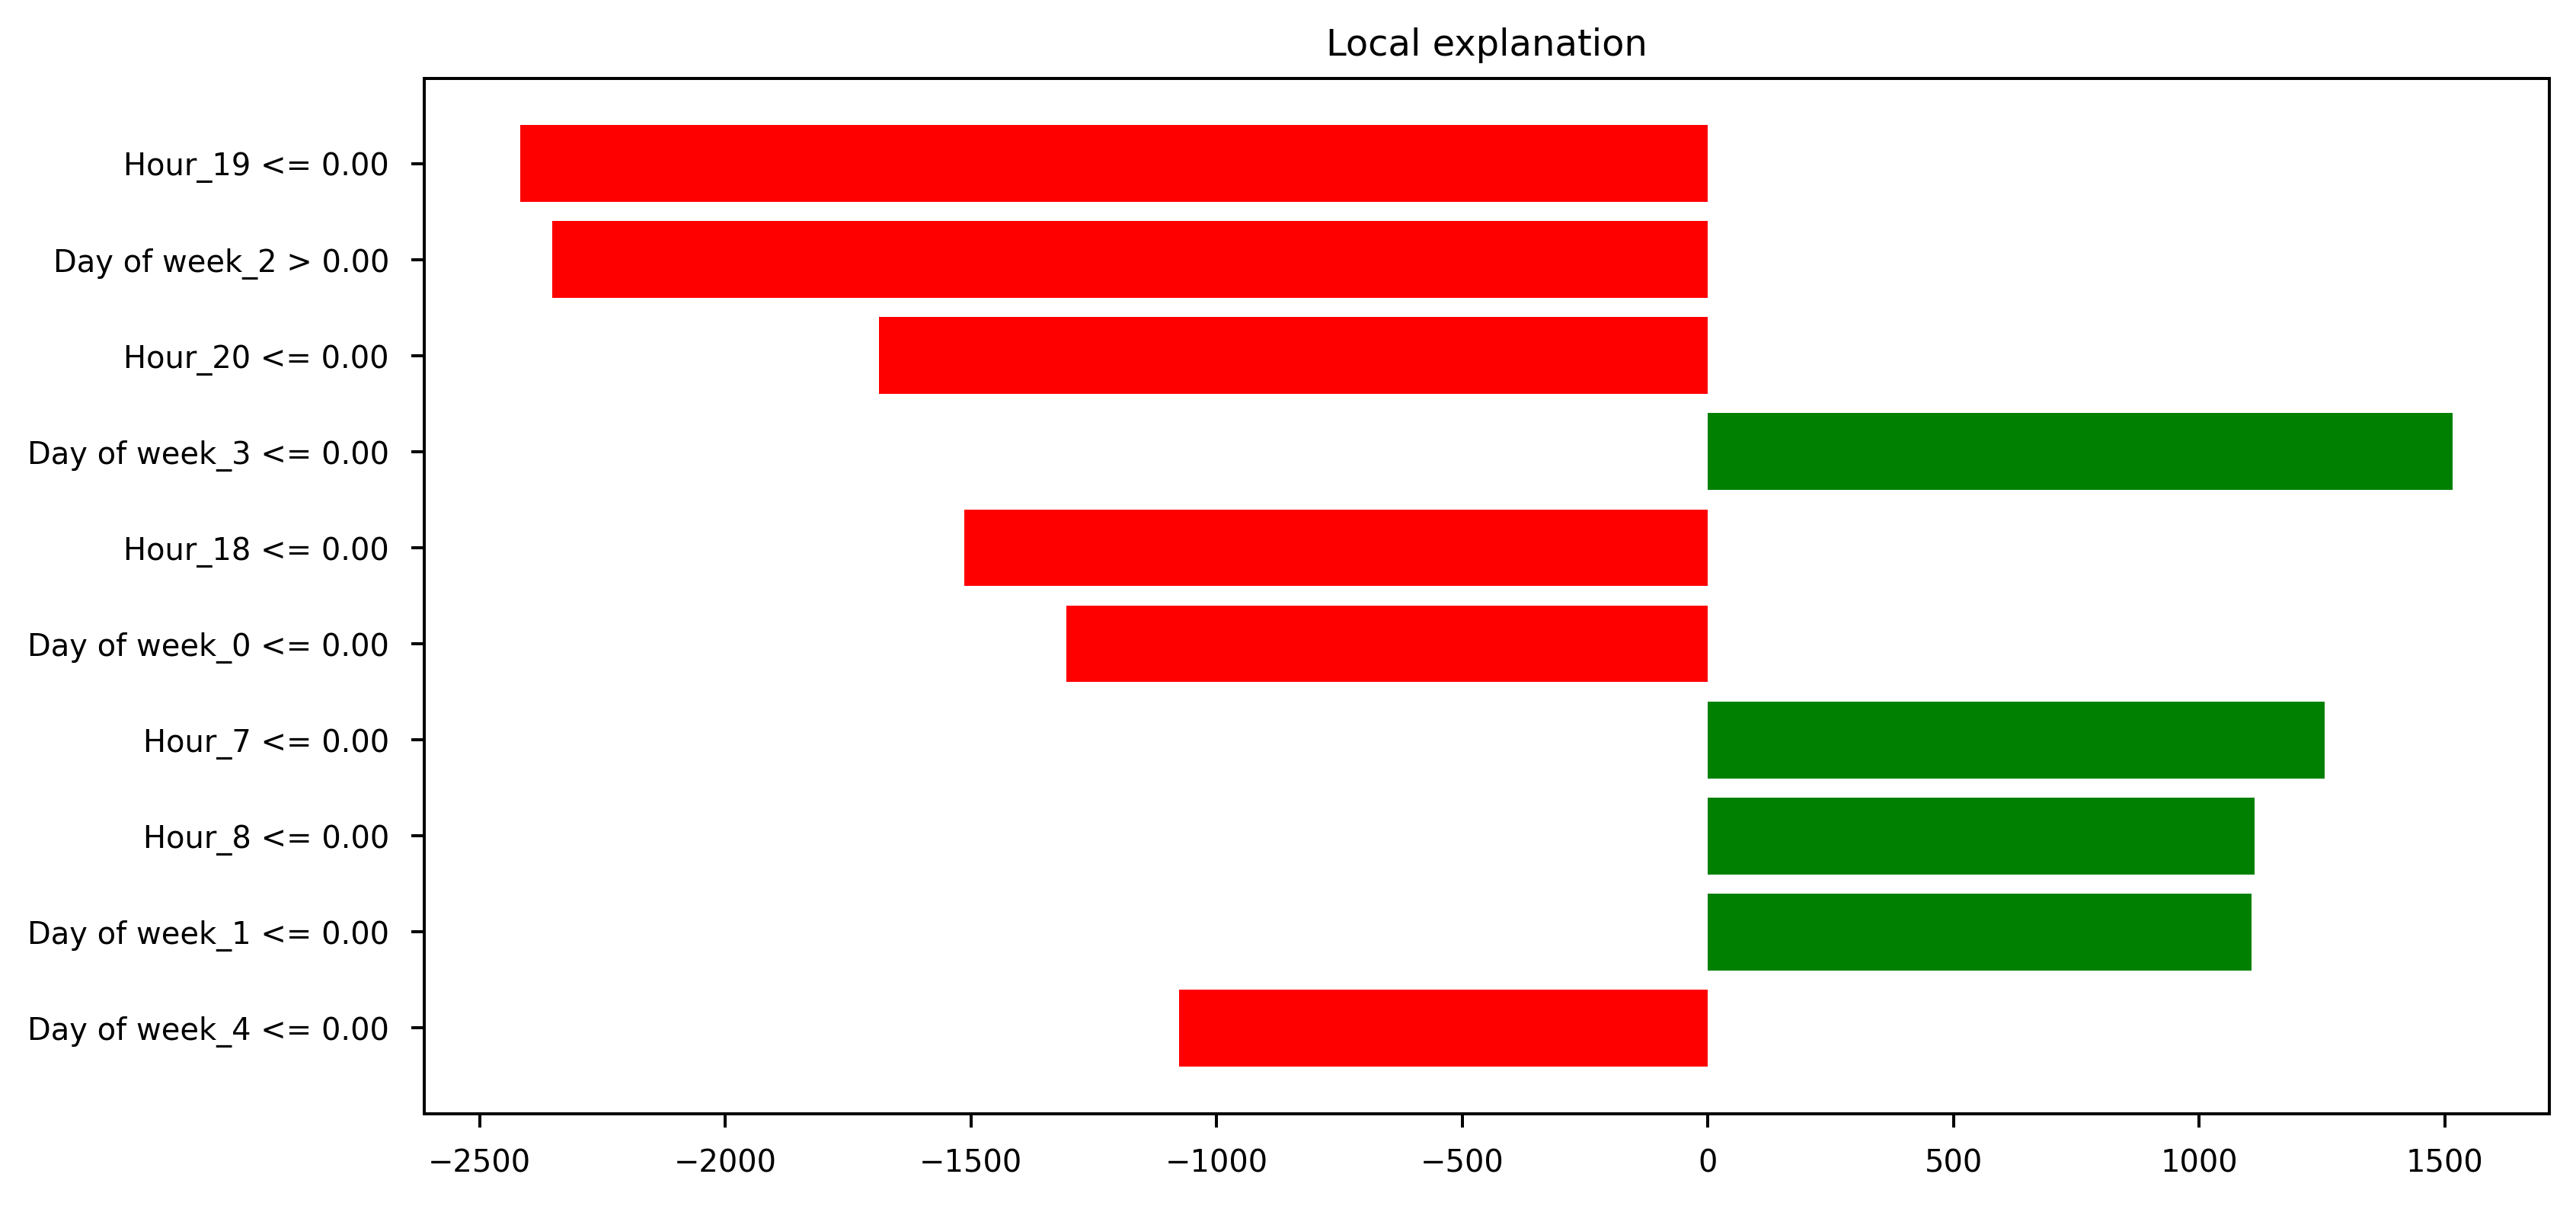

In [84]:
plt.rcParams['figure.figsize'] =  (10, 5)
from lime import lime_tabular
explainer = lime_tabular.LimeTabularExplainer(training_data=X_train.values, feature_names=X_train.columns, class_names='Y', mode='regression')
explained = explainer.explain_instance(X_test.values[1], lasso.predict, num_features=10)
explained.as_pyplot_figure()

plt.show()